In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from bs4 import BeautifulSoup
import urllib.request as ur
import csv
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/KHDL/Data

/content/drive/MyDrive/KHDL/Data


# **1. Crawling**

### **Crawl**

In [ ]:
def Location(i):
  switcher={
          'quan hai chau':1,
          'quan thanh khe':2,
          'quan cam le':3,
          'quan lien chieu':4,
          'quan ngu hanh son':5,
          'quan son tra':6,
          'huyen hoa vang':7
        }
  return switcher.get(i,"Invalid")

In [ ]:
# fields = ['SalePrice', 'Area', 'Price/m2', 'Width', 'Length','Type','Characteristic', 'Location'] 
fields = ['SalePrice', 'Area', 'Price/m2', 'Width', 'Length', 'Location'] 
filename = "/content/drive/MyDrive/KHDL/Data/data_crawl_num.csv"
url='https://nha.chotot.com'

with open(filename, 'w', newline='', encoding='utf-8') as csvfile: 
    csvwriter = csv.writer(csvfile)        
    csvwriter.writerow(fields) 

count=0;
startpage=2
endpage=80
for i in range(2,80):
  nextpage_url=url+'/da-nang/mua-ban-dat?page='+str(i)
  page=ur.urlopen(nextpage_url)
  soup=BeautifulSoup(page,'html.parser')
  all=soup.find_all(class_='wrapperAdItem___2woJ1')

  count=count+len(all)
  saleprice=''
  area=''
  price_m2=''
  width=''
  length=''
  location=''
  # typeland=''
  # characteristic=''
  for n in all: 
    saleprice=n.find('span', {'class' : 'adPriceNormal___puYxd'})
    saleprice=saleprice.getText()
    if saleprice.find('tỷ')!=-1:
       saleprice=saleprice.replace(',','.')
       saleprice=format(float(saleprice.split()[0])*1000)
    else:
      saleprice=saleprice.replace(',','.')
      saleprice=format(float(saleprice.split()[0]))
        
    a=n.find('a')
    href=a.get('href')
    location=str(href.partition('da-nang/')[2].partition('/')[0]).replace('-',' ')
    location=Location(location)
    child_url=url+href
    try:
      child_page=ur.urlopen(child_url)
    except:
      continue
    child_soup=BeautifulSoup(child_page,'html.parser')

    detail=child_soup.find_all(class_='media-body media-middle')
    dic={}
    list_key=[]
    list_val=[]
    for d in range(0,len(detail)):
      val=detail[d].find('span', {'class' : 'adParamValue___25KeI'})
      for k in detail[d].find('span', recursive=False):
        if not k.attrs.values():
          list_key.append(k.getText())
      list_val.append(val.getText())
    if len(list_key)!=len(list_val):
      del list_val[0]
    for b in range(0,len(list_key)):
      if (list_key[b] in dic):
        continue
      else:
        key_text=list_key[b]
        val_text= format(list_val[b].replace(',','.'))
        if key_text=="Diện tích đất: ": 
          area=val_text
          area=area.split()[0]
        if key_text=='Giá/m2: ':
          price_m2=val_text
          if price_m2.find('triệu')!=-1 or price_m2.find('tr')!=-1:
            price_m2=format(float(price_m2.split()[0]))
          else:
            price_m2=format(float(price_m2.split()[0])/1000000)
          price_m2=price_m2.split()[0]
        if key_text=='Chiều ngang: ': 
          width=val_text
          width=width.split()[0]
        if key_text=='Chiều dài: ': 
          length=val_text
          length=length.split()[0]
        # if key_text=='Loại hình đất: ':
        #   if val_text=='Đất thổ cư':
        #     typeland=1
        #   if val_text=='Đất nền dự án':
        #     typeland=2
        #   if val_text=='Đất nông nghiệp':
        #     typeland=3
        #   if val_text=='Đất công nghiệp':
        #     typeland=4
        # if key_text=='Đặc điểm nhà/đất: ': 
        #   if val_text=='Mặt tiền':
        #     characteristic=1
        #   if val_text=='Nở hậu':
        #     characteristic=2
        #   if val_text=='Hẻm xe hơi':
        #     characteristic=3
    # try:
    #   float(area)
    # except:
    #   break
    with open(filename, 'a', newline='', encoding='utf-8') as csvfile: 
      csvwriter = csv.writer(csvfile) 
      row=[saleprice,area,price_m2,width,length,location]
      # row=[saleprice,area,price_m2,width,length,typeland,characteristic,location]
      print(row)
      csvwriter.writerow(row)
print(count)

['2.45', '100', '2.45e-05', '5', '20', 3]
['3300.0', '150', '22.0', '7.7', '20', 3]
['6000.0', '4500', '1.33', '7.7', '20', 7]
['3500.0', '144', '24.31', '6', '24', 5]
['3500.0', '100', '35.0', '5', '20', 3]
['2200.0', '100', '22.0', '5', '20', 5]
['1320.0', '100', '13.2', '4', '25', 3]
['40000.0', '80000', '0.0005', '4', '25', 7]
['1250.0', '70', '17.86', '4', '17', 4]
['9500.0', '85', '111.76', '5', '17', 5]
['2700.0', '75', '36.0', '5', '15', 4]
['3588.0', '138', '26.0', '4', '15', 6]
['2500.0', '80', '31.25', '4', '15', 4]
['1.95', '56', '3.4821e-05', '4', '14', 6]
['3700.0', '105', '35.24', '45', '14', 6]
['3945.0', '145', '27.21', '8', '17', 5]
['1250.0', '125', '10.0', '5', '25', 3]
['6100.0', '125', '48.8', '5', '25', 4]
['2250.0', '58', '38.79', '4', '25', 2]
['3000.0', '70', '42.86', '4', '25', 4]
['4200.0', '100', '42.0', '5', '20', 3]
['7200.0', '100', '72.0', '5', '20', 3]
['4250.0', '100', '42.5', '5', '20', 3]
['12000.0', '160', '75.0', '10', '20', 5]
['1800.0', '120', '

### **Plot**

In [ ]:
images_dir = '/content/drive/MyDrive/KHDL/Images/Crawling'

In [ ]:
df=pd.read_csv('./data_crawl.csv')
gr_location=df.Location.unique()
df.describe()

SalePrice           Area     Price/m2        Width       Length
count    1560.000000    1560.000000  1560.000000  1547.000000  1537.000000
mean     4180.091873     477.931506    31.086949    12.908513    23.347573
std      8003.291657    9354.421559    26.809021    63.169243    38.075672
min         1.000000       6.250000     0.000000     3.000000     2.000000
25%      1768.250000      93.000000    17.567500     5.000000    18.000000
50%      2765.000000     100.000000    28.210000     5.000000    20.000000
75%      3800.000000     131.000000    36.880000     6.125000    22.000000
max    203000.000000  360000.000000   328.000000   999.000000   999.000000

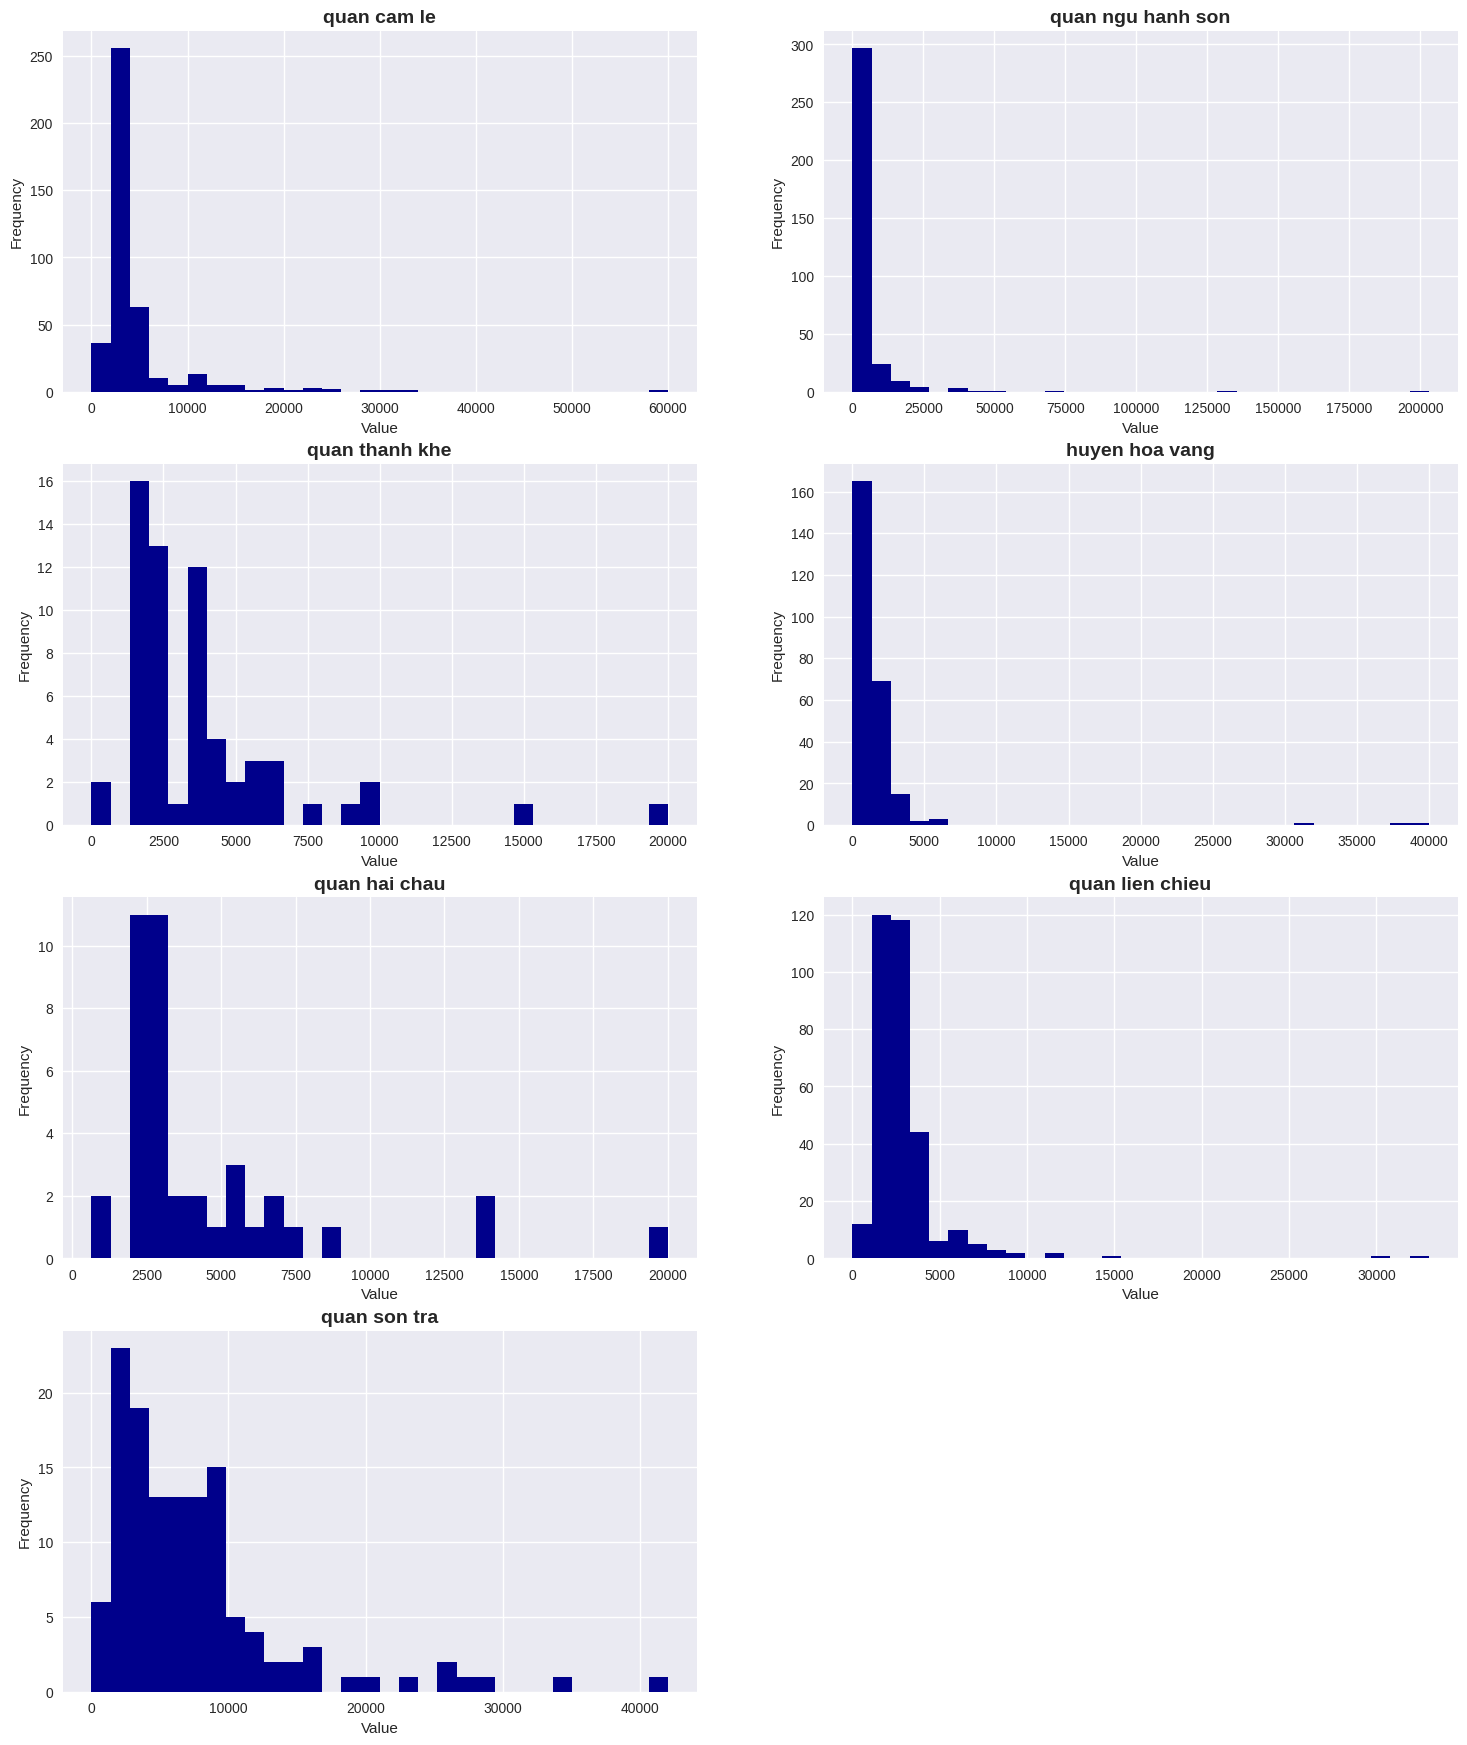

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(len(gr_location)):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']==gr_location[i]]['SalePrice'],bins=30,color='DarkBlue')
  plt.title(gr_location[i],fontweight='bold',fontsize=14)
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/histogram_raw_saleprice.png",bbox_inches = 'tight',pad_inches = 0)

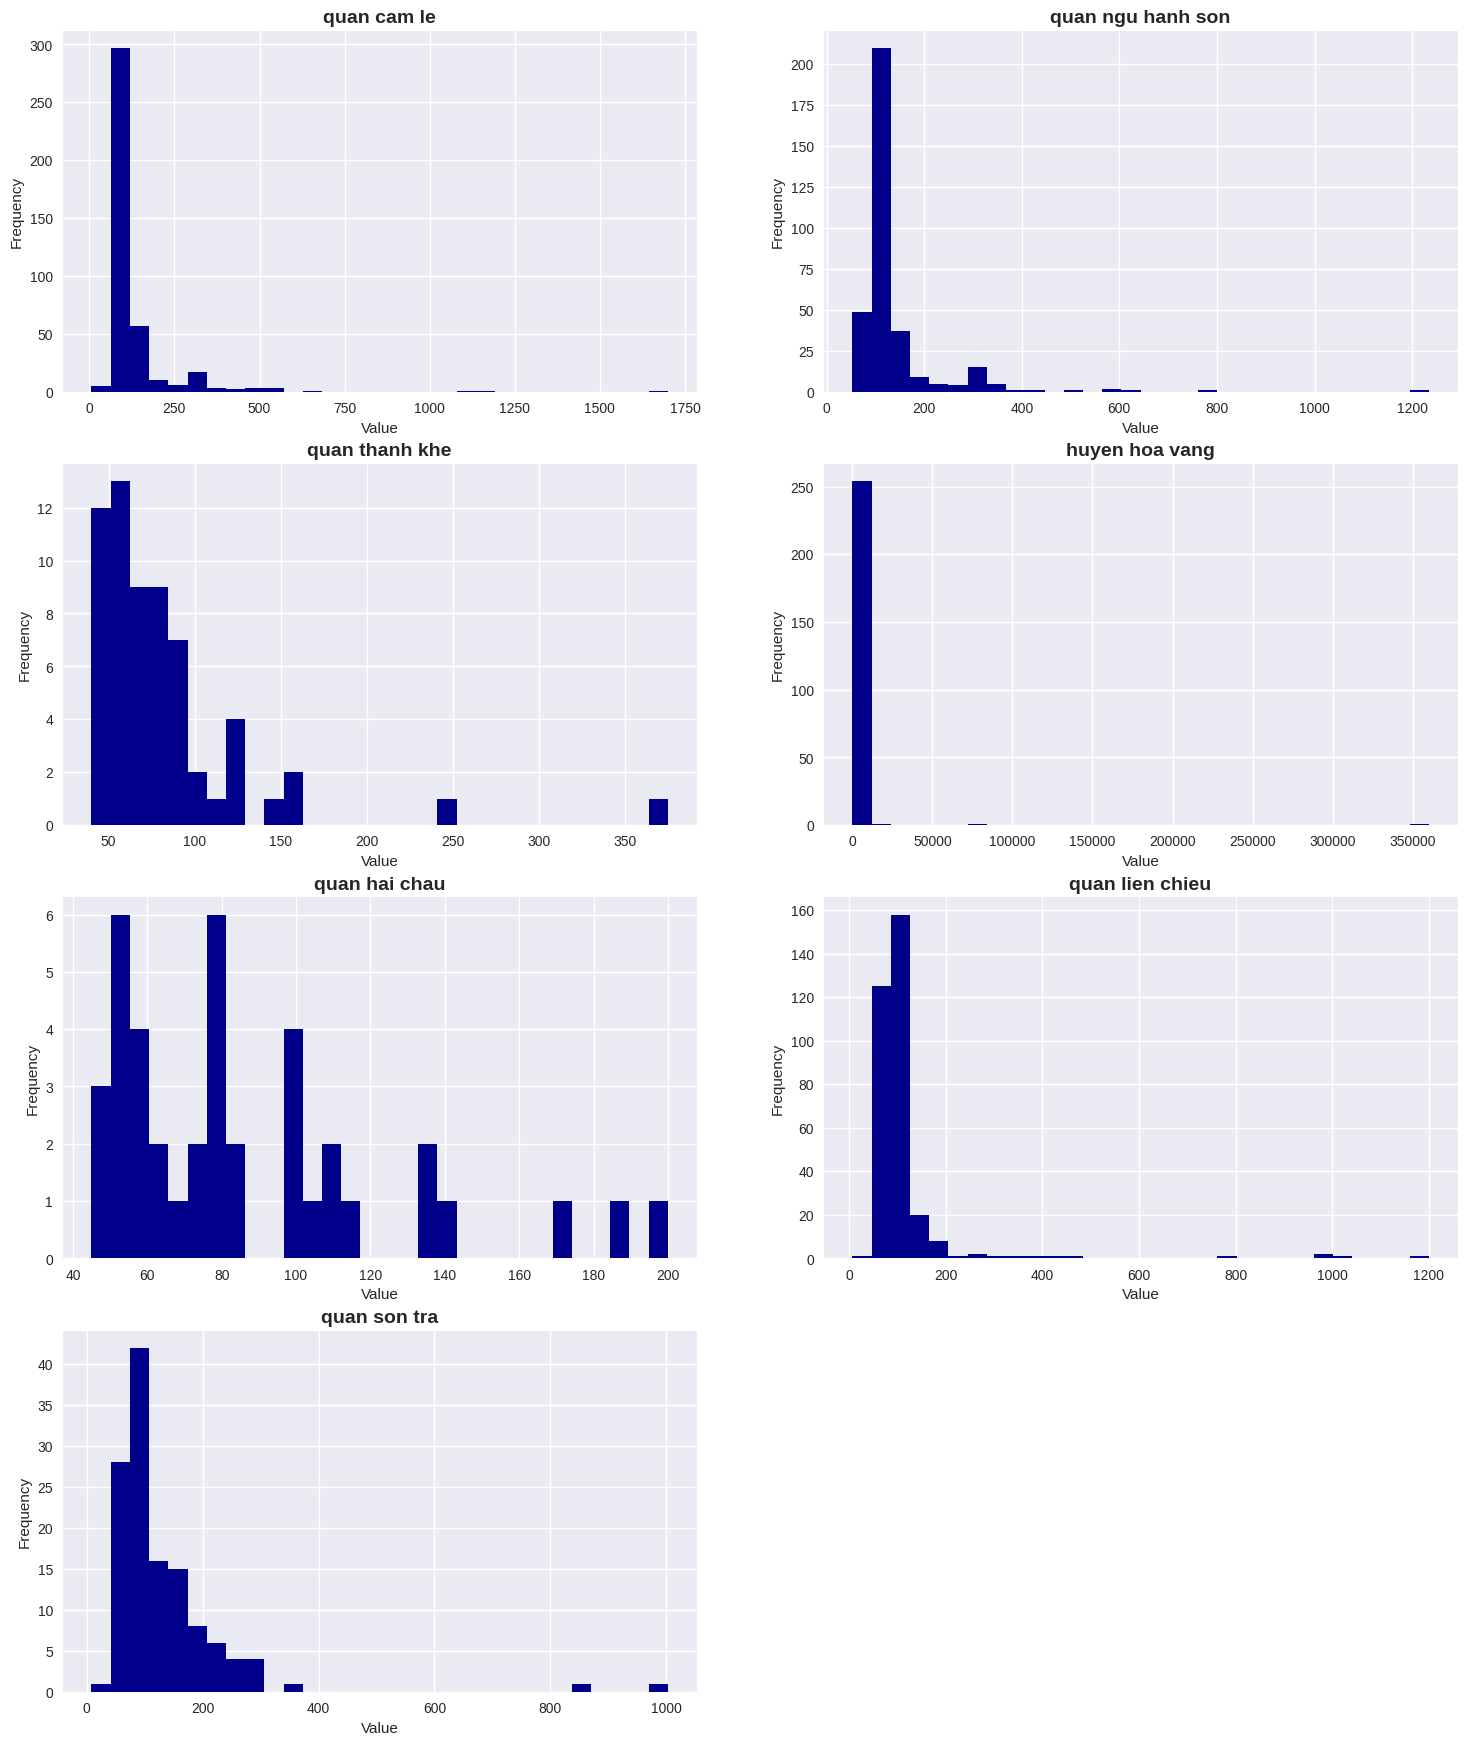

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(len(gr_location)):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']==gr_location[i]]['Area'],bins=30,color='DarkBlue')
  plt.title(gr_location[i],fontweight='bold',fontsize=14)
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/histogram_raw_area.png",bbox_inches = 'tight',pad_inches = 0)

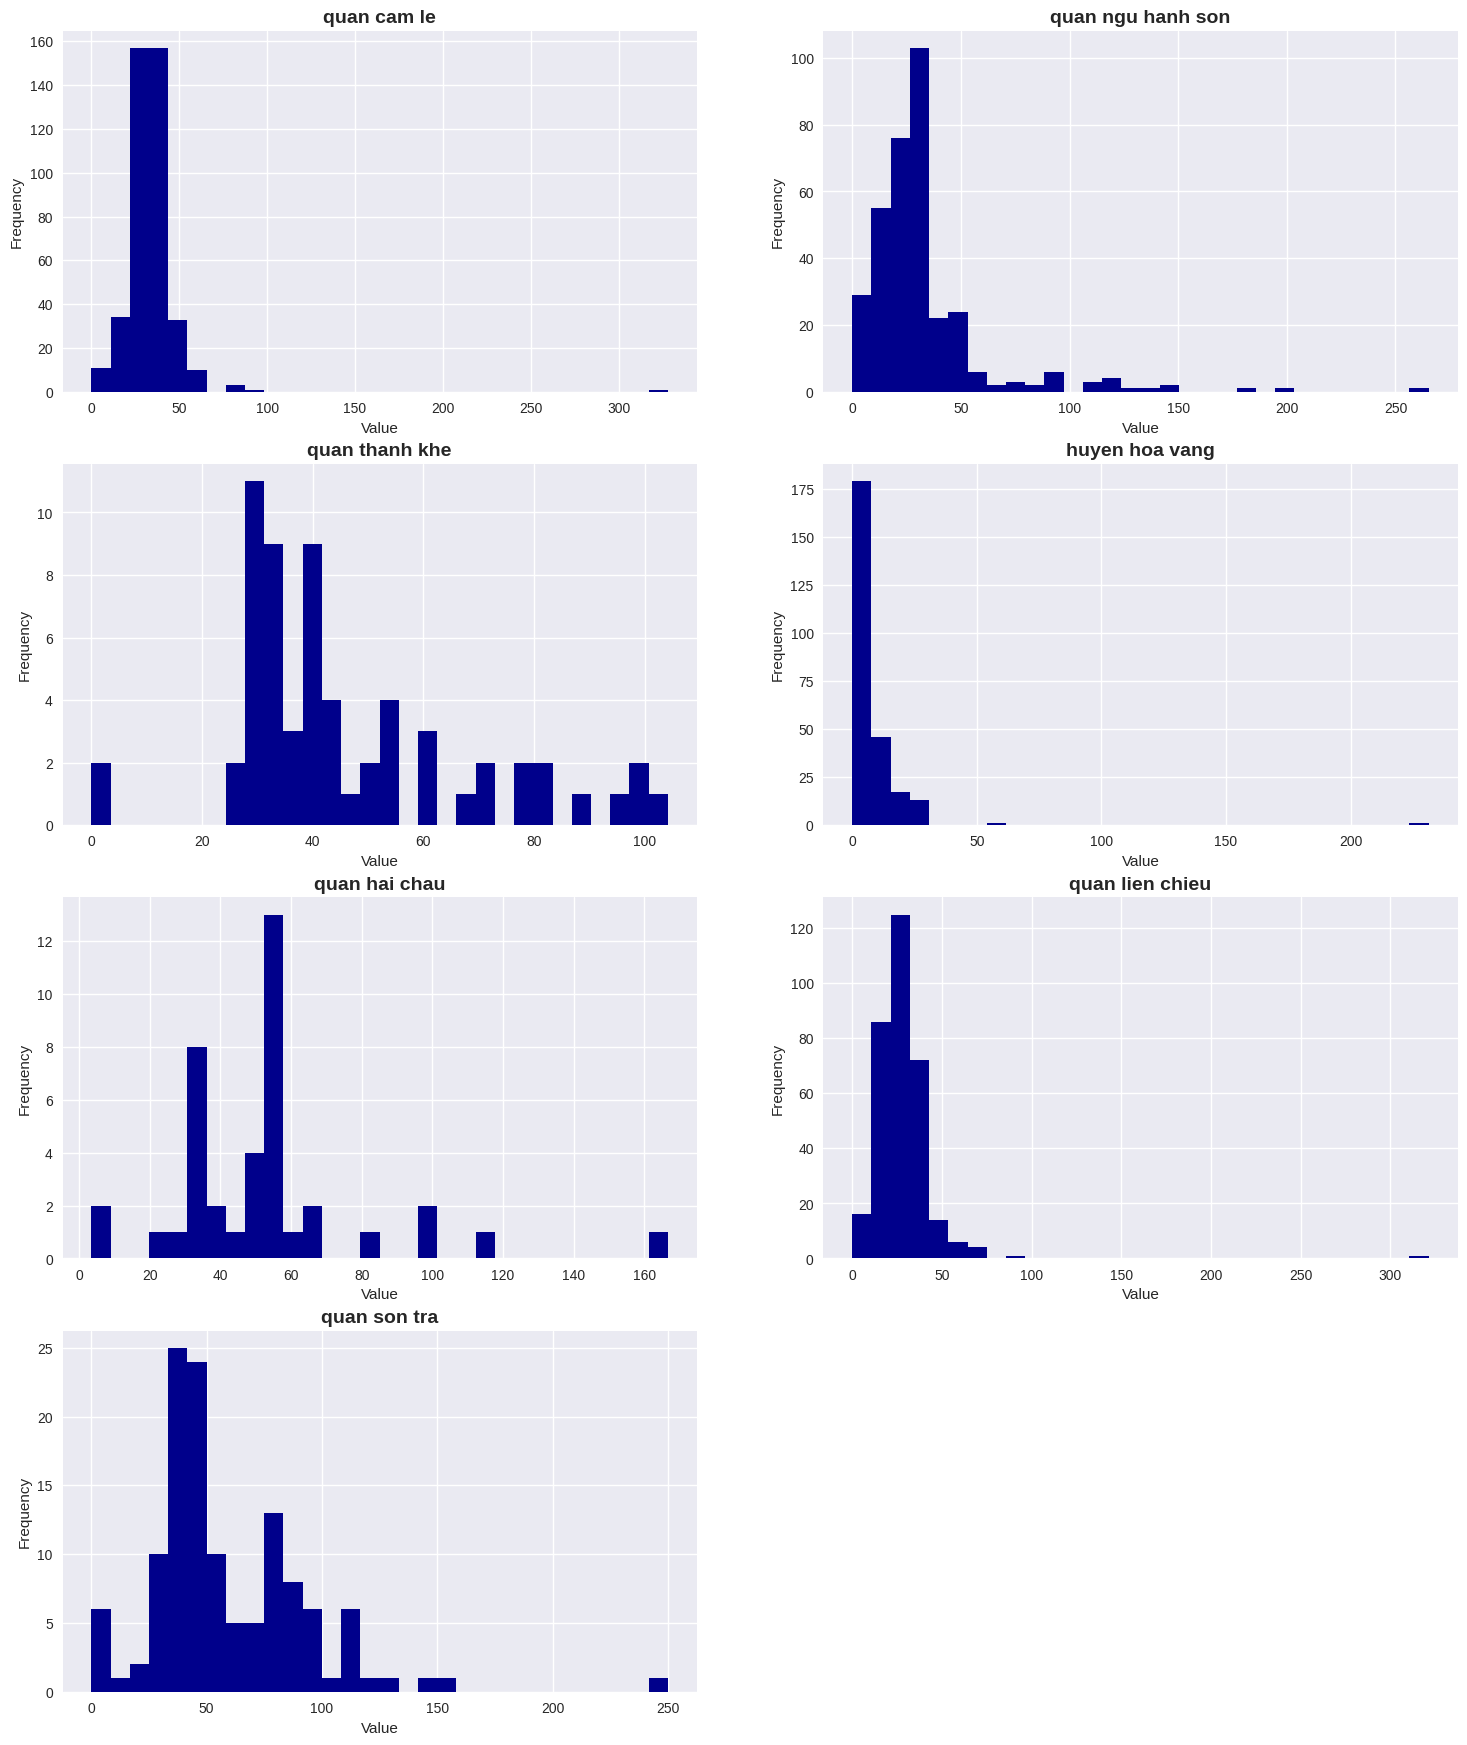

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(len(gr_location)):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']==gr_location[i]]['Price/m2'],bins=30,color='DarkBlue')
  plt.title(gr_location[i],fontweight='bold',fontsize=14)
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/histogram_raw_pricem2.png",bbox_inches = 'tight',pad_inches = 0)

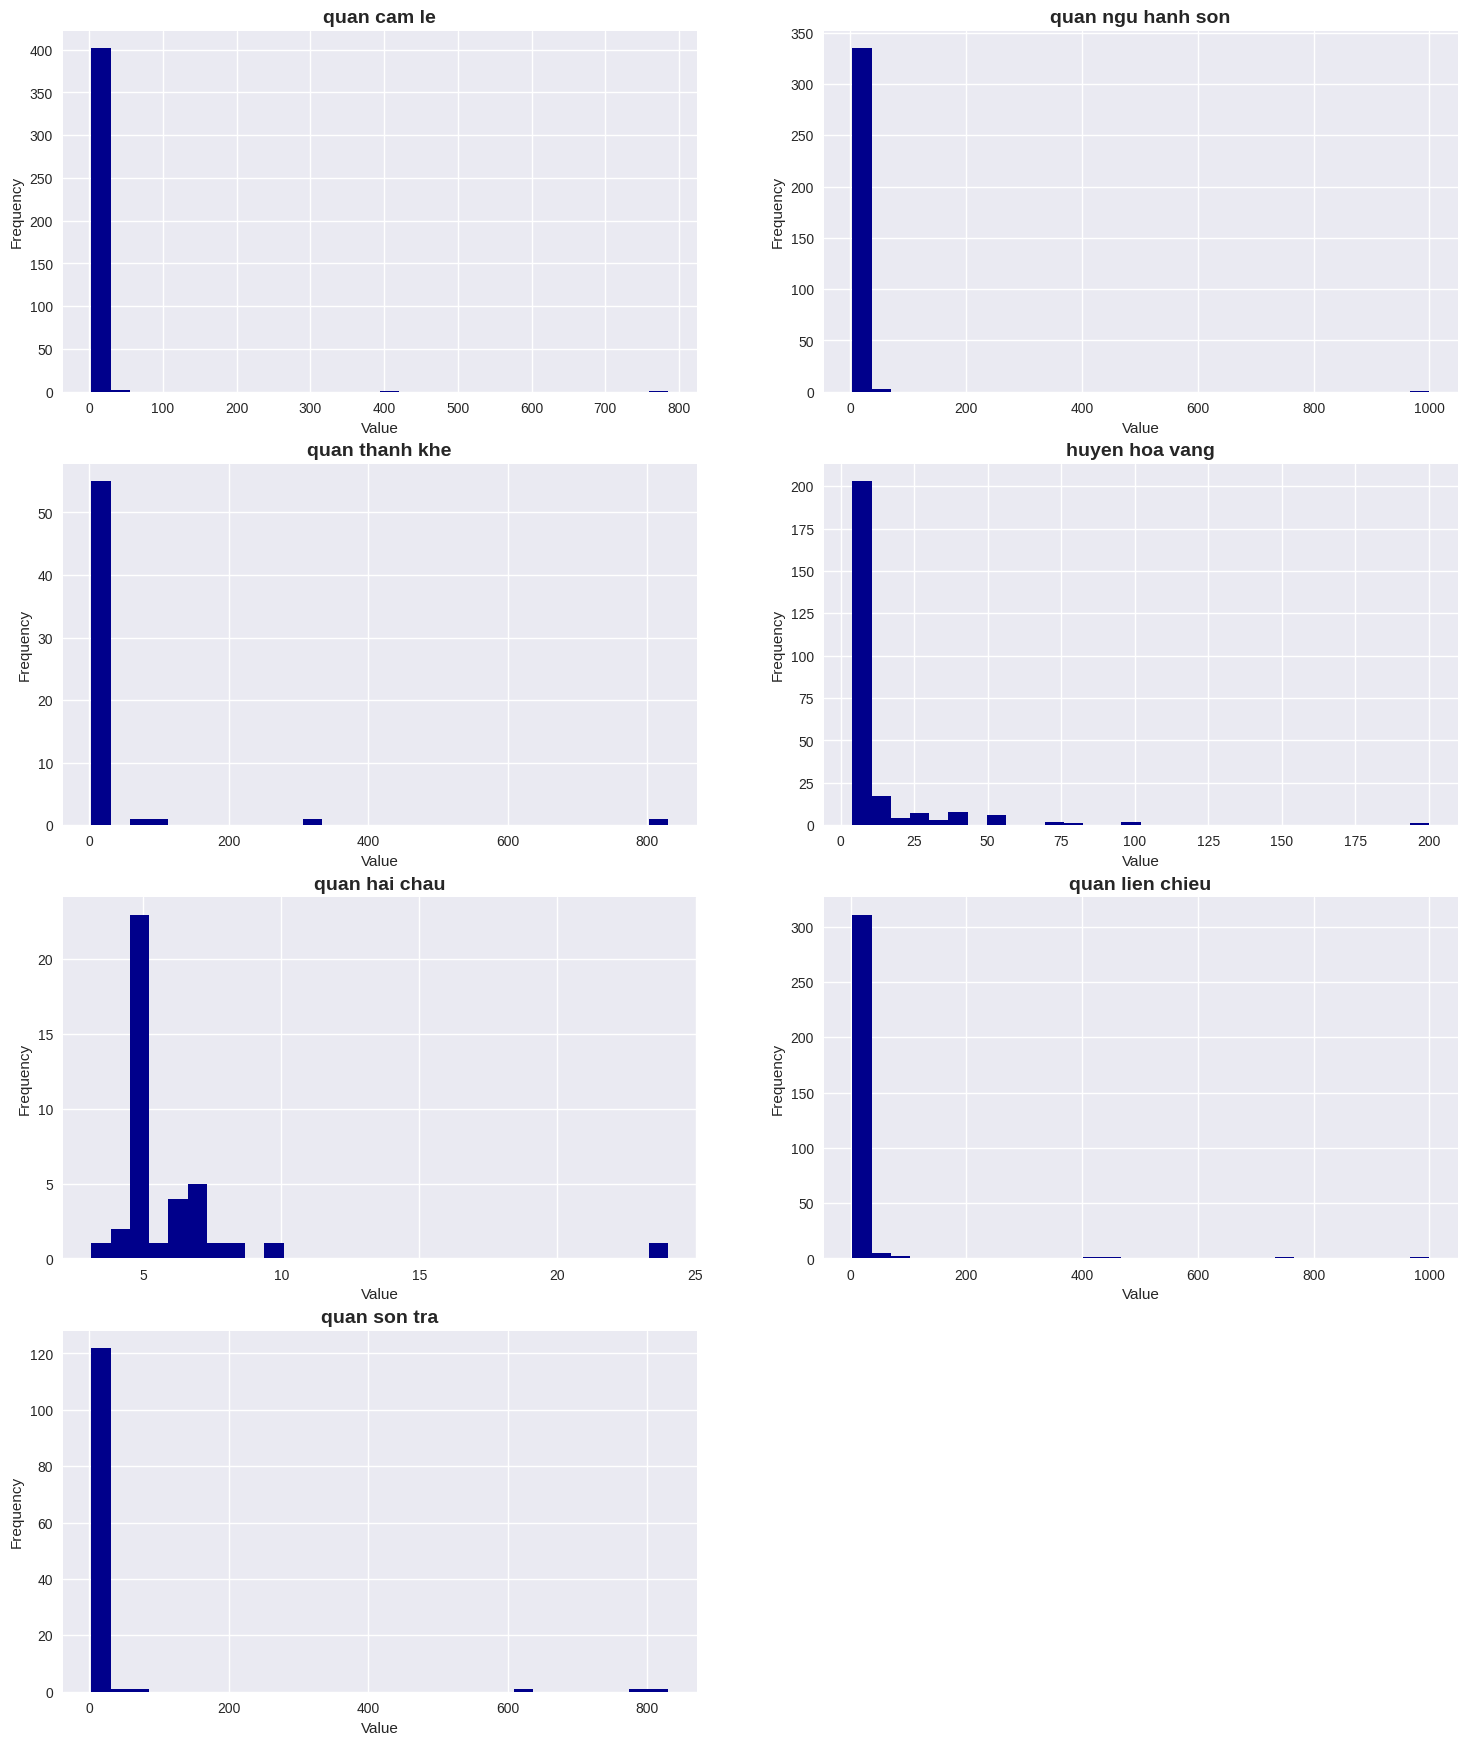

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(len(gr_location)):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']==gr_location[i]]['Width'],bins=30,color='DarkBlue')
  plt.title(gr_location[i],fontweight='bold',fontsize=14)
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/histogram_raw_width.png",bbox_inches = 'tight',pad_inches = 0)

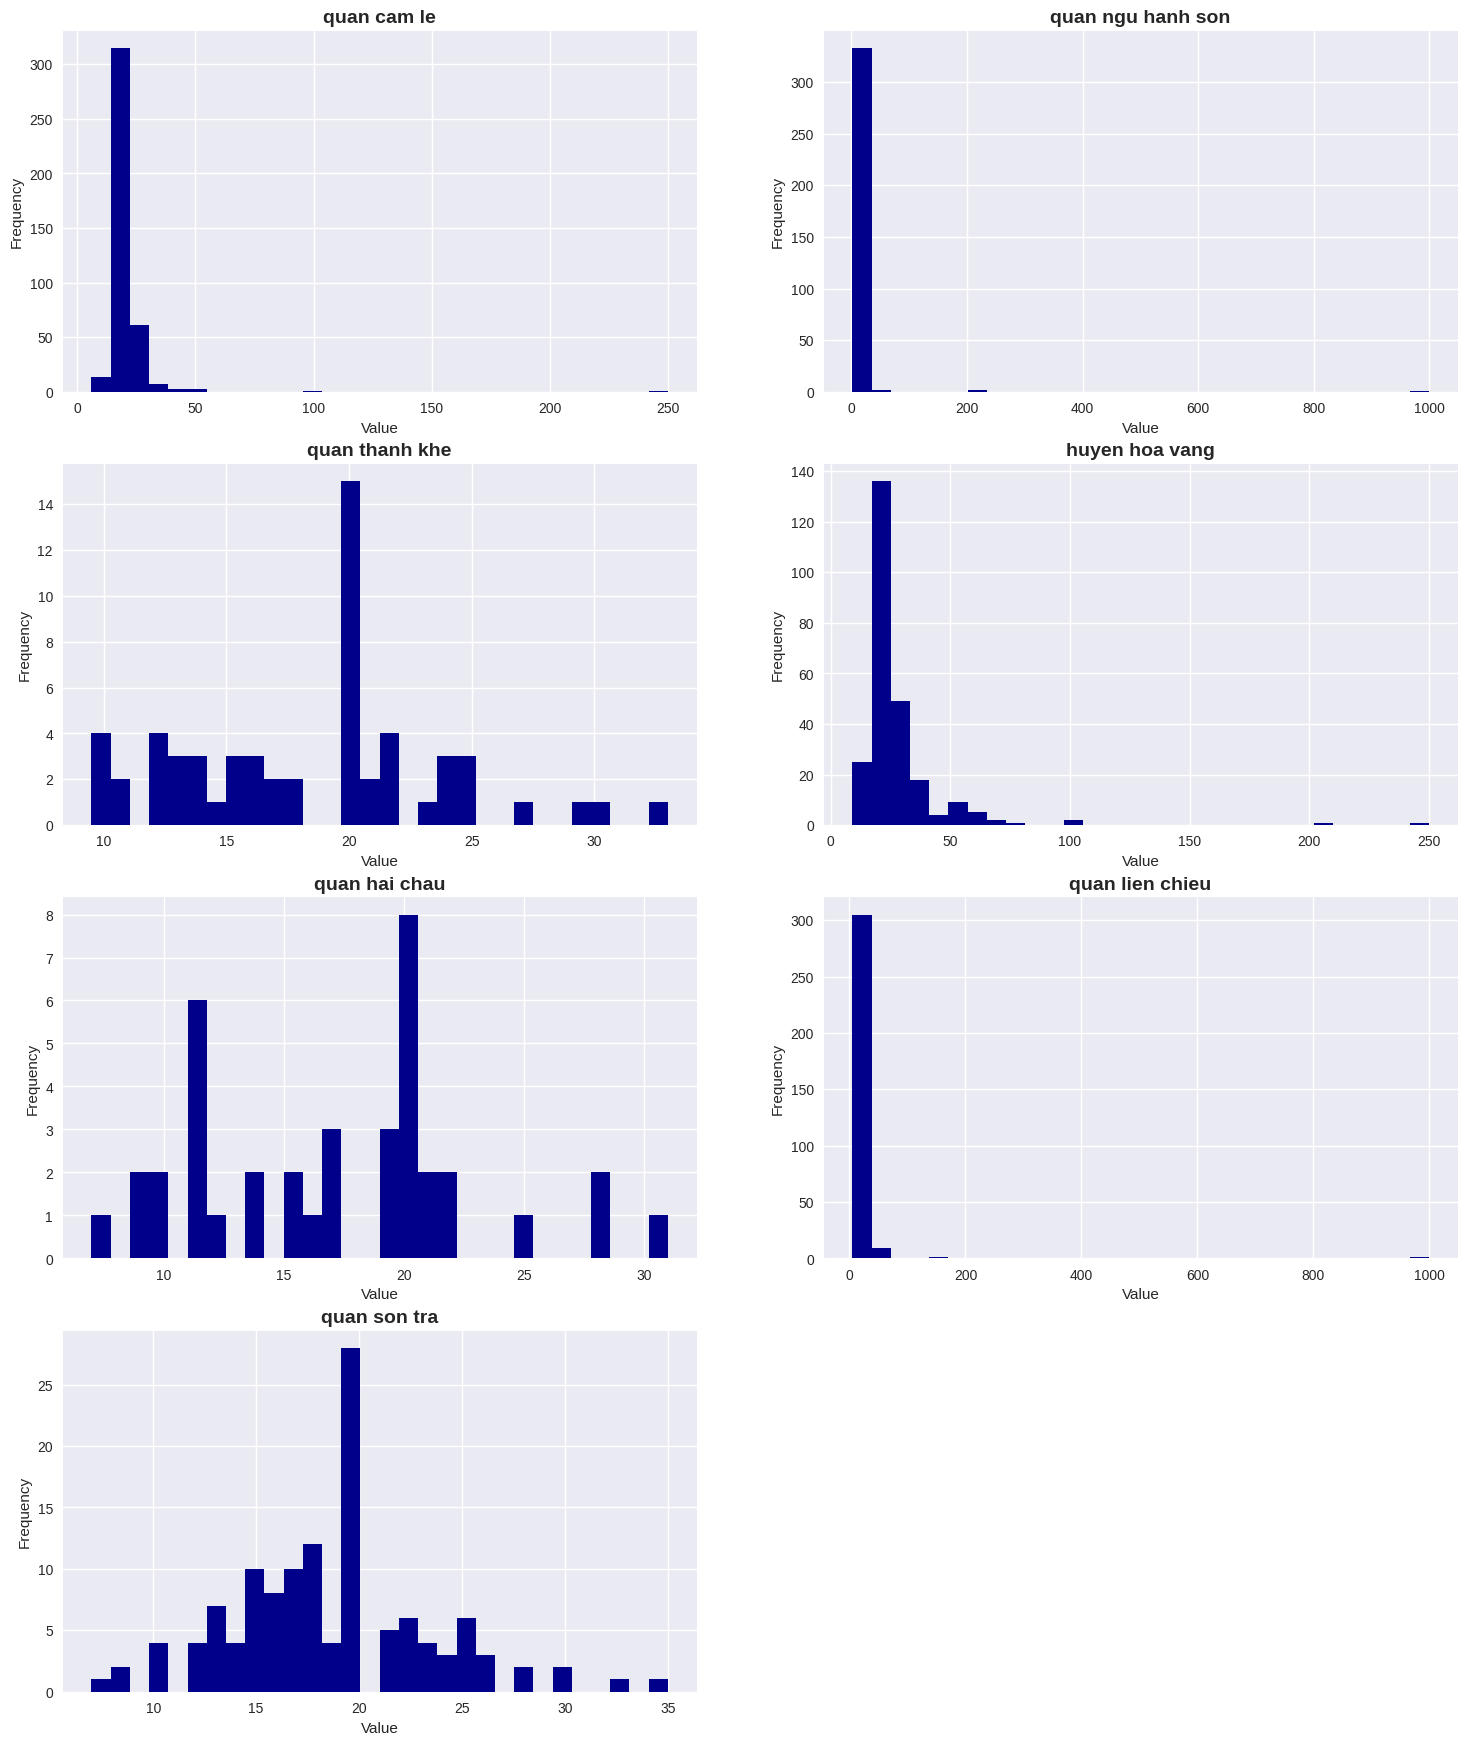

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(len(gr_location)):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']==gr_location[i]]['Length'],bins=30,color='DarkBlue')
  plt.title(gr_location[i],fontweight='bold',fontsize=14)
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/histogram_raw_length.png",bbox_inches = 'tight',pad_inches = 0)

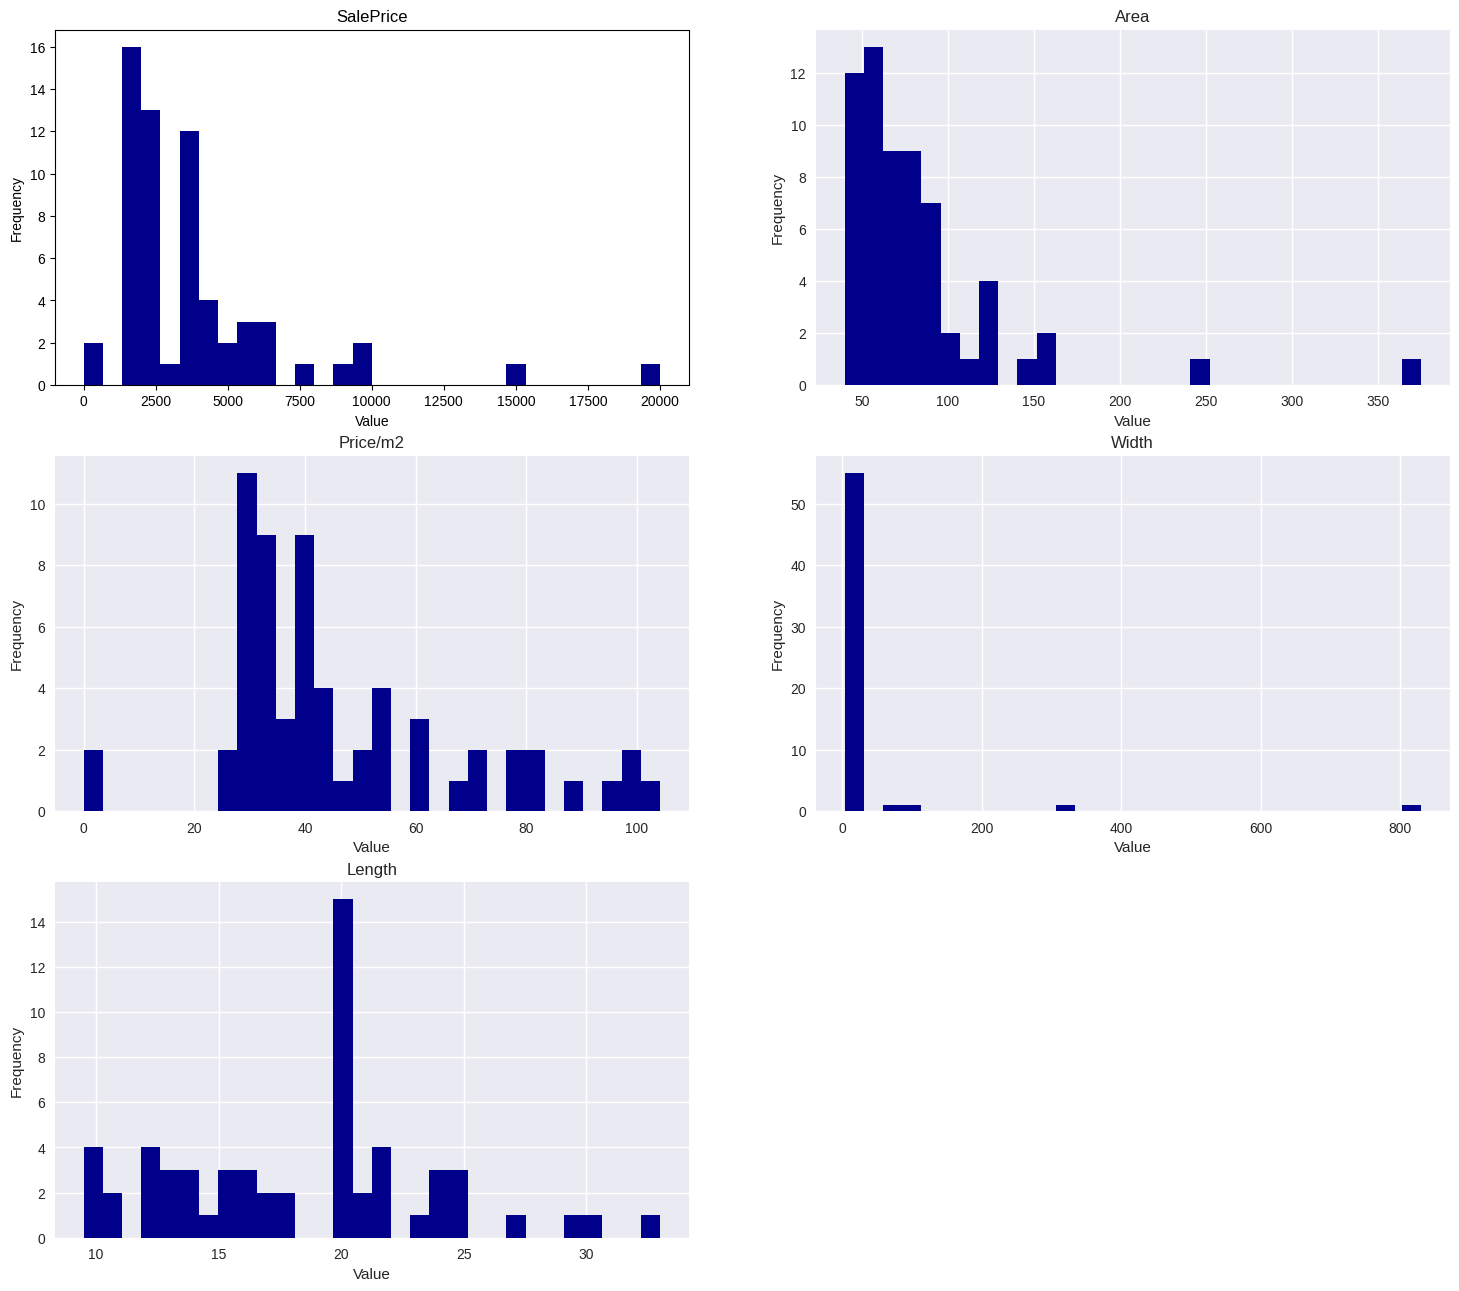

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']=='quan thanh khe'][df.columns[i]],bins=30,color='DarkBlue')
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  # plt.grid()
  sbplt+=1
plt.savefig(f"{images_dir}/thanhkhe.png",bbox_inches = 'tight',pad_inches = 0)

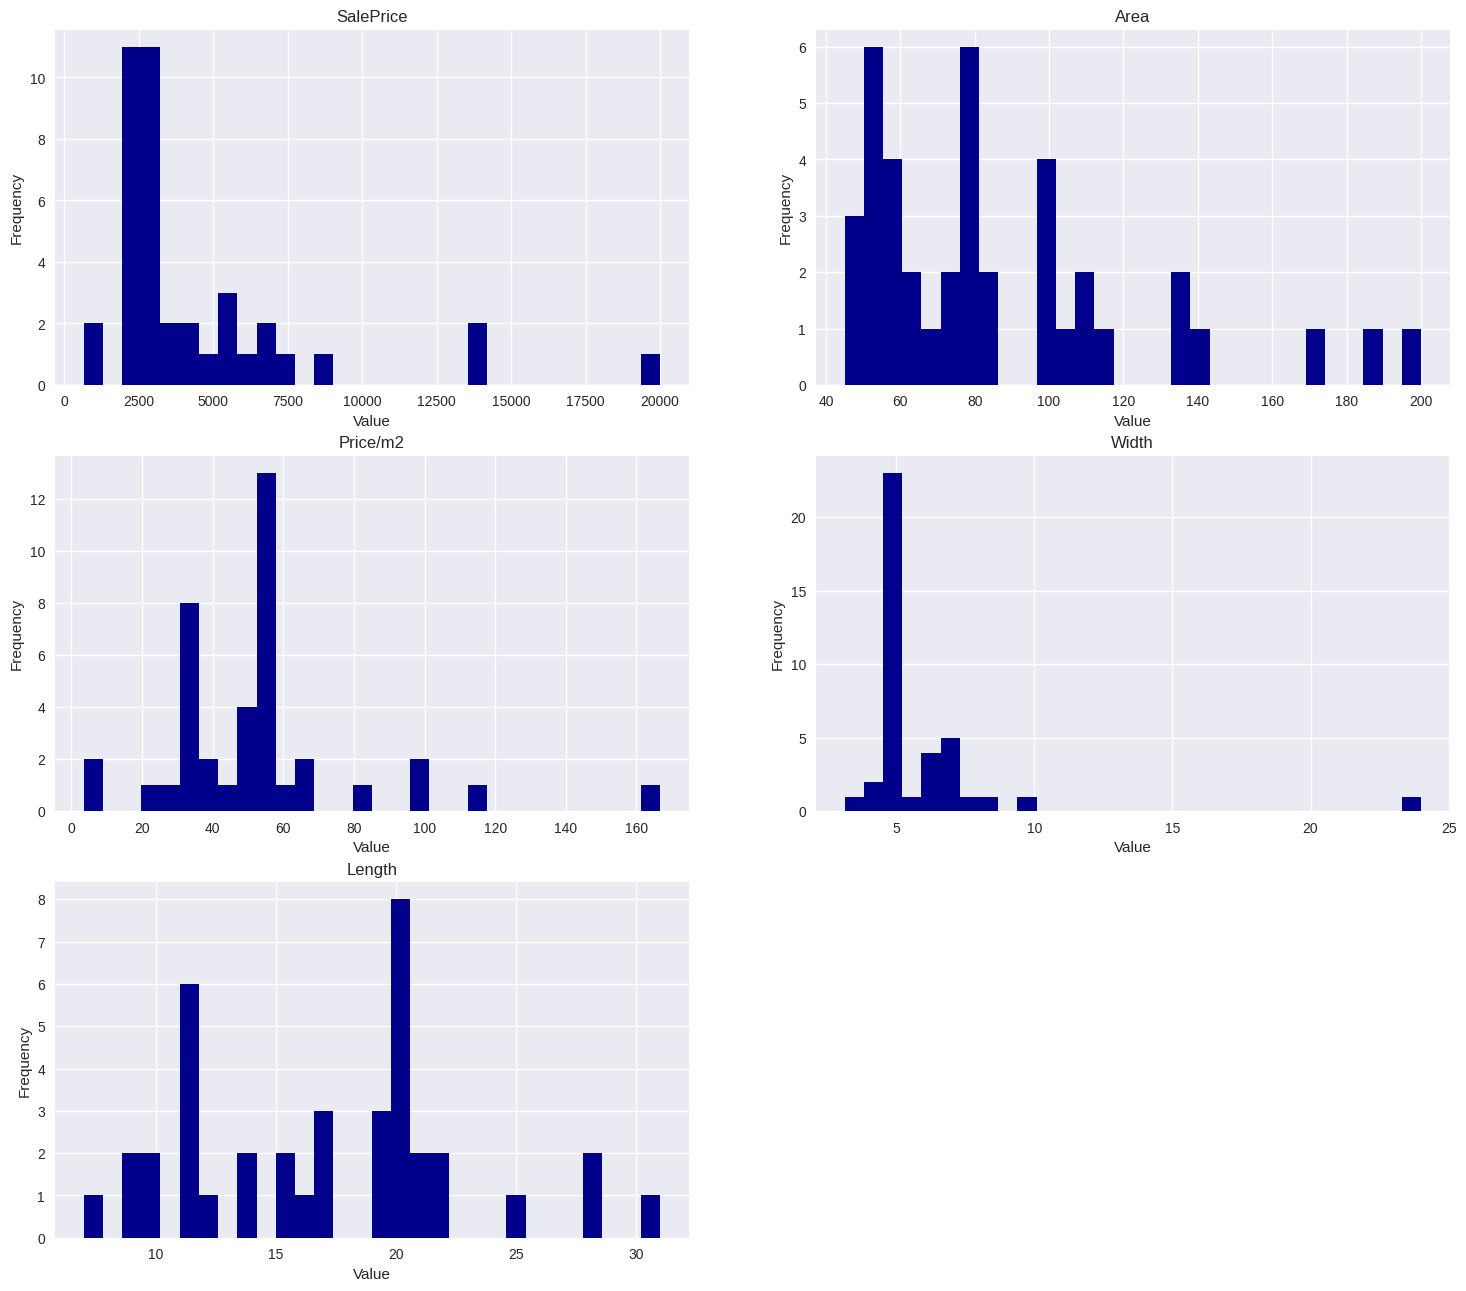

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']=='quan hai chau'][df.columns[i]],bins=30,color='DarkBlue')
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  # plt.grid()
  sbplt+=1

plt.savefig(f"{images_dir}/haichau.png",bbox_inches = 'tight',pad_inches = 0)

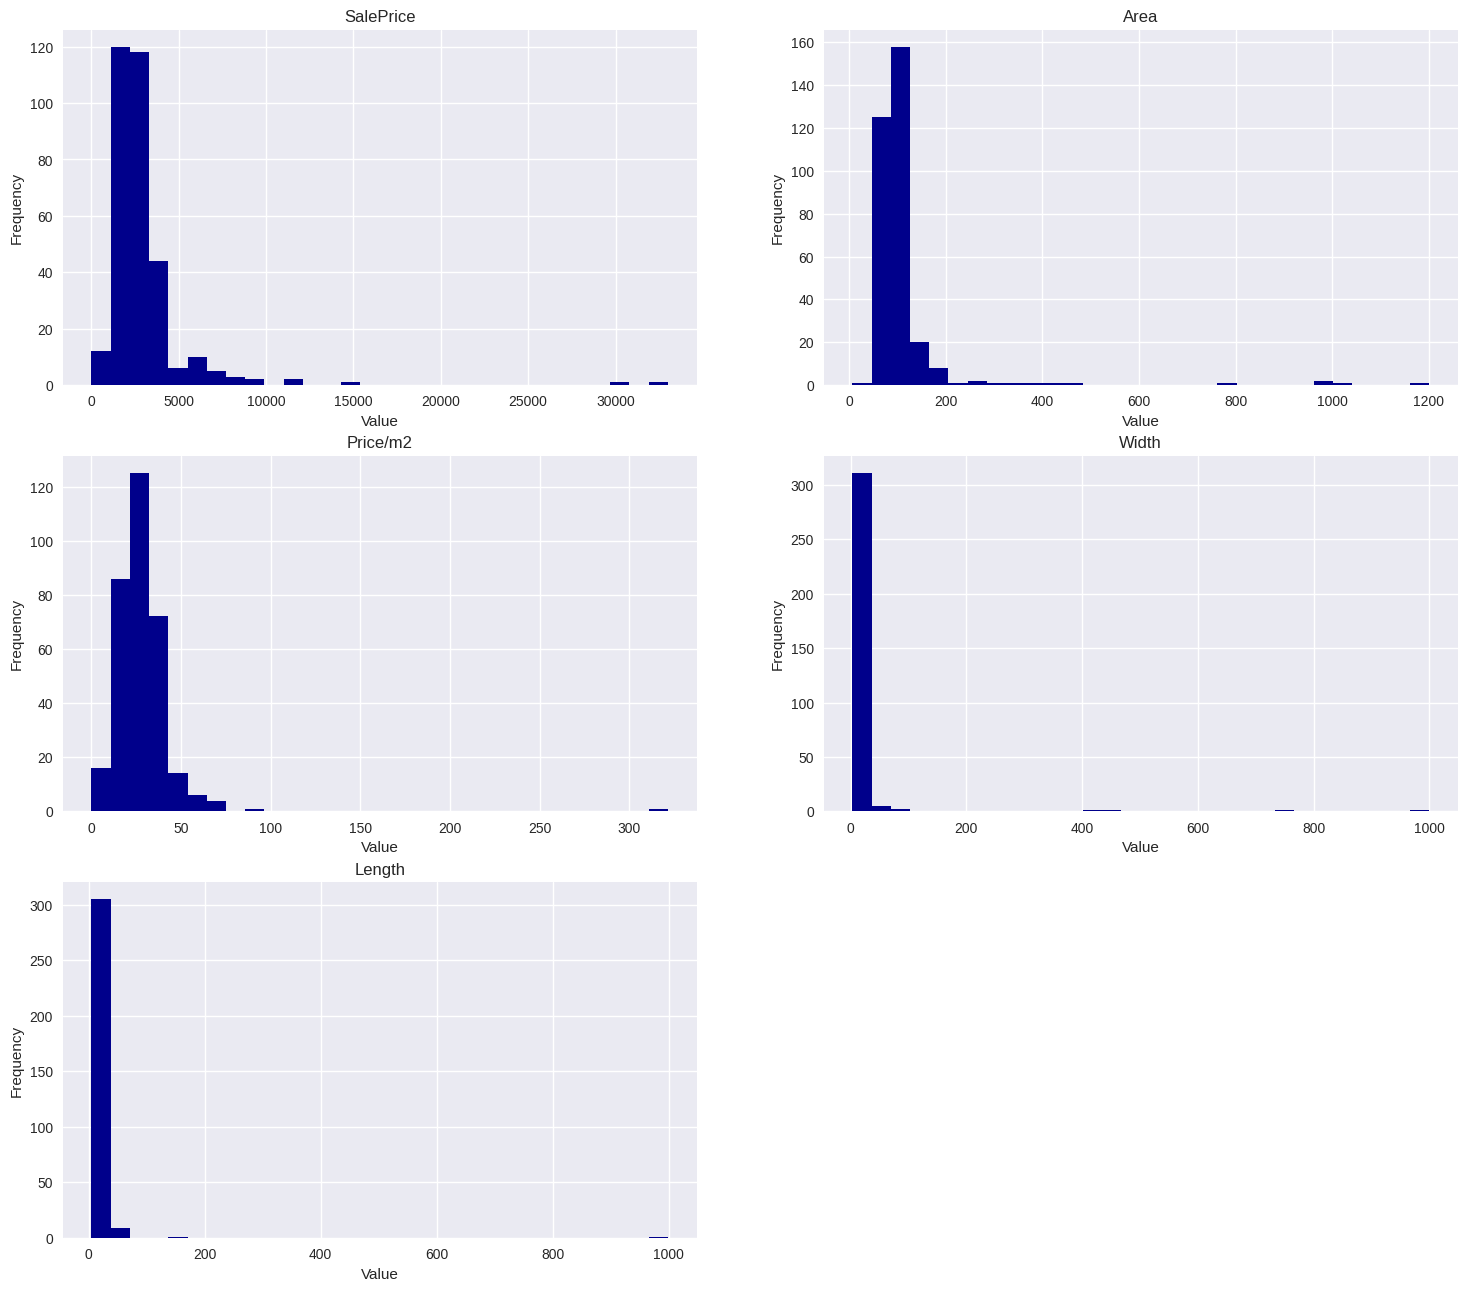

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']=='quan lien chieu'][df.columns[i]],bins=30,color='DarkBlue')
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  # plt.grid()
  sbplt+=1

plt.savefig(f"{images_dir}/lienchieu.png",bbox_inches = 'tight',pad_inches = 0)

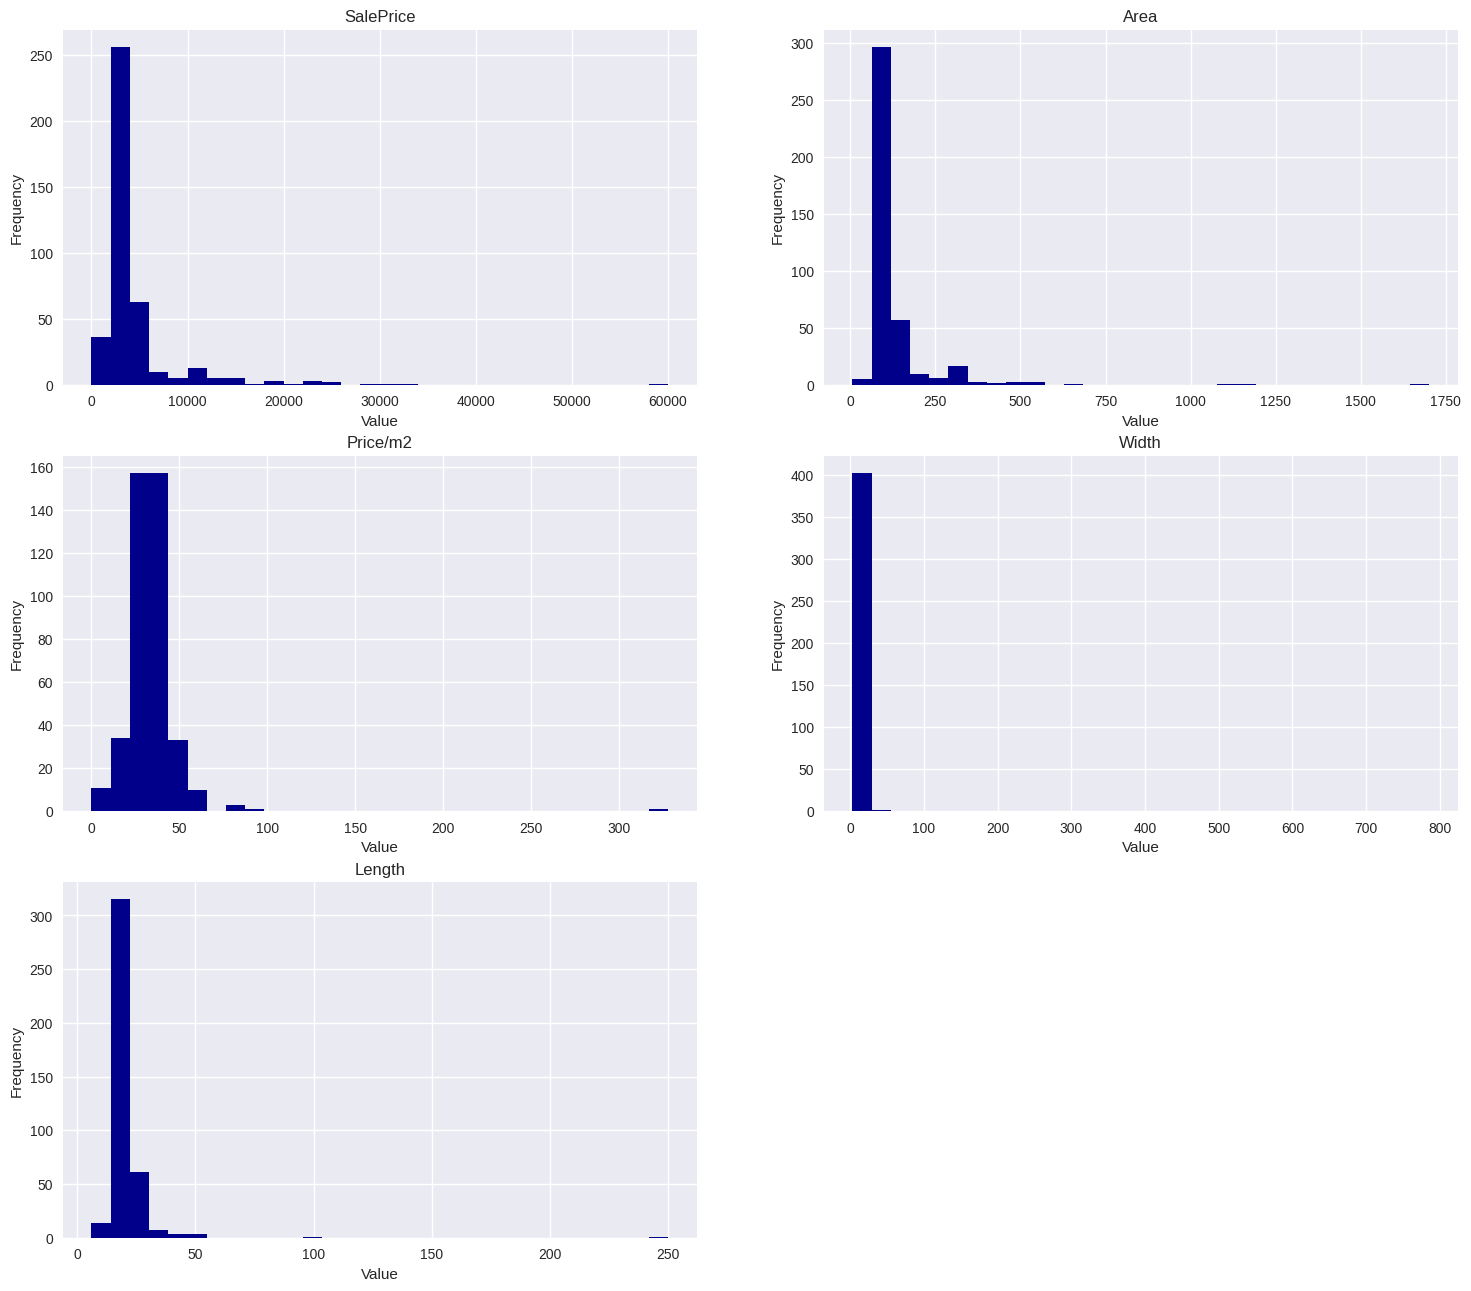

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']=='quan cam le'][df.columns[i]],bins=30,color='DarkBlue')
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  # plt.grid()
  sbplt+=1

plt.savefig(f"{images_dir}/camle.png",bbox_inches = 'tight',pad_inches = 0)

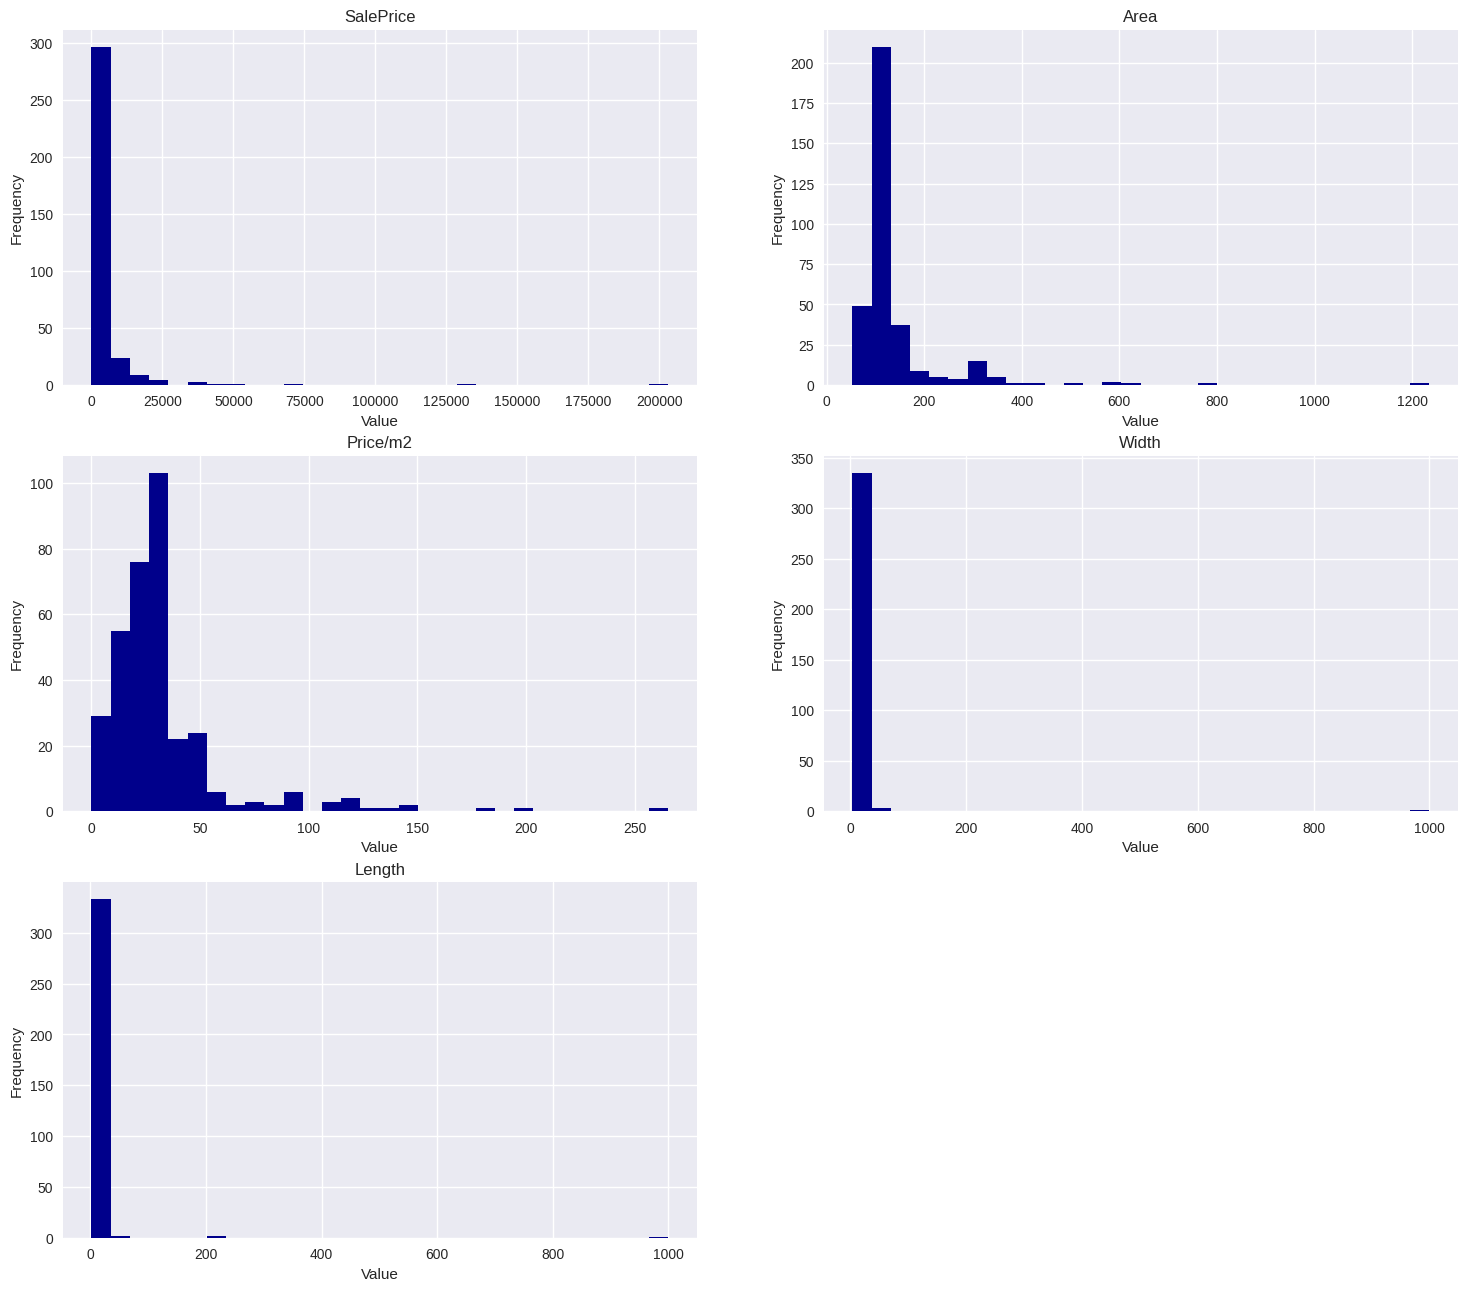

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']=='quan ngu hanh son'][df.columns[i]],bins=30,color='DarkBlue')
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  # plt.grid()
  sbplt+=1

plt.savefig(f"{images_dir}/nguhanhson.png",bbox_inches = 'tight',pad_inches = 0)

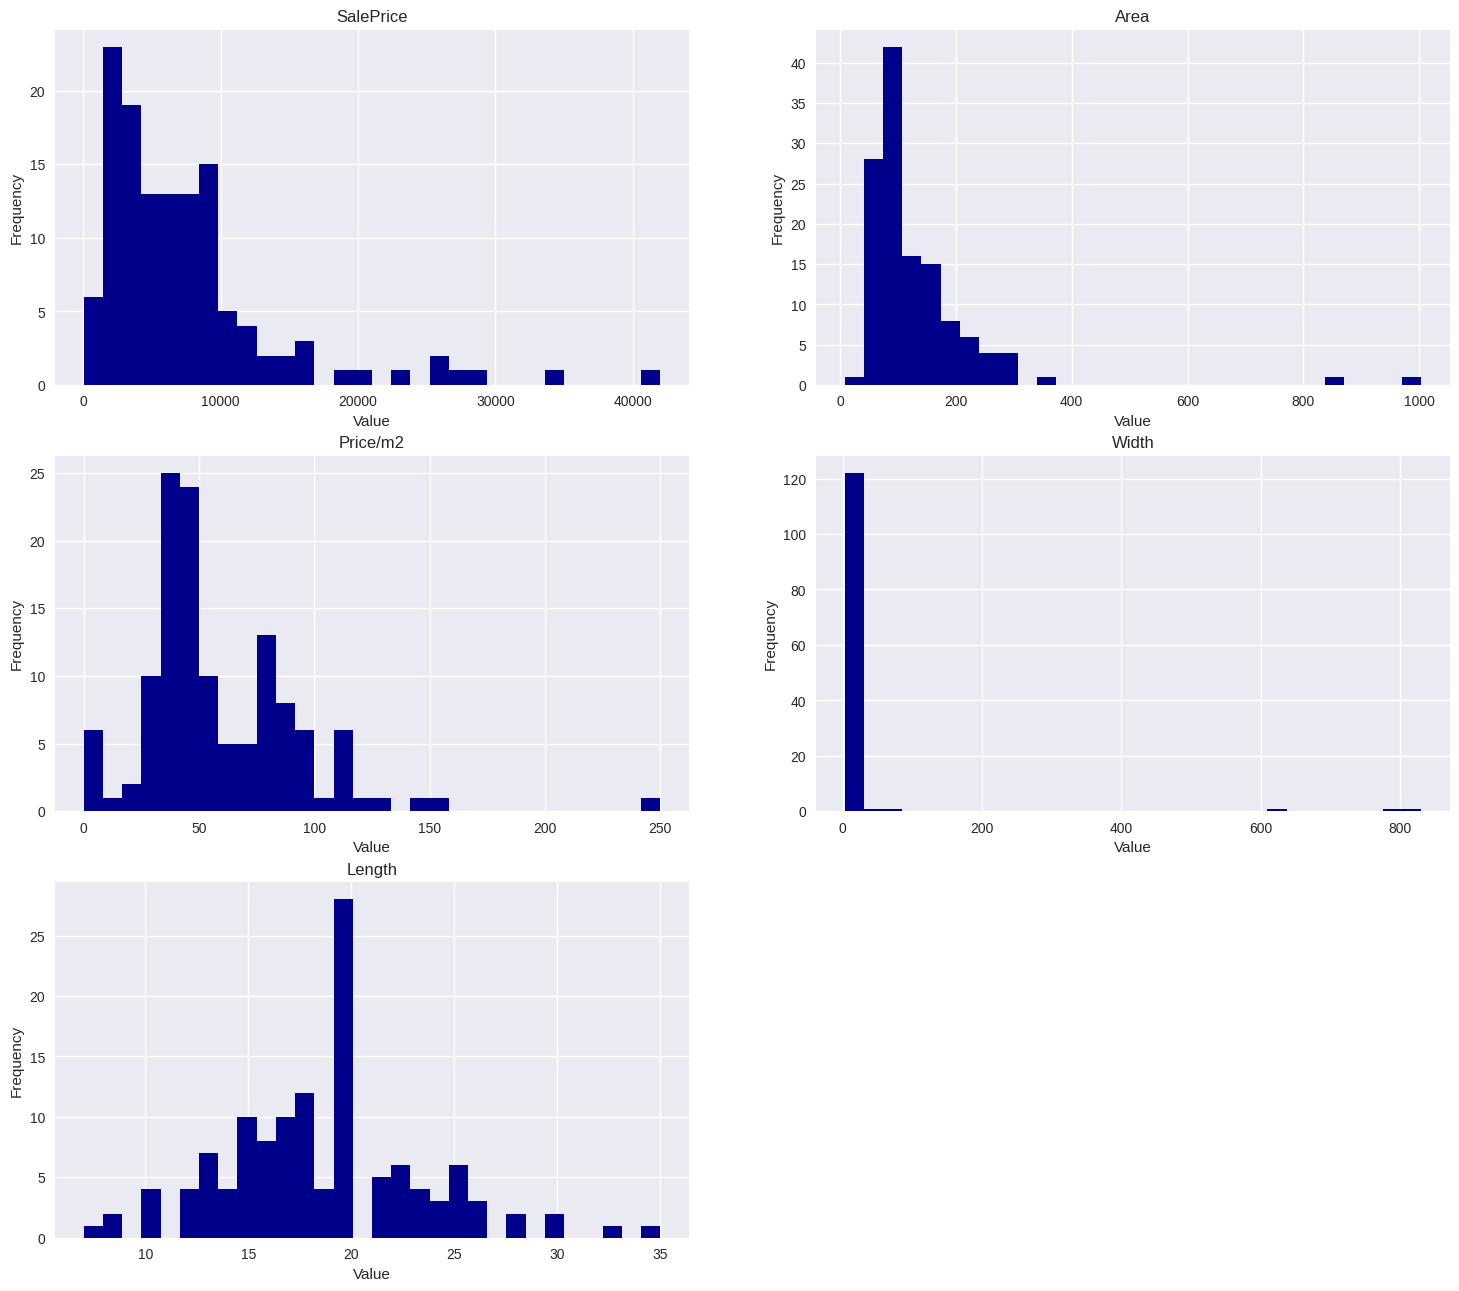

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']=='quan son tra'][df.columns[i]],bins=30,color='DarkBlue')
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  # plt.grid()
  sbplt+=1
plt.savefig(f"{images_dir}/sontra.png",bbox_inches = 'tight',pad_inches = 0)

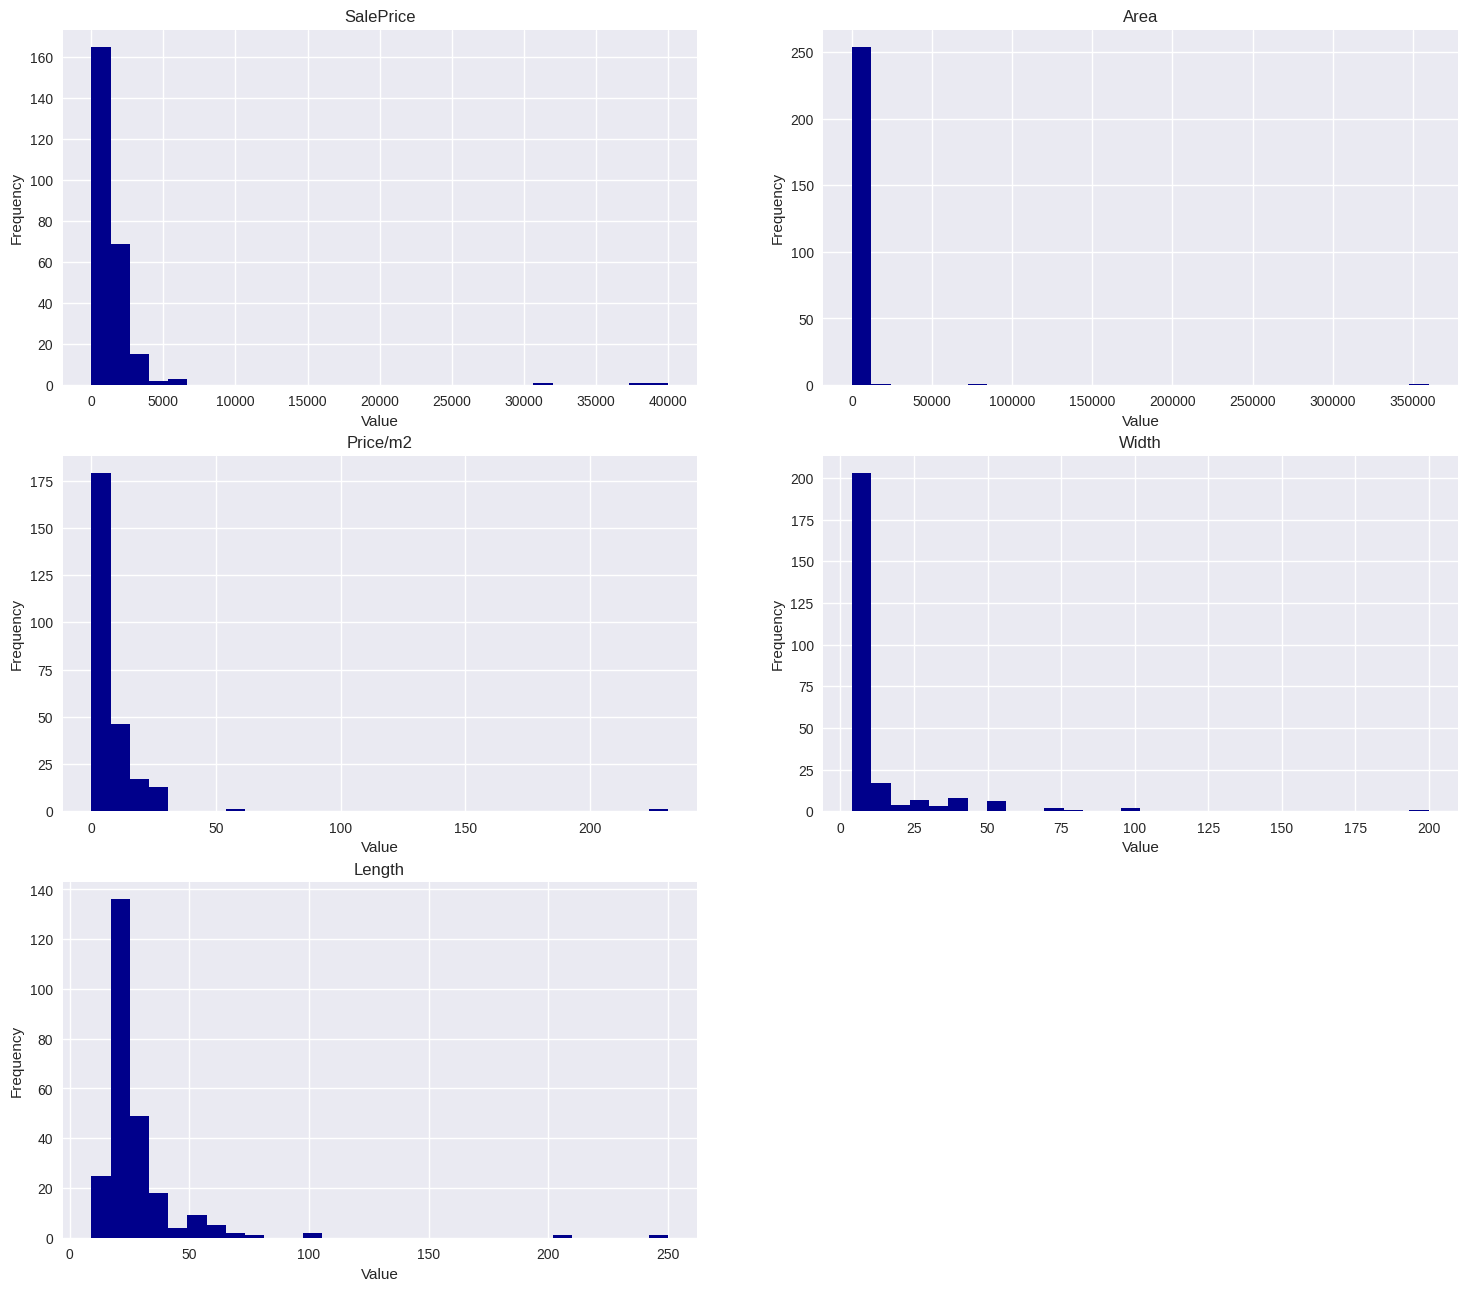

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  plt.hist(df.loc[df['Location']=='huyen hoa vang'][df.columns[i]],bins=30,color='DarkBlue')
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  # plt.grid()
  sbplt+=1

plt.savefig(f"{images_dir}/hoavang.png",bbox_inches = 'tight',pad_inches = 0)

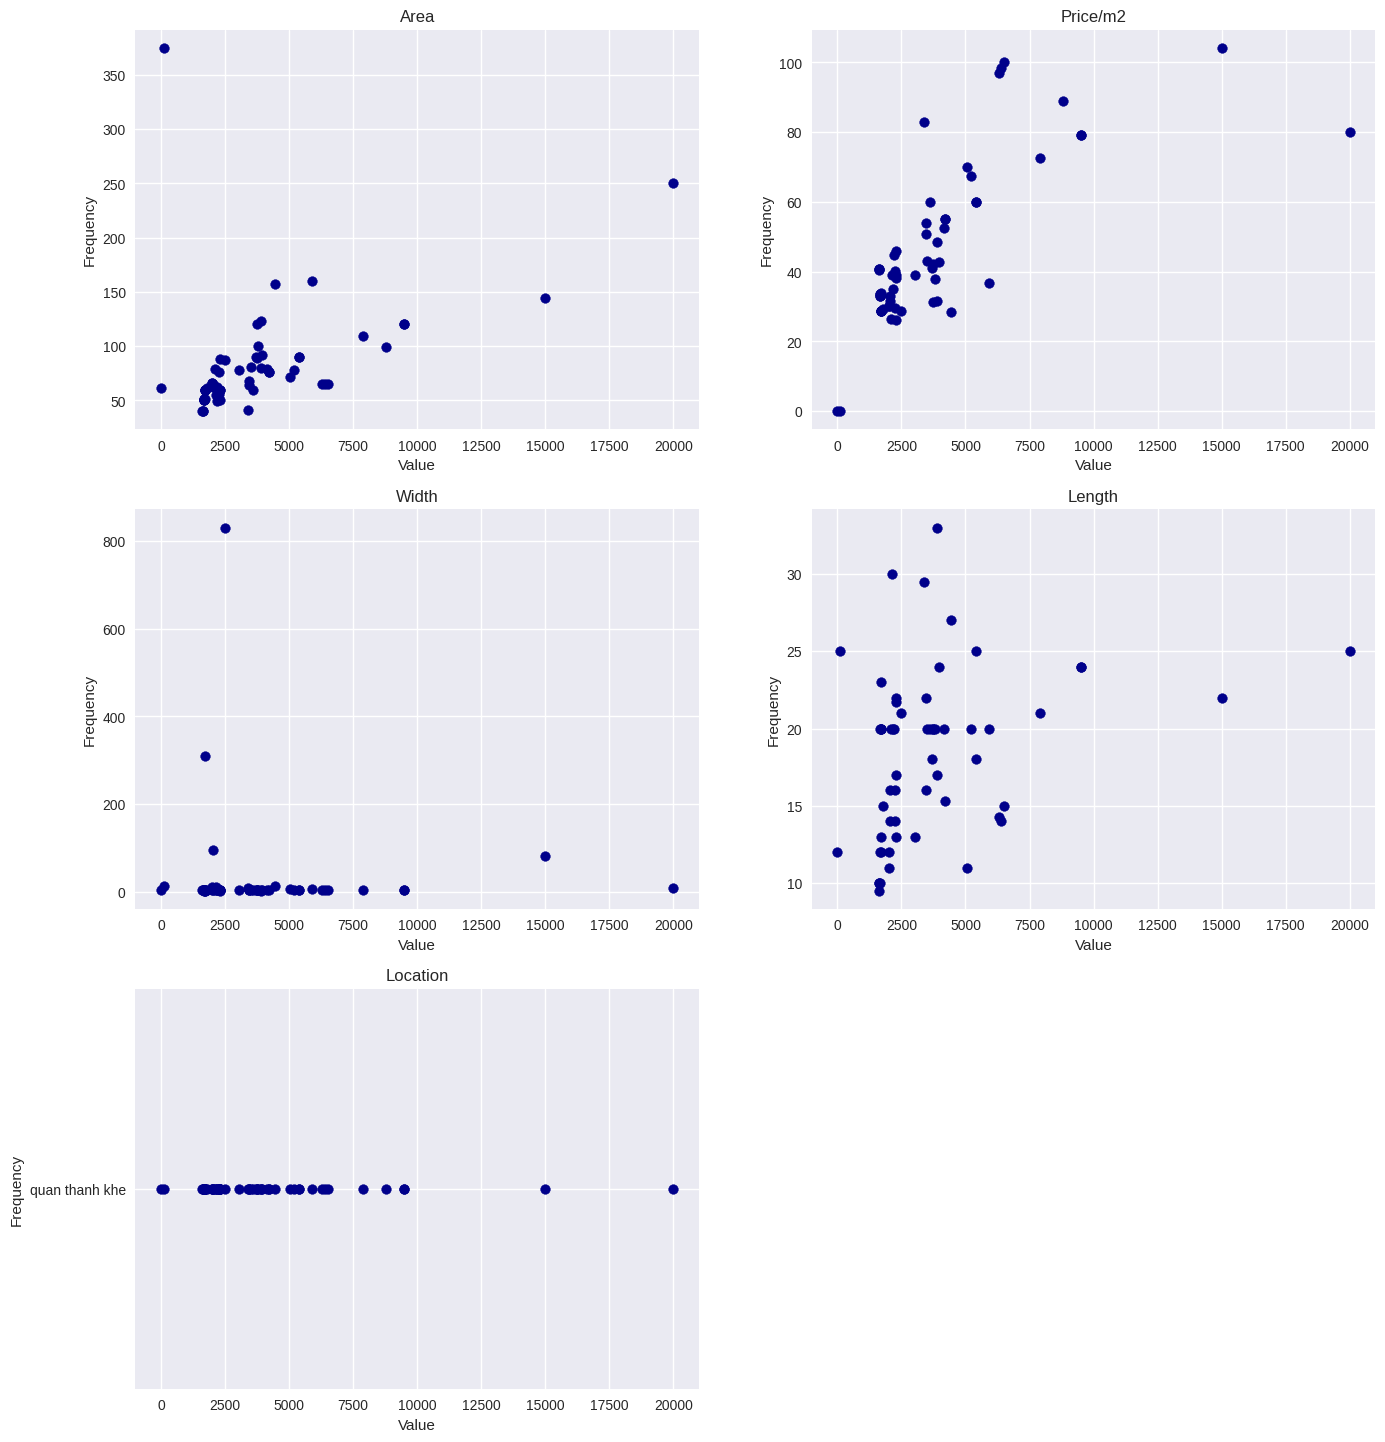

In [ ]:
plt.figure(figsize=(16, 18),dpi=100)
sbplt=321
for i in range(1,len(df.columns)):
  plt.subplot(sbplt)
  plt.scatter(df.loc[df['Location']=='quan thanh khe']['SalePrice'],df.loc[df['Location']=='quan thanh khe'][df.columns[i]],color='darkblue')
  plt.title(df.columns[i])
  plt.ylabel("Frequency")
  plt.xlabel("Value")
  plt.style.use('seaborn')
  sbplt+=1


# **2. Cleaning**


In [ ]:
df = pd.read_csv('./data_crawl.csv')
df_copy=df.copy()
images_dir = '/content/drive/MyDrive/KHDL/Images/Cleaning'
gr_location=df.Location.unique() #Divide dataframe into group using column 'Location'
df.describe()

SalePrice           Area     Price/m2        Width       Length
count    1560.000000    1560.000000  1560.000000  1547.000000  1537.000000
mean     4180.091873     477.931506    31.086949    12.908513    23.347573
std      8003.291657    9354.421559    26.809021    63.169243    38.075672
min         1.000000       6.250000     0.000000     3.000000     2.000000
25%      1768.250000      93.000000    17.567500     5.000000    18.000000
50%      2765.000000     100.000000    28.210000     5.000000    20.000000
75%      3800.000000     131.000000    36.880000     6.125000    22.000000
max    203000.000000  360000.000000   328.000000   999.000000   999.000000

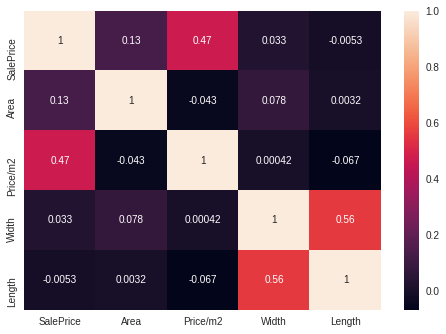

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
df.isnull().sum()

SalePrice     0
Area          0
Price/m2      0
Width        13
Length       23
Location      0
dtype: int64

### **Plot Before Cleaning**

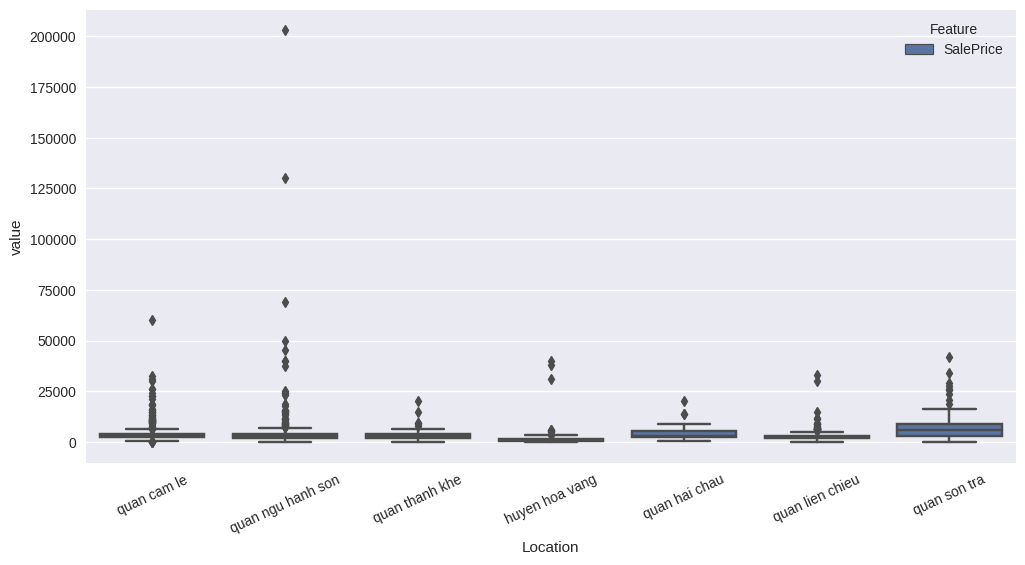

In [ ]:
plt.figure(figsize=(12, 6),dpi=100)
_data=pd.melt(df,id_vars=['Location'],value_vars=['SalePrice'],var_name='Feature')
plt.xticks(rotation = 25)
sns.boxplot(x='Location',y='value',data=_data,hue='Feature')
plt.savefig(f"{images_dir}/boxplot_raw_saleprice.png",bbox_inches = 'tight',pad_inches = 0)    

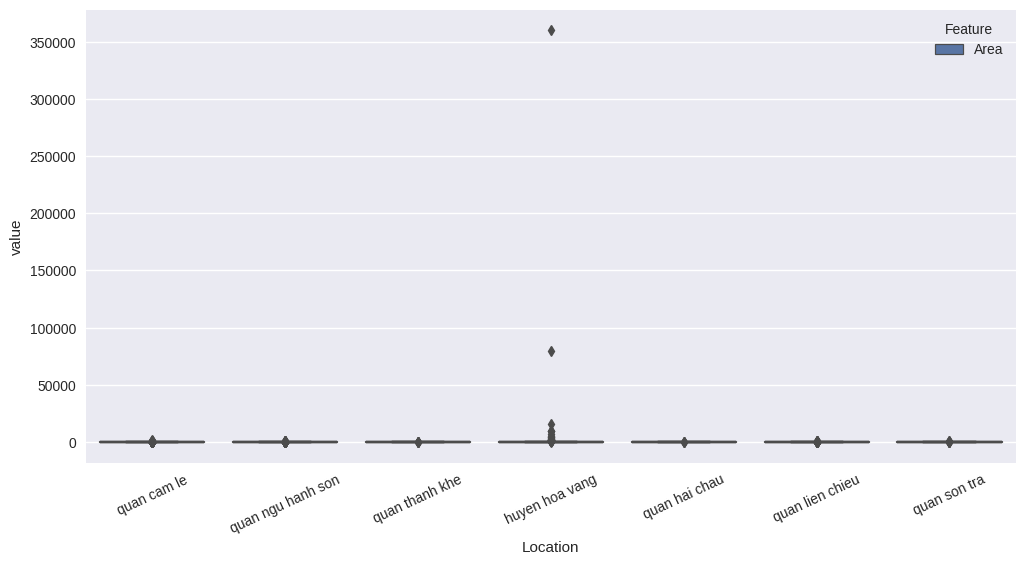

In [ ]:
plt.figure(figsize=(12, 6),dpi=100)
_data=pd.melt(df,id_vars=['Location'],value_vars=['Area'],var_name='Feature')
plt.xticks(rotation = 25)
sns.boxplot(x='Location',y='value',data=_data,hue='Feature')
plt.savefig(f"{images_dir}/boxplot_raw_area.png",bbox_inches = 'tight',pad_inches = 0)    

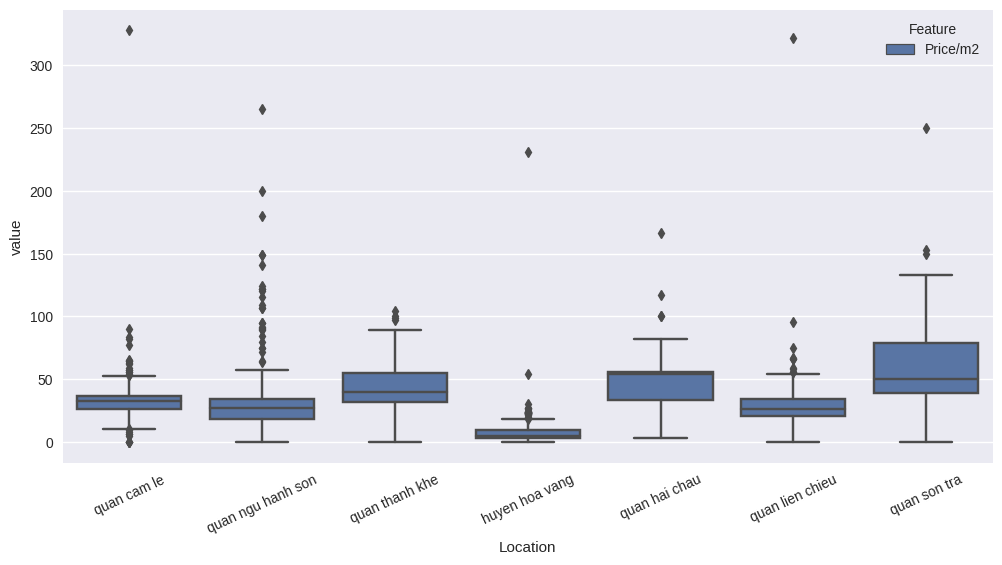

In [ ]:
plt.figure(figsize=(12, 6),dpi=100)
_data=pd.melt(df,id_vars=['Location'],value_vars=['Price/m2'],var_name='Feature')
plt.xticks(rotation = 25)
sns.boxplot(x='Location',y='value',data=_data,hue='Feature')
plt.savefig(f"{images_dir}/boxplot_raw_pricem2.png",bbox_inches = 'tight',pad_inches = 0)  

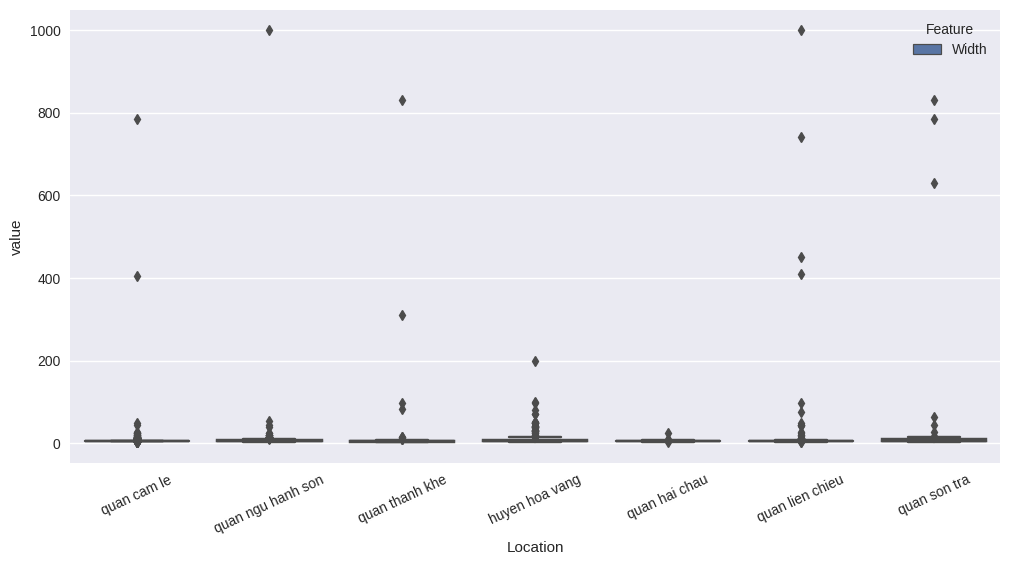

In [ ]:
plt.figure(figsize=(12, 6),dpi=100)
_data=pd.melt(df,id_vars=['Location'],value_vars=['Width'],var_name='Feature')
plt.xticks(rotation = 25)
sns.boxplot(x='Location',y='value',data=_data,hue='Feature')
plt.savefig(f"{images_dir}/boxplot_raw_width.png",bbox_inches = 'tight',pad_inches = 0)  

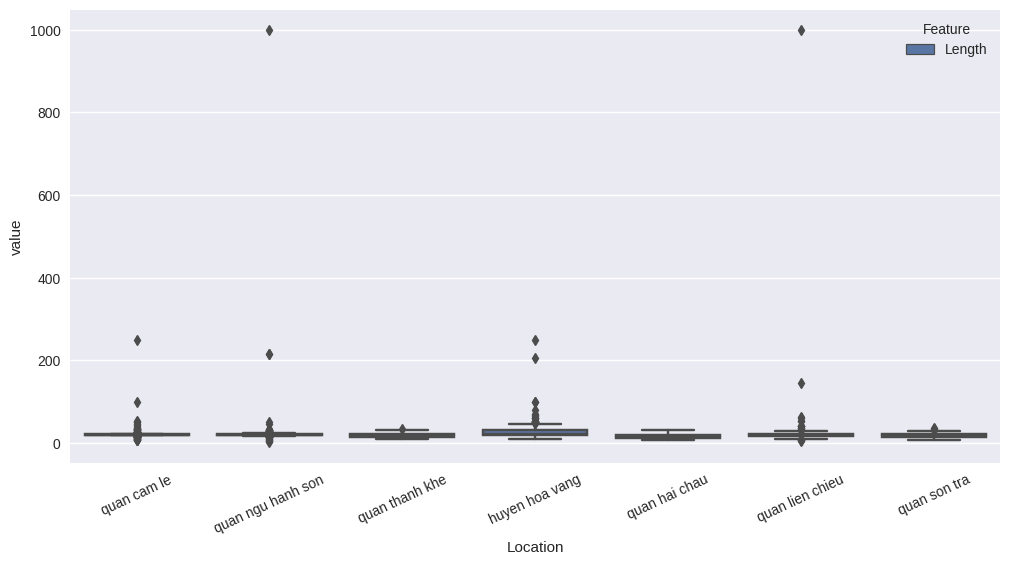

In [ ]:
plt.figure(figsize=(12, 6),dpi=100)
_data=pd.melt(df,id_vars=['Location'],value_vars=['Length'],var_name='Feature')
plt.xticks(rotation = 25)
sns.boxplot(x='Location',y='value',data=_data,hue='Feature')
plt.savefig(f"{images_dir}/boxplot_raw_length.png",bbox_inches = 'tight',pad_inches = 0)  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

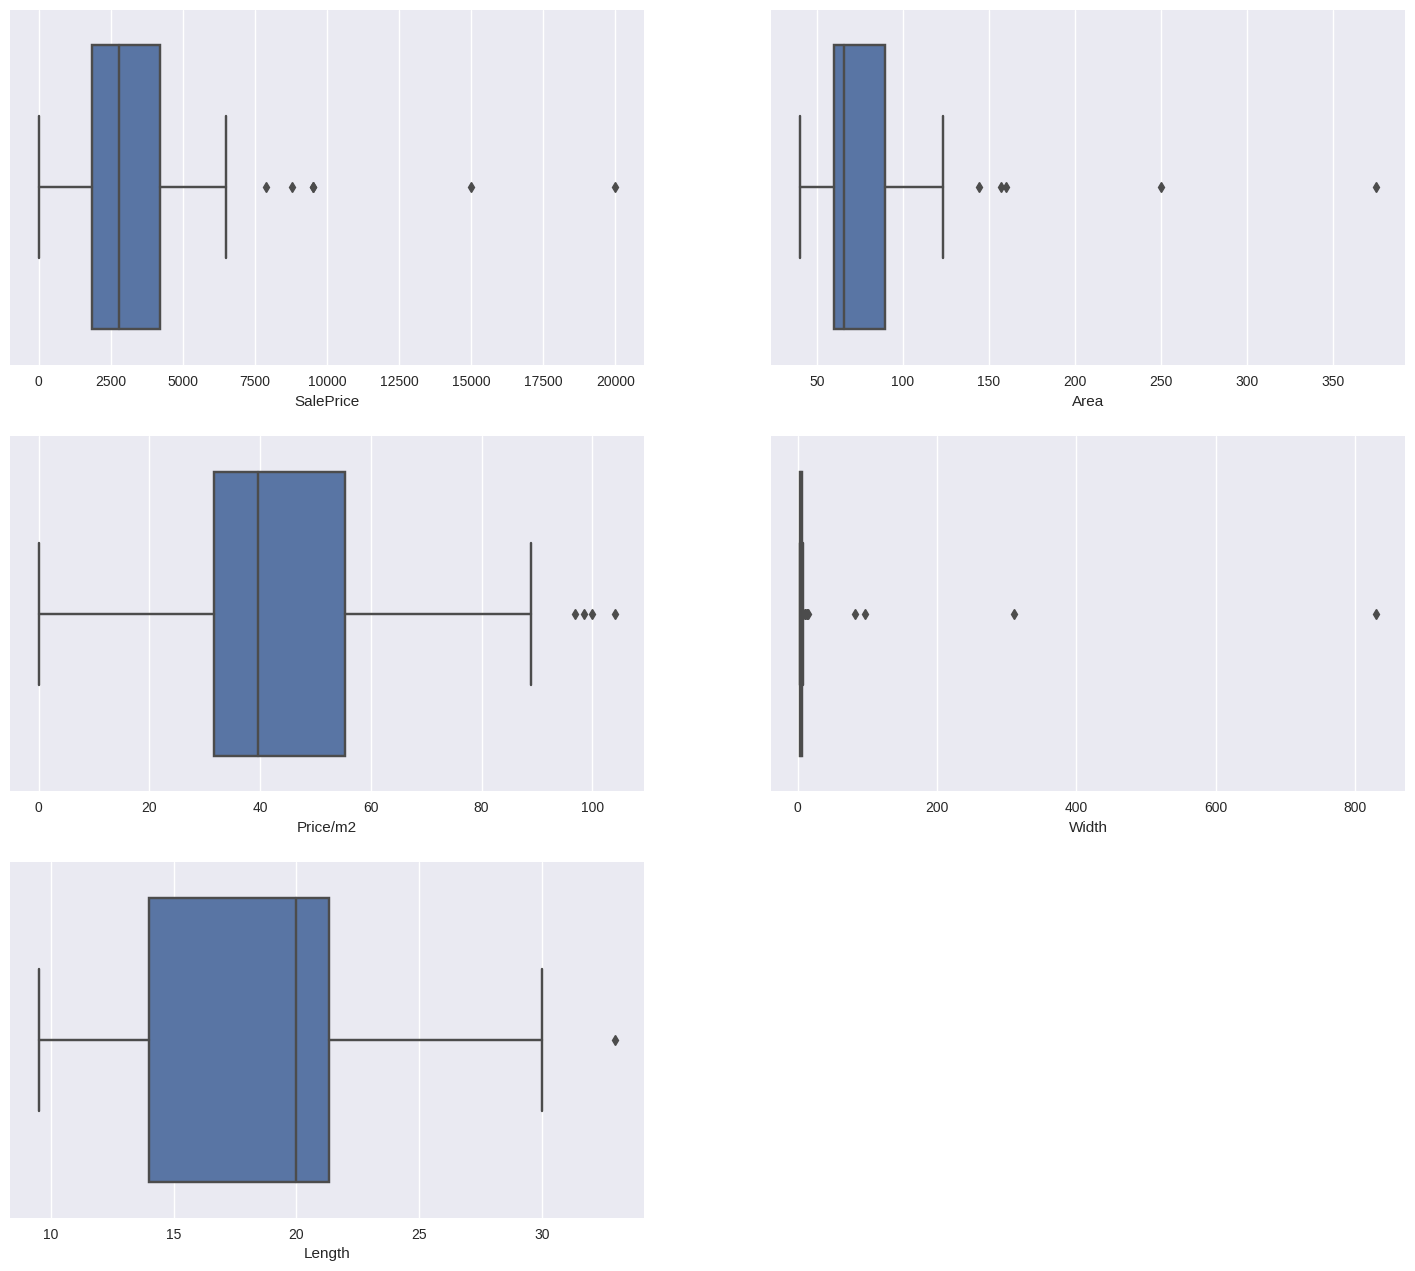

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  fig = sns.boxplot(df.loc[df['Location']=='quan thanh khe'][df.columns[i]])
  sbplt+=1
plt.savefig(f"{images_dir}/thanhkhe_raw.png",bbox_inches = 'tight',pad_inches = 0)    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

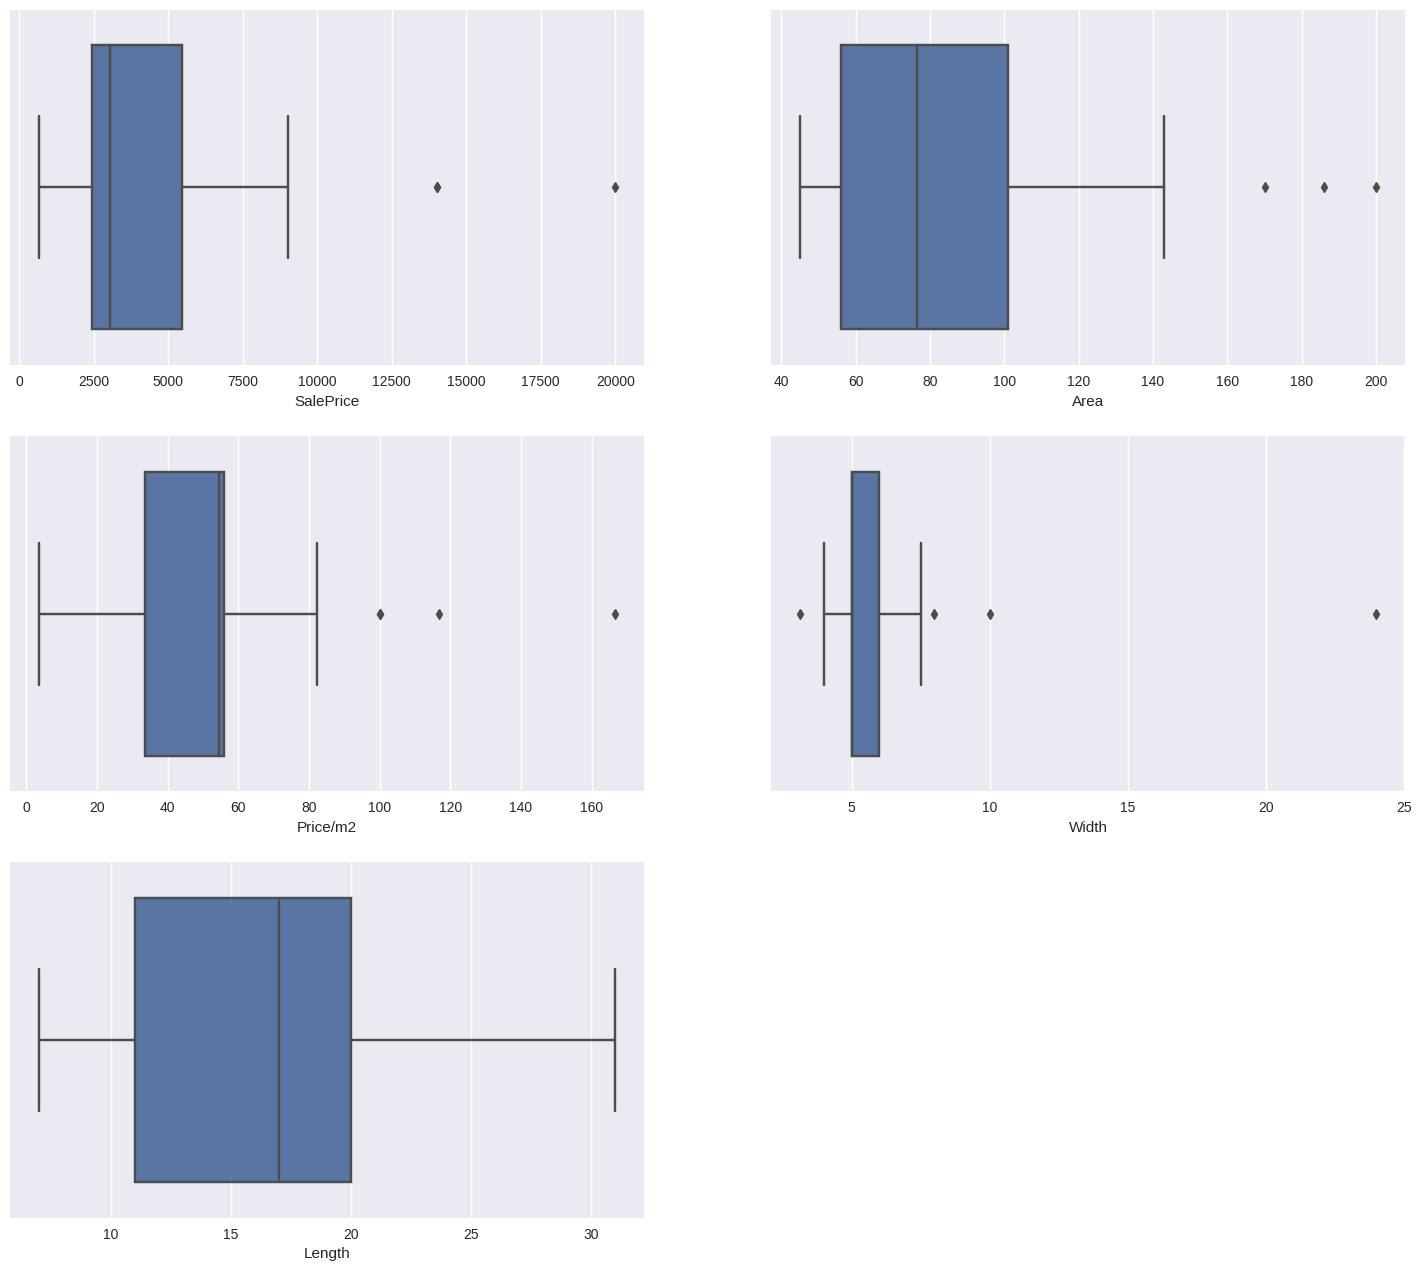

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  fig = sns.boxplot(df.loc[df['Location']=='quan hai chau'][df.columns[i]])
  # plt.grid()
  sbplt+=1
plt.savefig(f"{images_dir}/haichau_raw.png",bbox_inches = 'tight',pad_inches = 0)    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

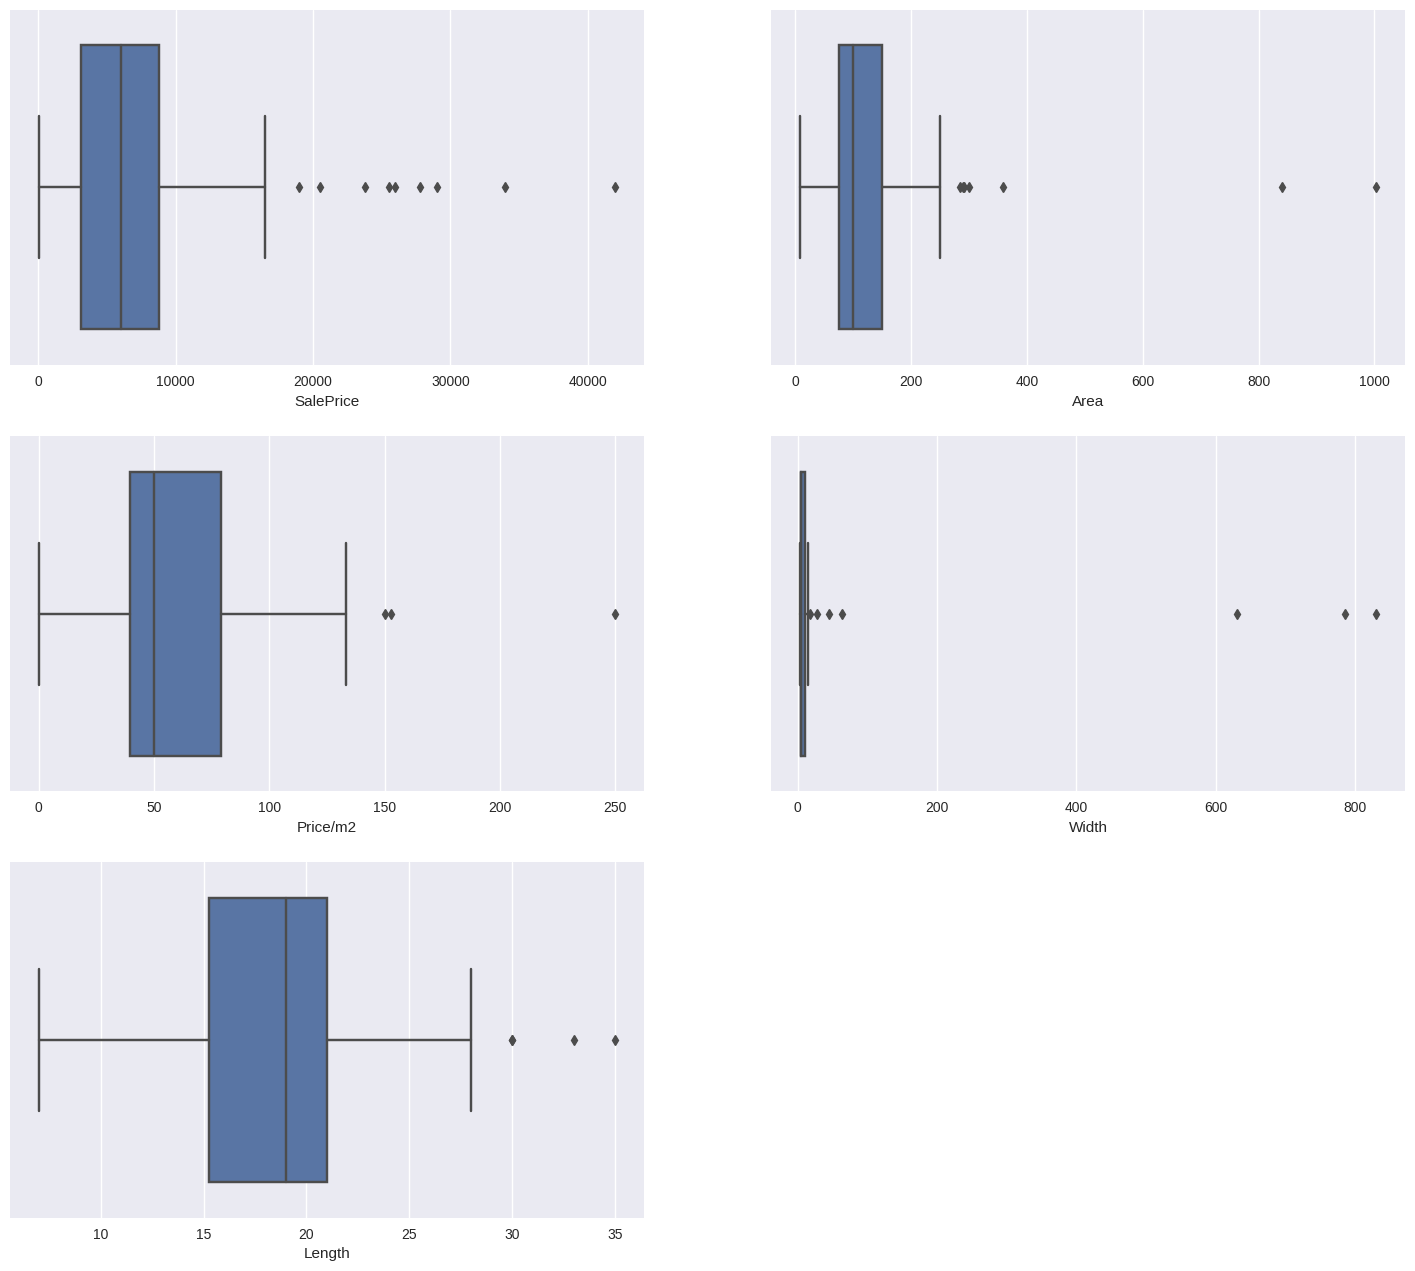

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  fig = sns.boxplot(df.loc[df['Location']=='quan son tra'][df.columns[i]])
  # plt.grid()
  sbplt+=1
plt.savefig(f"{images_dir}/sontra_raw.png",bbox_inches = 'tight',pad_inches = 0)   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

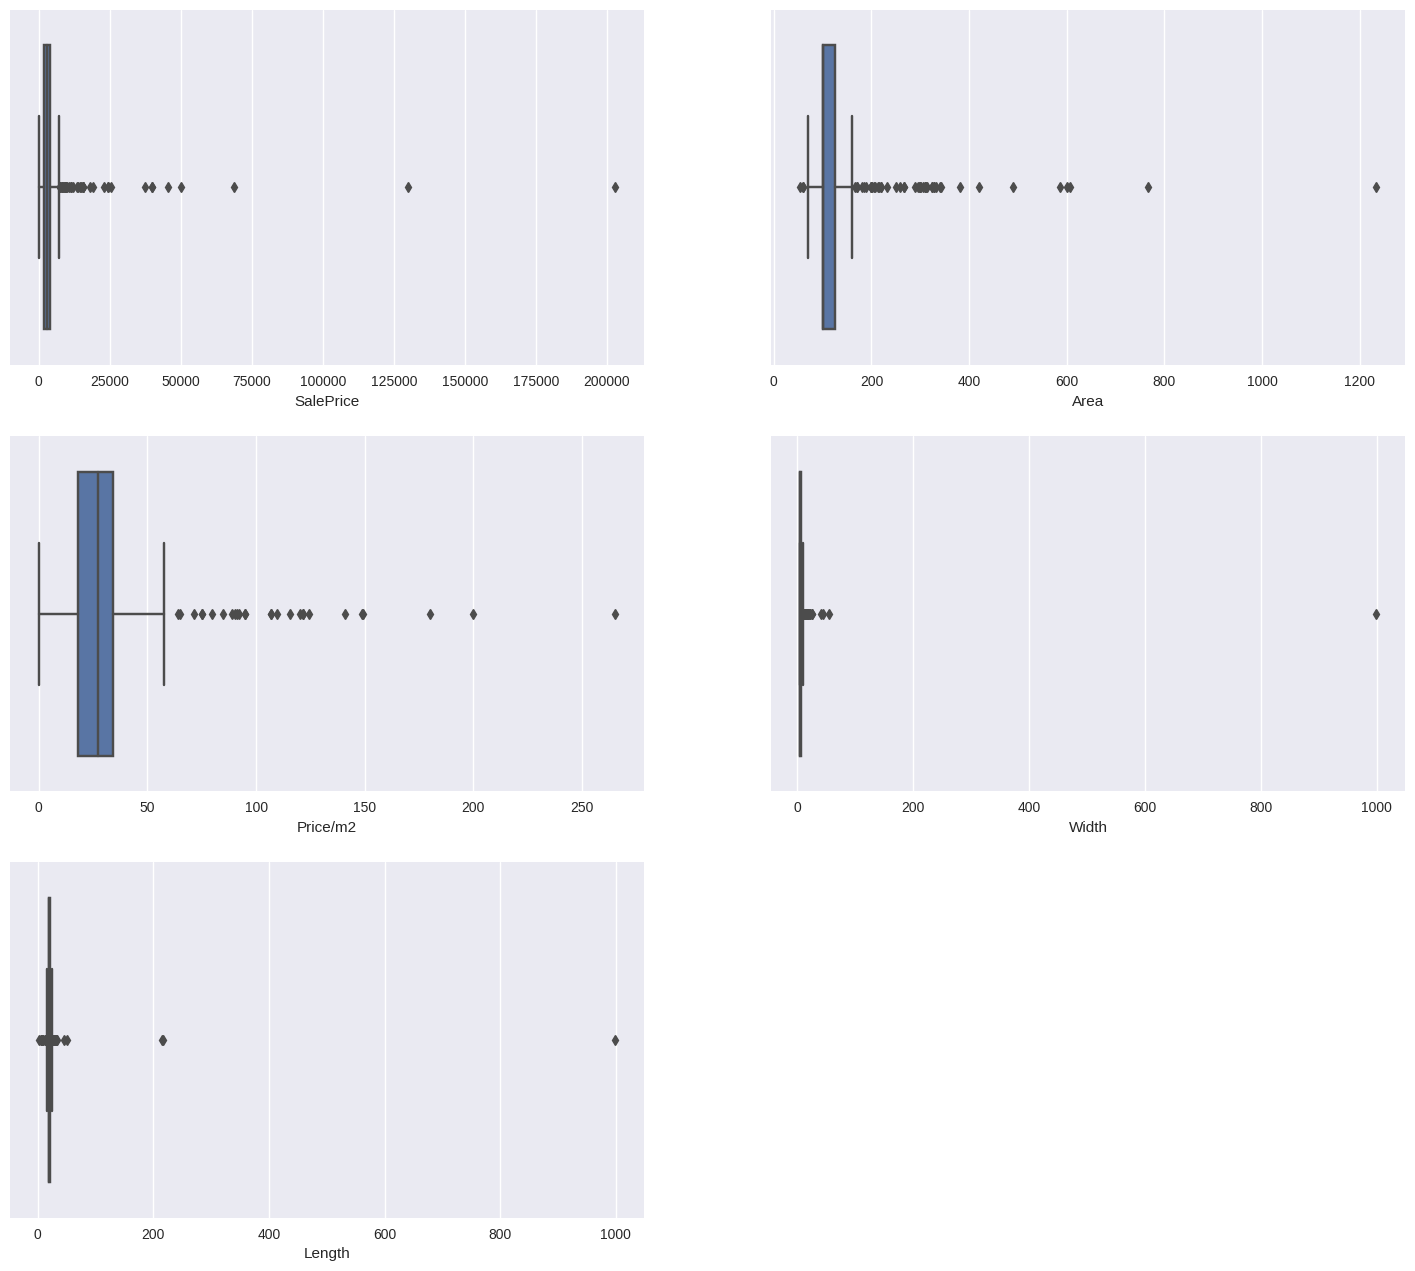

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  fig = sns.boxplot(df.loc[df['Location']=='quan ngu hanh son'][df.columns[i]])
  # plt.grid()
  sbplt+=1
plt.savefig(f"{images_dir}/nguhanhson_raw.png",bbox_inches = 'tight',pad_inches = 0)   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

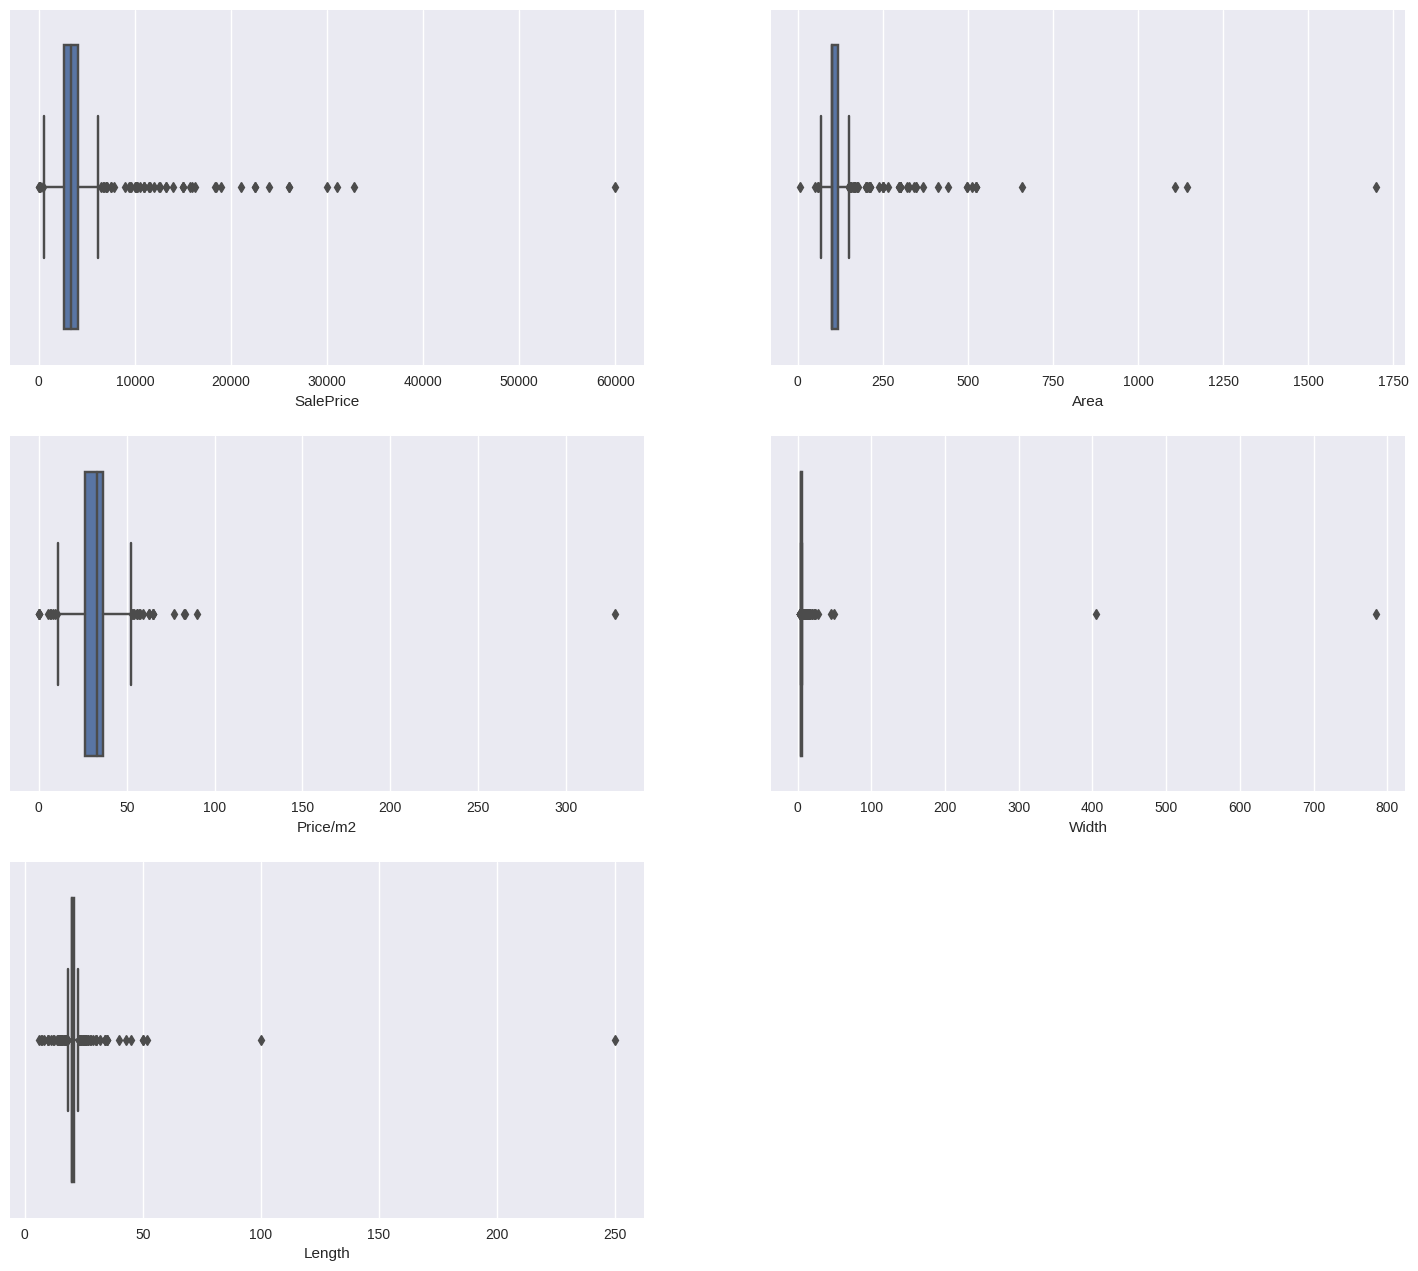

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  fig = sns.boxplot(df.loc[df['Location']=='quan cam le'][df.columns[i]])
  # plt.grid()
  sbplt+=1
plt.savefig(f"{images_dir}/camle_raw.png",bbox_inches = 'tight',pad_inches = 0)   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

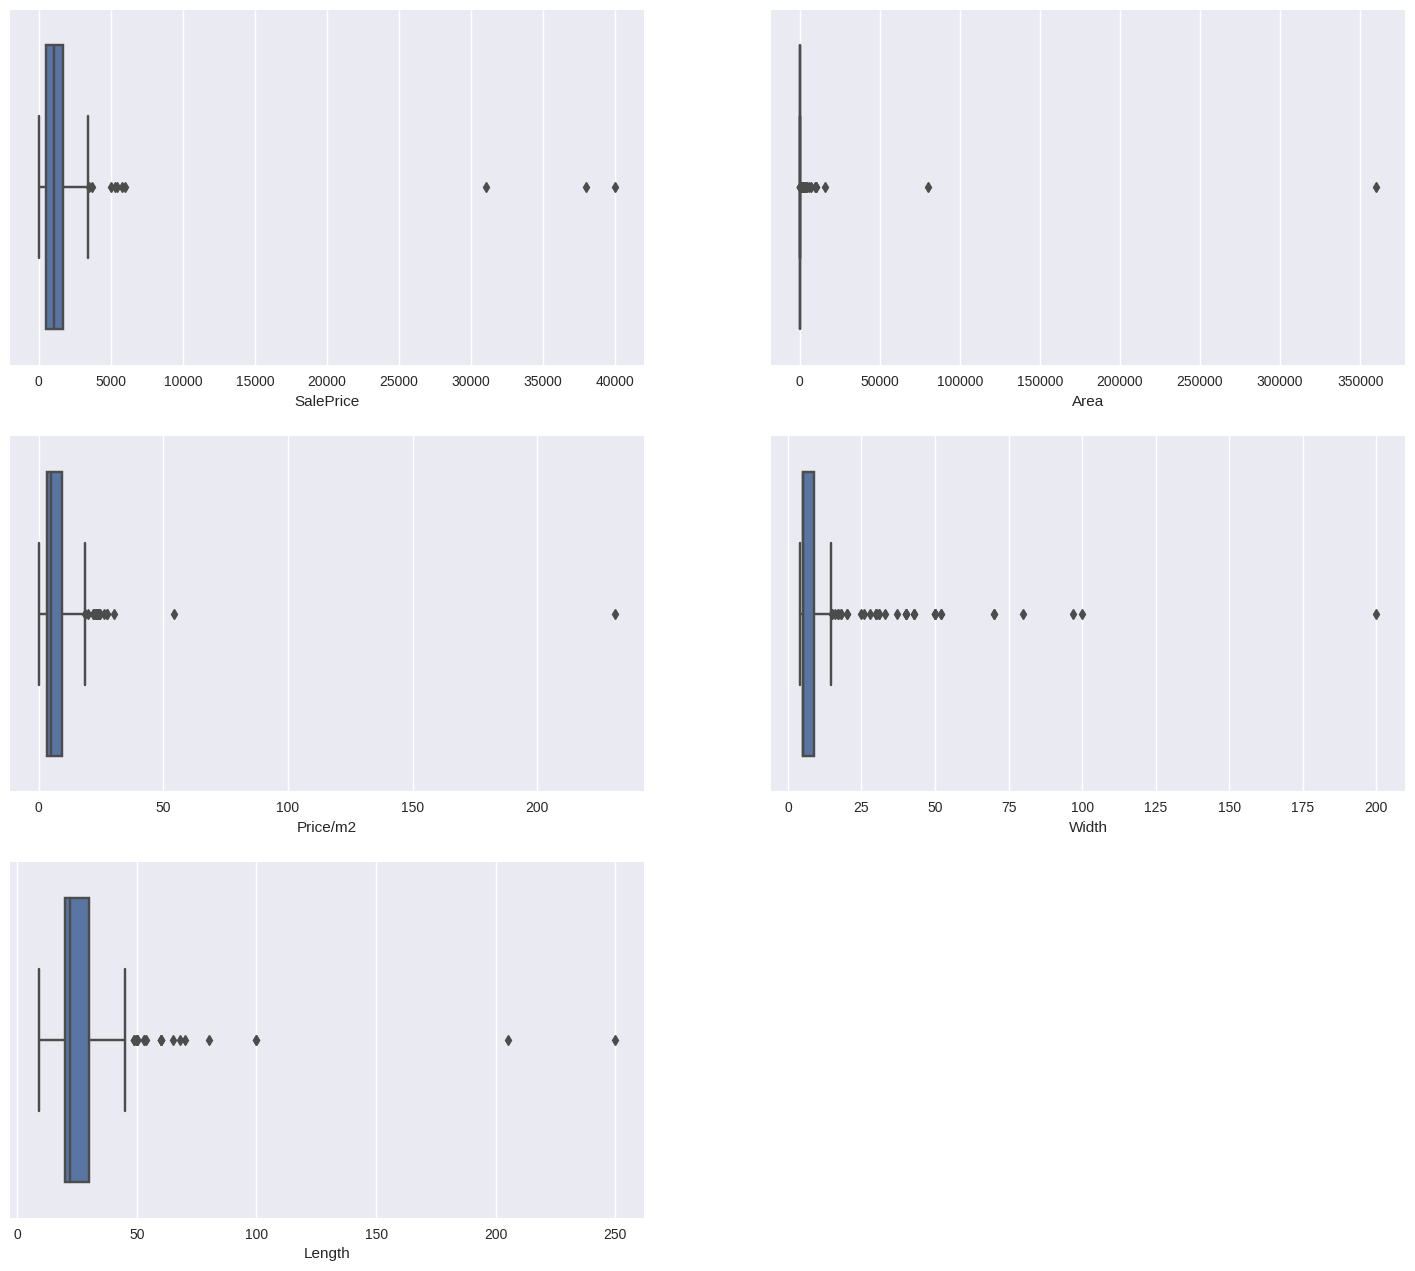

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  fig = sns.boxplot(df.loc[df['Location']=='huyen hoa vang'][df.columns[i]])
  # plt.grid()
  sbplt+=1
plt.savefig(f"{images_dir}/hoavang_raw.png",bbox_inches = 'tight',pad_inches = 0)   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

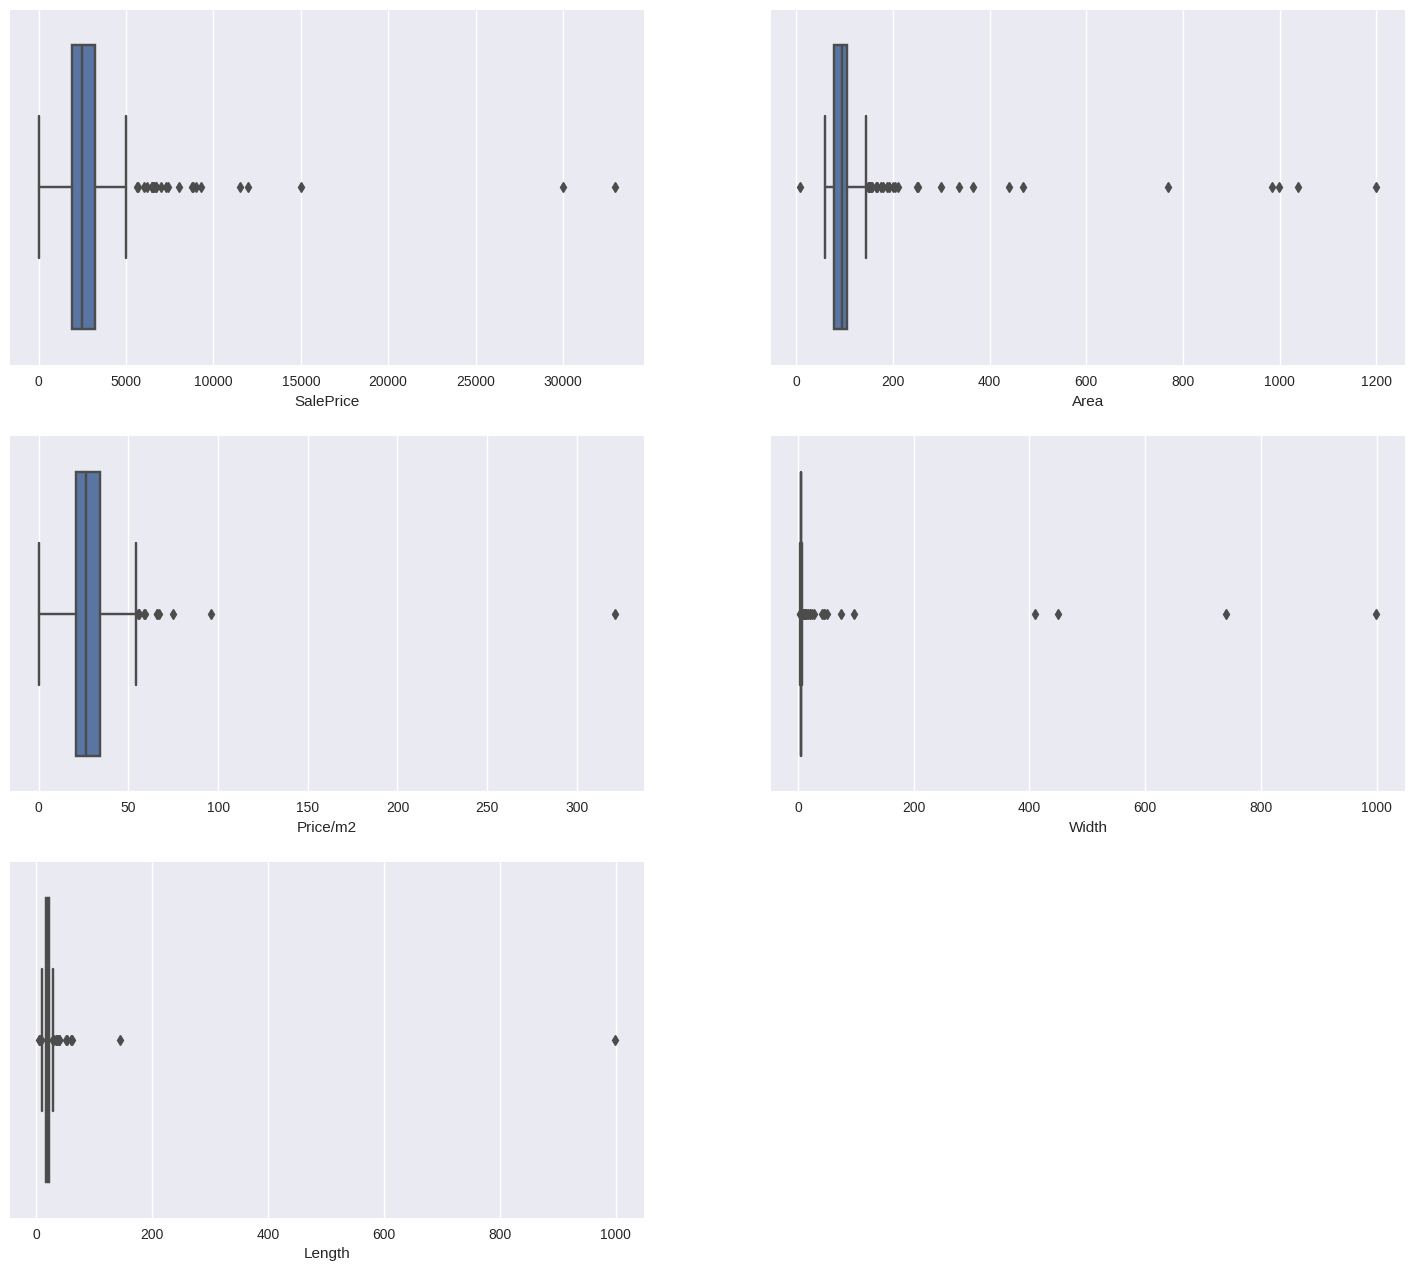

In [ ]:
plt.figure(figsize=(18, 16),dpi=100)
sbplt=321
for i in range(len(df.columns)-1):
  plt.subplot(sbplt)
  fig = sns.boxplot(df.loc[df['Location']=='quan lien chieu'][df.columns[i]])
  # plt.grid()
  sbplt+=1
plt.savefig(f"{images_dir}/lienchieu_raw.png",bbox_inches = 'tight',pad_inches = 0)   

### **Missing data**

In [ ]:
#Handling missing data at column: Width or Length
all_nan_rows=df[df.isna().any(axis=1)]
list_index_nan=[]
for g in range(0,len(gr_location)):
  district_nan=all_nan_rows.loc[df['Location'] == gr_location[g]]
  list_index_nan.append(district_nan.index)
  for i in range(0,len(district_nan)):
    width=pd.isna(district_nan['Width'].values[i])
    length=pd.isna(district_nan['Length'].values[i])
    area=district_nan['Area'].values[i]
    if width and not length :
      df.at[list_index_nan[g][i],'Width']=area/district_nan['Length'].values[i]
    if length and not width :
      df.at[list_index_nan[g][i],'Length']=area/district_nan['Width'].values[i]
df.isna().sum()

SalePrice     0
Area          0
Price/m2      0
Width        13
Length       13
Location      0
dtype: int64

In [ ]:
#Handling missing data at both columns: Width and Length using Mode Imputation
index_nan=[]
for g in range(0,len(gr_location)):
  mode=df.loc[df['Location'] == gr_location[g]]['Width'].value_counts().idxmax()
  df.loc[df.Location==gr_location[g], 'Width'] = df.loc[df.Location==gr_location[g], 'Width'].fillna(mode)
  district_nan=df[df.isna().any(axis=1)].loc[df['Location'] == gr_location[g]]
  index_nan.append(district_nan.index)
  for i in range(0,len(district_nan)):    
    df.at[index_nan[g][i],'Length']=district_nan['Area'].values[i]/district_nan['Width'].values[i]
df.isna().sum()

SalePrice    0
Area         0
Price/m2     0
Width        0
Length       0
Location     0
dtype: int64

### **Incorrect Info**

In [ ]:
#Handling incorrect unit at Length column
print(df.loc[df['Length']>=df['Area']])
d=df.loc[df['Length']>=df['Area']]
for i in range(0,len(d)):
  # digits = int(math.log10(d['Area'].values[0]))+1
  area=d['Area'].values[i]
  temp_length=d['Length'].values[i]
  for di in range(int(math.log10(d['Length'].values[0]))+1):
    if int(math.log10(d['Width'].values[i]))+1 > int(math.log10(temp_length))+1:
      df.at[d.index[i],'Width']=d['Width'].values[i]/10
    if area>temp_length and not abs(1-(temp_length*d['Width'].values[i]/area))>0.1:
    # temp_length*d['Width'].values[i]>(area/100*20+area) and temp_length >=1:
      df.at[d.index[i],'Length']=temp_length
      break
    else:
      temp_length=temp_length/10
print('--After handling--')
print(df.loc[df['Length']>=df['Area']])

      SalePrice    Area    Price/m2  Width  Length           Location
132         1.6   95.00    0.000017  450.0   145.0    quan lien chieu
301      2710.0  125.00   21.680000   50.0   250.0     huyen hoa vang
302      4300.0  100.00   43.000000   50.0   250.0        quan cam le
643       160.0    6.25   26.670000    4.0    22.0        quan cam le
764      2700.0  127.00   21.260000    6.0   216.0  quan ngu hanh son
774      6789.0  118.00   57.530000   55.0   215.0  quan ngu hanh son
912      2250.0    7.00  321.430000   97.0    14.0    quan lien chieu
1042     4150.0  100.00   41.500000    5.0   100.0        quan cam le
1203     2000.0    8.00  250.000000    4.0    20.0       quan son tra
1496     1800.0  999.00    1.800000  999.0   999.0    quan lien chieu
1497     1900.0   95.00   20.000000  999.0   999.0  quan ngu hanh son
--After handling--
      SalePrice    Area    Price/m2  Width  Length           Location
132         1.6   95.00    0.000017   45.0   145.0    quan lien chieu
3

In [ ]:
#Handling incorrect unit at Width column
print(df.loc[df['Width']>=df['Area']])
d=df.loc[df['Width']>=df['Area']]
for i in range(0,len(d)):
  digits = int(math.log10(d['Area'].values[0]))+1
  area=d['Area'].values[i]
  temp_Width=d['Width'].values[i]
  for di in range(int(math.log10(d['Width'].values[0]))+1):
    if area>temp_Width and not abs(1-(temp_Width*d['Length'].values[i]/area))>0.1:
    # temp_Width*d['Length'].values[i]>(area/100*20+area) and temp_Width >=1:
      df.at[d.index[i],'Width']=temp_Width
      break
    else:
      temp_Width=temp_Width/10
print('--After handling--')
print(df.loc[df['Width']>=df['Area']])


      SalePrice   Area  Price/m2  Width  Length           Location
136      7800.0  176.0     44.32  785.0    20.0        quan cam le
137      6500.0  150.0     43.33  785.0    20.0       quan son tra
254     15900.0  173.0     91.91  830.0    21.0       quan son tra
255      2500.0   87.0     28.74  830.0    21.0     quan thanh khe
355      2350.0   50.0     47.00   63.0     8.0       quan son tra
482      1350.0  132.0     10.23  405.0    29.0        quan cam le
781      4480.0  127.0     35.28  630.0    21.0       quan son tra
912      2250.0    7.0    321.43    9.7    14.0    quan lien chieu
914      2050.0   62.0     33.06   97.0    14.0     quan thanh khe
993      1490.0   77.0     19.35  410.0    19.0    quan lien chieu
1326     1720.0   60.0     28.67  310.0    20.0     quan thanh khe
1428    11500.0  470.0     24.47  740.0    63.0    quan lien chieu
1497     1900.0   95.0     20.00   99.9   999.0  quan ngu hanh son
--After handling--
      SalePrice   Area  Price/m2  Width  Le

In [ ]:
print(df.loc[df['SalePrice']<100])
df_min_sp=df.loc[df['SalePrice']<100]
for i in range(len(df_min_sp)):
  if df_min_sp['SalePrice'].values[i]<=10:
    df.at[df_min_sp.index[i],'SalePrice']=df_min_sp['SalePrice'].values[i]*1000
    df.at[df_min_sp.index[i],'Price/m2']=df_min_sp['SalePrice'].values[i]*1000/df_min_sp['Area'].values[i]
  else:
    df.at[df_min_sp.index[i],'SalePrice']=df_min_sp['SalePrice'].values[i]*100
    df.at[df_min_sp.index[i],'Price/m2']=df_min_sp['SalePrice'].values[i]*100/df_min_sp['Area'].values[i]
print('------')
print(df.loc[df['SalePrice']<100])

      SalePrice    Area  Price/m2  Width  Length           Location
132        1.60    95.0  0.000017   45.0   145.0    quan lien chieu
150        1.87   100.0  0.000019    5.0    20.0     huyen hoa vang
230       17.30   105.0  0.000165    5.0    21.0  quan ngu hanh son
242       25.00   606.0  0.000041   19.0    31.0  quan ngu hanh son
338        2.05   185.0  0.000011    6.0    31.0     huyen hoa vang
386       27.00   300.0  0.000090   15.0    20.0  quan ngu hanh son
415        1.00   125.0  0.000008    5.0    25.0     huyen hoa vang
453        1.50    60.0  0.000025    3.0    20.0    quan lien chieu
488        3.20   105.0  0.000030    5.0    21.0  quan ngu hanh son
497       32.00   340.0  0.000094   14.0    24.0  quan ngu hanh son
506        2.00   100.0  0.000020    6.0    18.0    quan lien chieu
593       17.30   105.0  0.000165    5.0    21.0  quan ngu hanh son
608       86.00   170.0  0.000506    5.0    34.0        quan cam le
614        6.50   100.0  0.000065    4.0    25.0

In [ ]:
print(df.loc[df['Price/m2']<0.5])
df_min_pm=df.loc[df['Price/m2']<0.5]
for i in range(len(df_min_pm)):
  sale_area=df_min_pm['SalePrice'].values[i]/df_min_pm['Area'].values[i]
  if (sale_area<0.5):
    continue
  else:
    df.at[df_min_pm.index[i],'Price/m2']=sale_area
print(df.loc[df['Price/m2']<0.5])

      SalePrice      Area  Price/m2  Width  Length           Location
10        880.0     920.0  0.000957   30.0    33.0     huyen hoa vang
14       1600.0    9500.0  0.000168   70.0   100.0     huyen hoa vang
114       920.0    1060.0  0.000868   25.0    50.0     huyen hoa vang
187     40000.0   80000.0  0.000500    5.0    20.0     huyen hoa vang
262    203000.0     100.0  0.000002    5.0    20.0  quan ngu hanh son
316       300.0    5645.0  0.000053   70.0    80.0     huyen hoa vang
319       500.0     130.0  0.000004    5.5    23.0     huyen hoa vang
327       600.0    2400.0  0.000250   40.0    60.0     huyen hoa vang
339       800.0    1200.0  0.000667   50.0    21.0     huyen hoa vang
397       105.0     375.0  0.000280   15.0    25.0     quan thanh khe
649       860.0     114.0  0.000008    4.8    23.8     huyen hoa vang
669       900.0   10000.0  0.000090  100.0   100.0     huyen hoa vang
805       370.0     858.0  0.000431    4.0    15.0     huyen hoa vang
825      1050.0    2

### **Outliers**

In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

# for g in range(0,len(gr_location)):
#   for i in range(0,len(df.columns)-1):
#     print(gr_location[g],'-',df.columns[i])
#     print(outliers(df.loc[df['Location']==gr_location[g]][df.columns[i]]))

In [ ]:
#Interquartile Range Method
from numpy import percentile
df_outliers=df.copy()
df_outliers=df_outliers.drop(['Location'],axis=1)
df_outliers_list=df_outliers.columns.values.tolist()
outliers=[]
for g in range(0,len(gr_location)):
  for i in range(0,len(df_outliers_list)):
    data=df.loc[df['Location']==gr_location[g]][df_outliers_list[i]]
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    if i==3 or i==4:
      cut_off=iqr*6
    else:
      cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    for x in range(0,len(data)):
      if (data.values[x] < lower or data.values[x] > upper):
        outliers.append(data.index[x])
df_after_drop=df.drop(outliers)
df_after_drop.describe()
# len(outliers)

SalePrice         Area     Price/m2        Width       Length
count   1203.000000  1203.000000  1203.000000  1203.000000  1203.000000
mean    2833.224131   106.321779    28.651704     5.449094    20.240343
std     1843.711086    40.171257    16.650696     1.569333     4.752356
min      123.460000    40.000000     1.230000     3.000000     7.000000
25%     1725.000000    90.000000    18.430000     5.000000    18.000000
50%     2600.000000   100.000000    28.330000     5.000000    20.000000
75%     3450.000000   110.000000    35.285000     5.000000    21.000000
max    16500.000000   403.000000   121.210000    20.000000    53.000000

In [ ]:
df_after_drop.loc[df['Width']>10]

SalePrice   Area  Price/m2  Width  Length           Location
90        750.0  403.0      1.86   15.0   25.00     huyen hoa vang
177      1300.0  350.0      3.71   17.0   22.00     huyen hoa vang
475      1800.0  210.0      8.57   13.0   16.00     huyen hoa vang
476      2000.0   60.0     33.33   13.0   16.00       quan son tra
598      9000.0  180.0     50.00   18.0   10.00       quan son tra
664      2150.0  100.0     21.50   13.5   24.40  quan ngu hanh son
665      1400.0  103.0     13.59   13.5   24.40  quan ngu hanh son
748       450.0  250.0      1.80   15.0   17.00       quan son tra
986      1060.0  131.0      8.09   14.0    9.00     huyen hoa vang
1062     1200.0  262.0      4.58   10.6   24.70     huyen hoa vang
1144     2000.0   66.0     30.30   11.0   11.00     quan thanh khe
1234      980.0  231.0      4.24   14.0   17.85     huyen hoa vang
1246     2150.0   55.0     39.09   13.0   30.00     quan thanh khe
1317     4000.0  250.0     16.00   12.0   18.00       quan son tra
1371      500.0  100.0      5.00   20.0   53.00     huyen hoa vang
1381     2950.0   80.0     36.88   12.0   28.00    quan lien chieu
1460    10000.0  250.0     40.00   12.0   20.00       quan son tra
1472      520.0  300.0      1.73   15.0   20.00     huyen hoa vang
1511     1200.0  300.0      4.00   11.0   28.00     huyen hoa vang

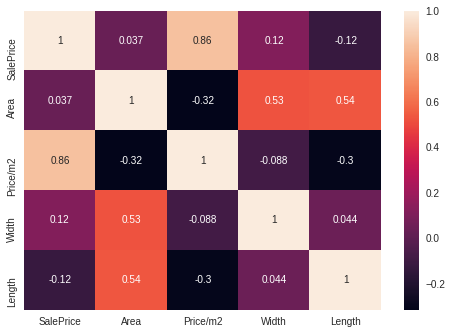

In [ ]:
corr_matrix = df_after_drop.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### **Plot after cleaning**

In [ ]:
print(df_after_drop.std())
print(df_copy.std())
print(df_copy.std()-df_after_drop.std())

SalePrice    1843.711086
Area           40.171257
Price/m2       16.650696
Width           1.569333
Length          4.752356
dtype: float64
SalePrice    8003.291657
Area         9354.421559
Price/m2       26.809021
Width          63.169243
Length         38.075672
dtype: float64
SalePrice    6159.580571
Area         9314.250302
Price/m2       10.158325
Width          61.599910
Length         33.323317
dtype: float64


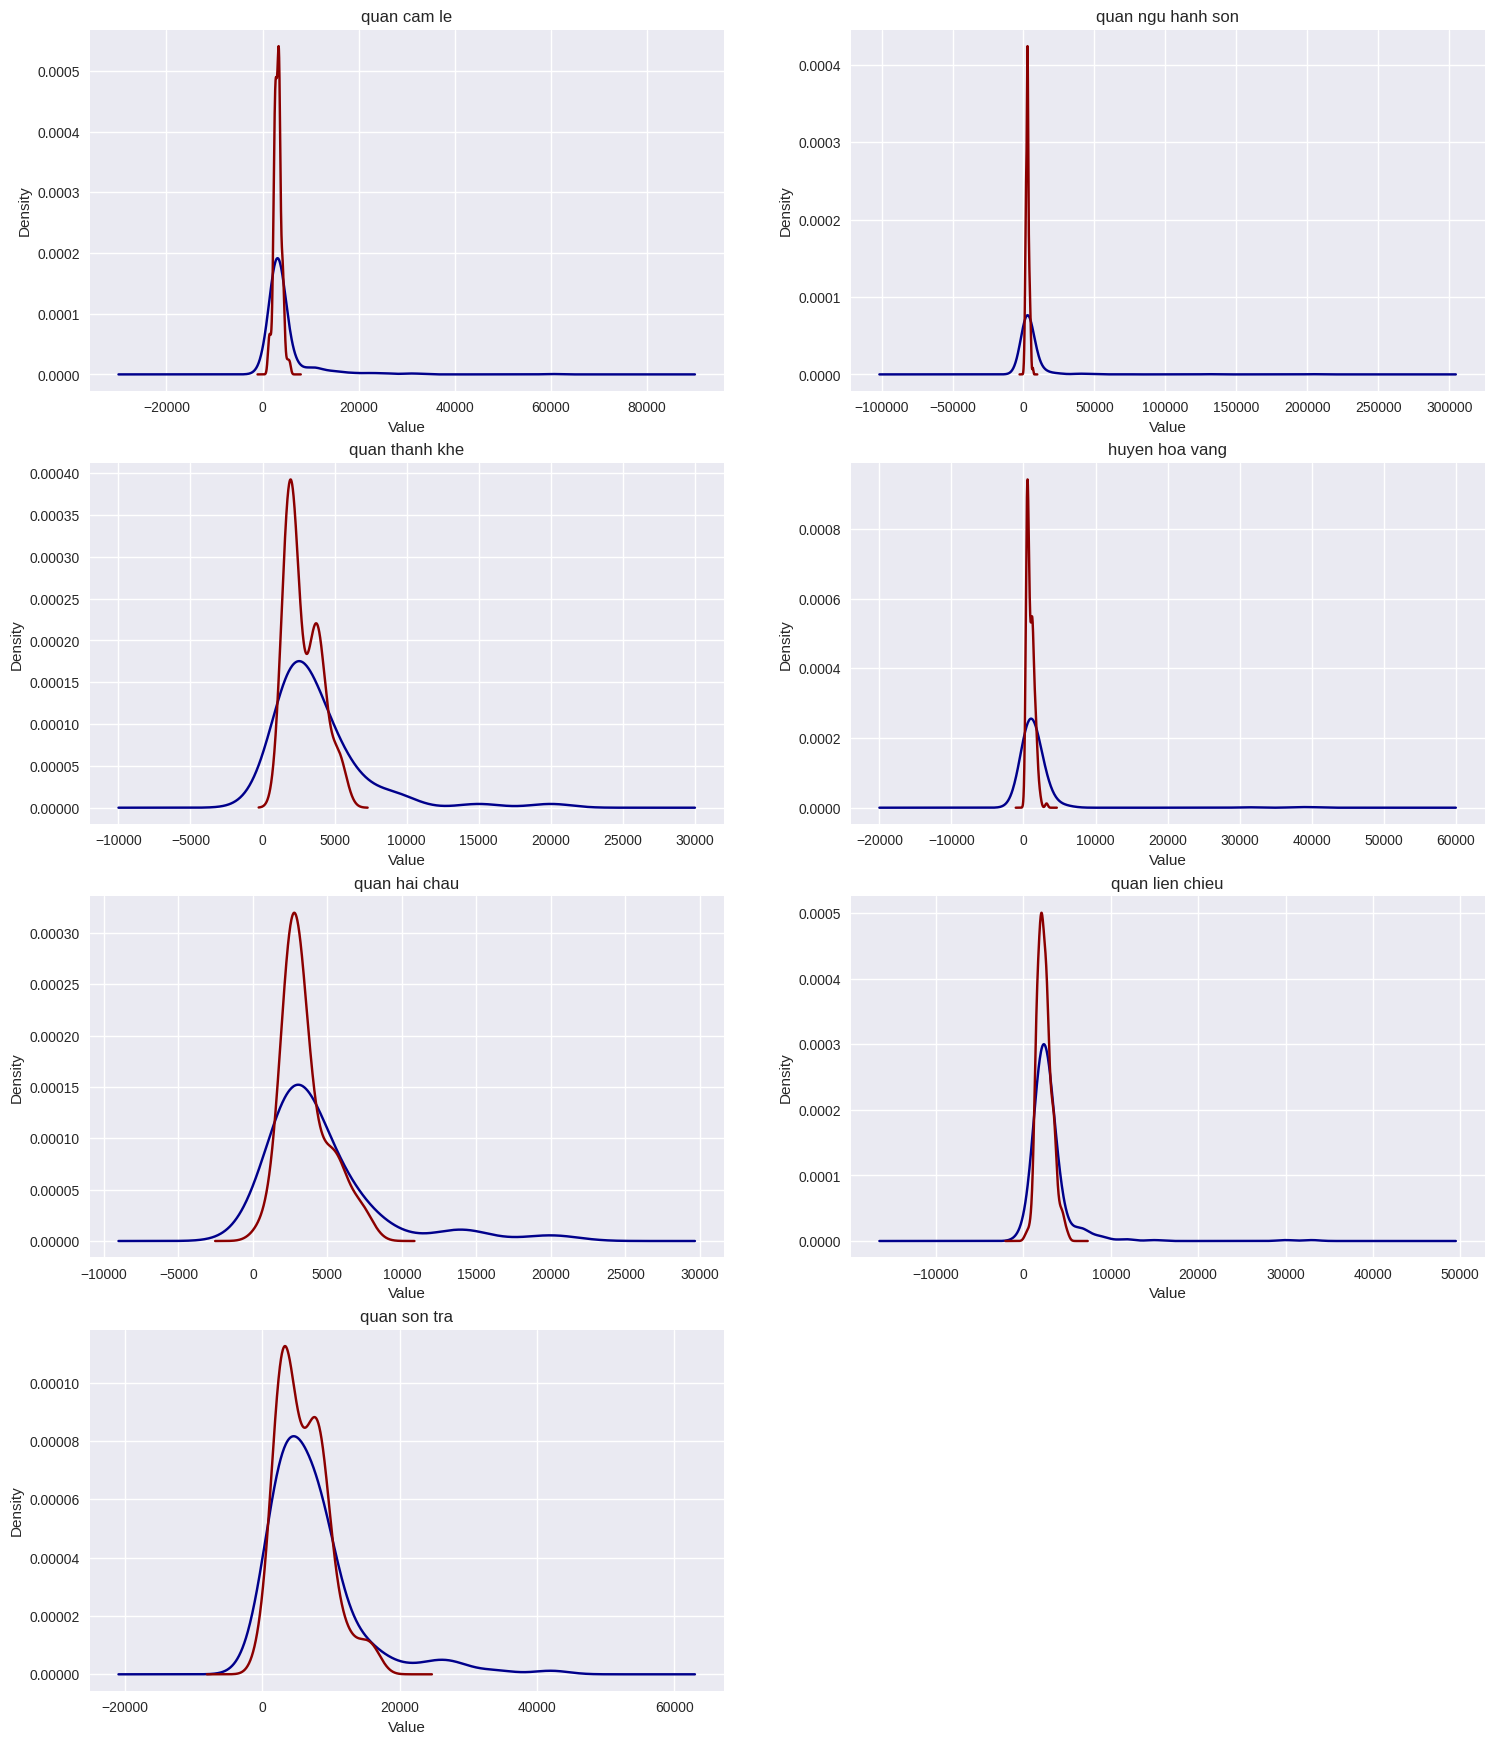

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  df_copy.loc[df_copy['Location'] ==gr_location[i]]['SalePrice'].plot(kind='kde',color='darkblue')
  df_after_drop.loc[df_after_drop['Location'] ==gr_location[i]]['SalePrice'].plot(kind='kde',color='darkred')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title(gr_location[i])
  sbplt+=1
plt.savefig(f"{images_dir}/saleprice_cleaned.png",bbox_inches = 'tight',pad_inches = 0)    

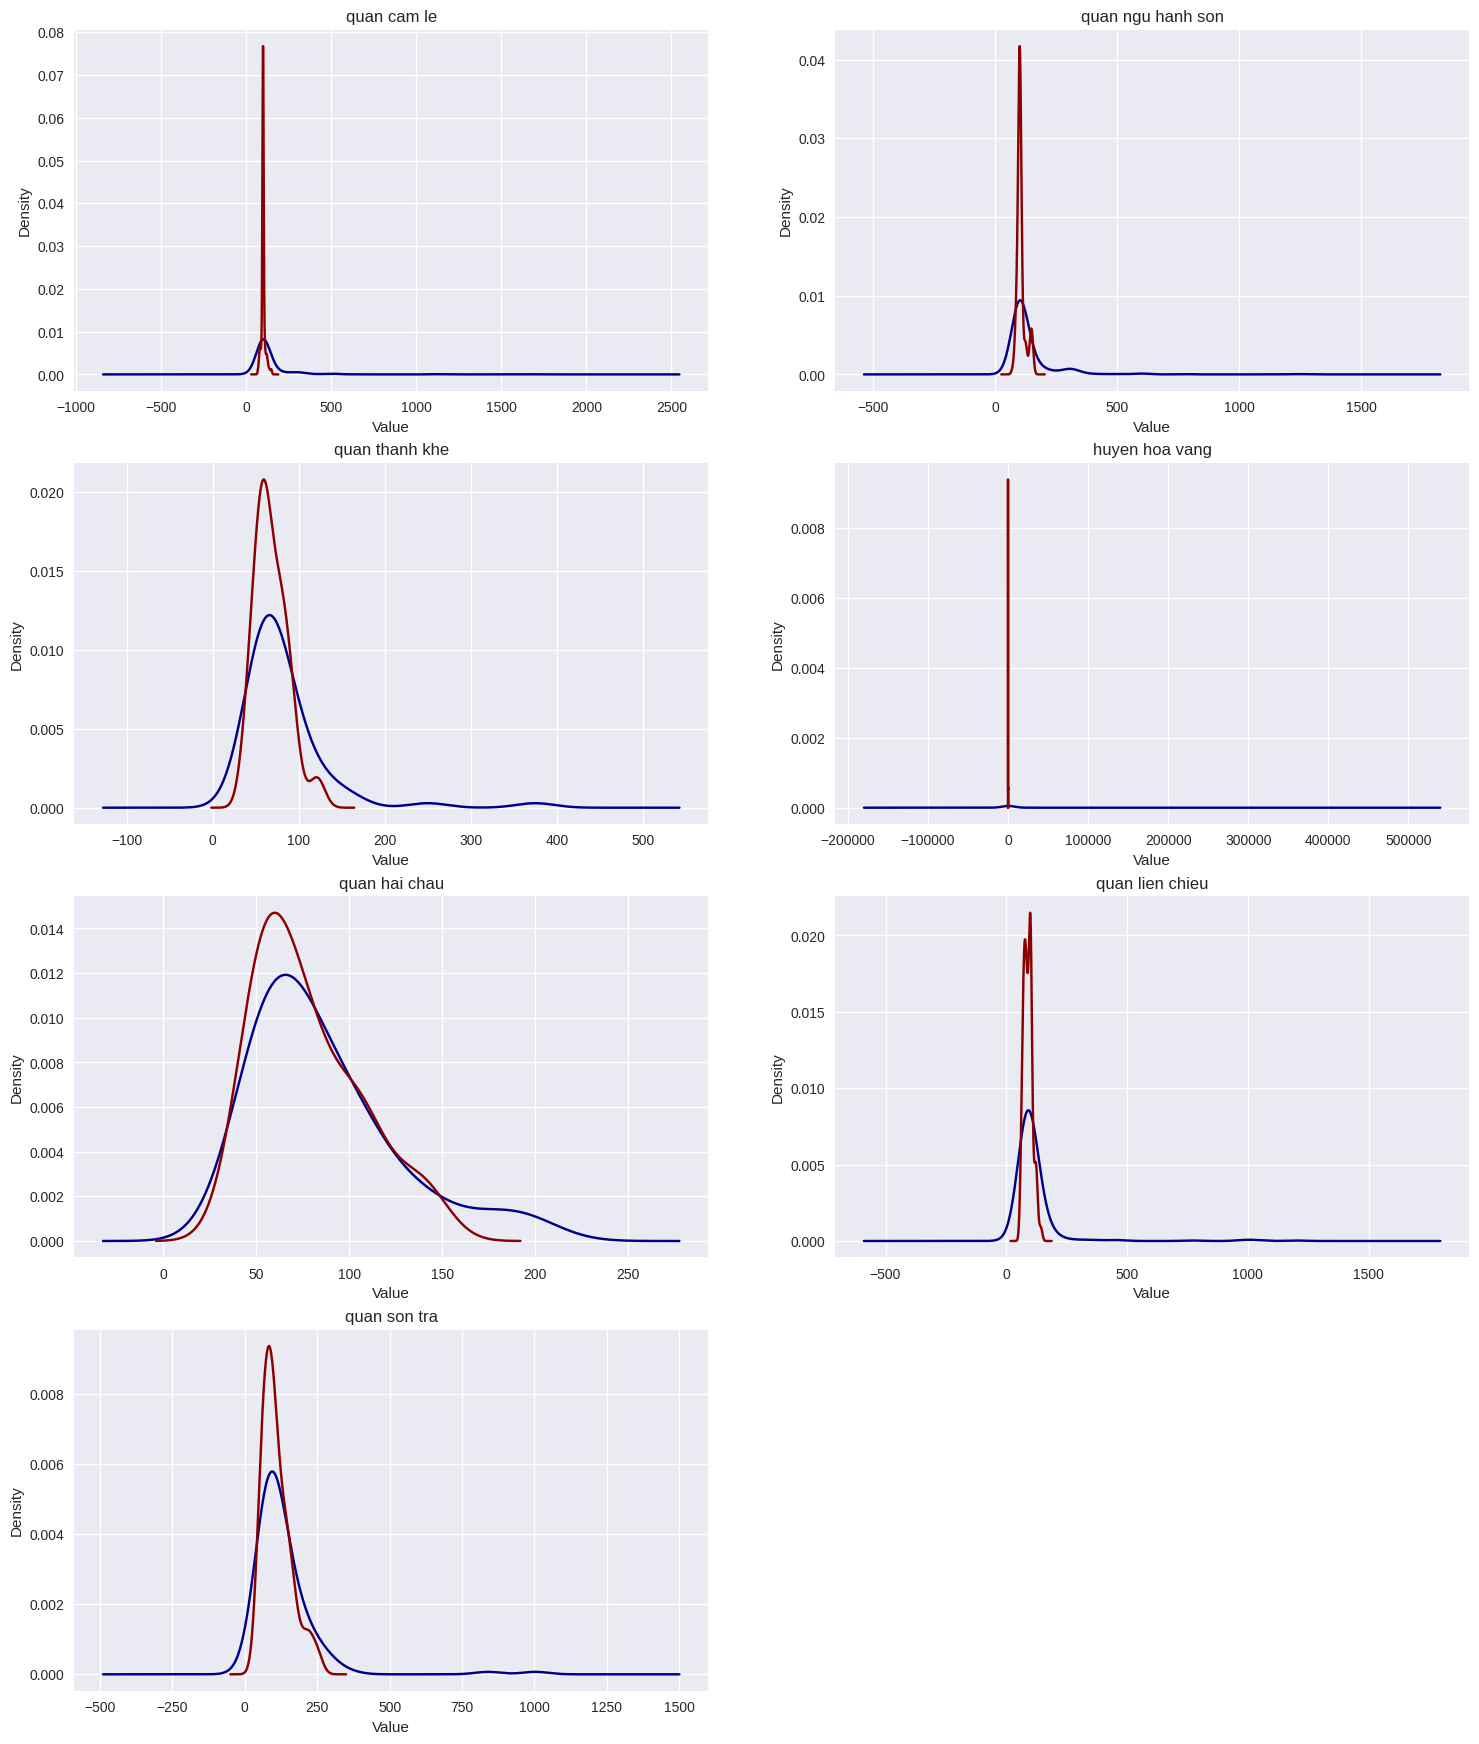

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  df_copy.loc[df_copy['Location'] ==gr_location[i]]['Area'].plot(kind='kde',color='darkblue')
  df_after_drop.loc[df_after_drop['Location'] ==gr_location[i]]['Area'].plot(kind='kde',color='darkred')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title(gr_location[i])
  sbplt+=1
plt.savefig(f"{images_dir}/area_cleaned.png",bbox_inches = 'tight',pad_inches = 0)    

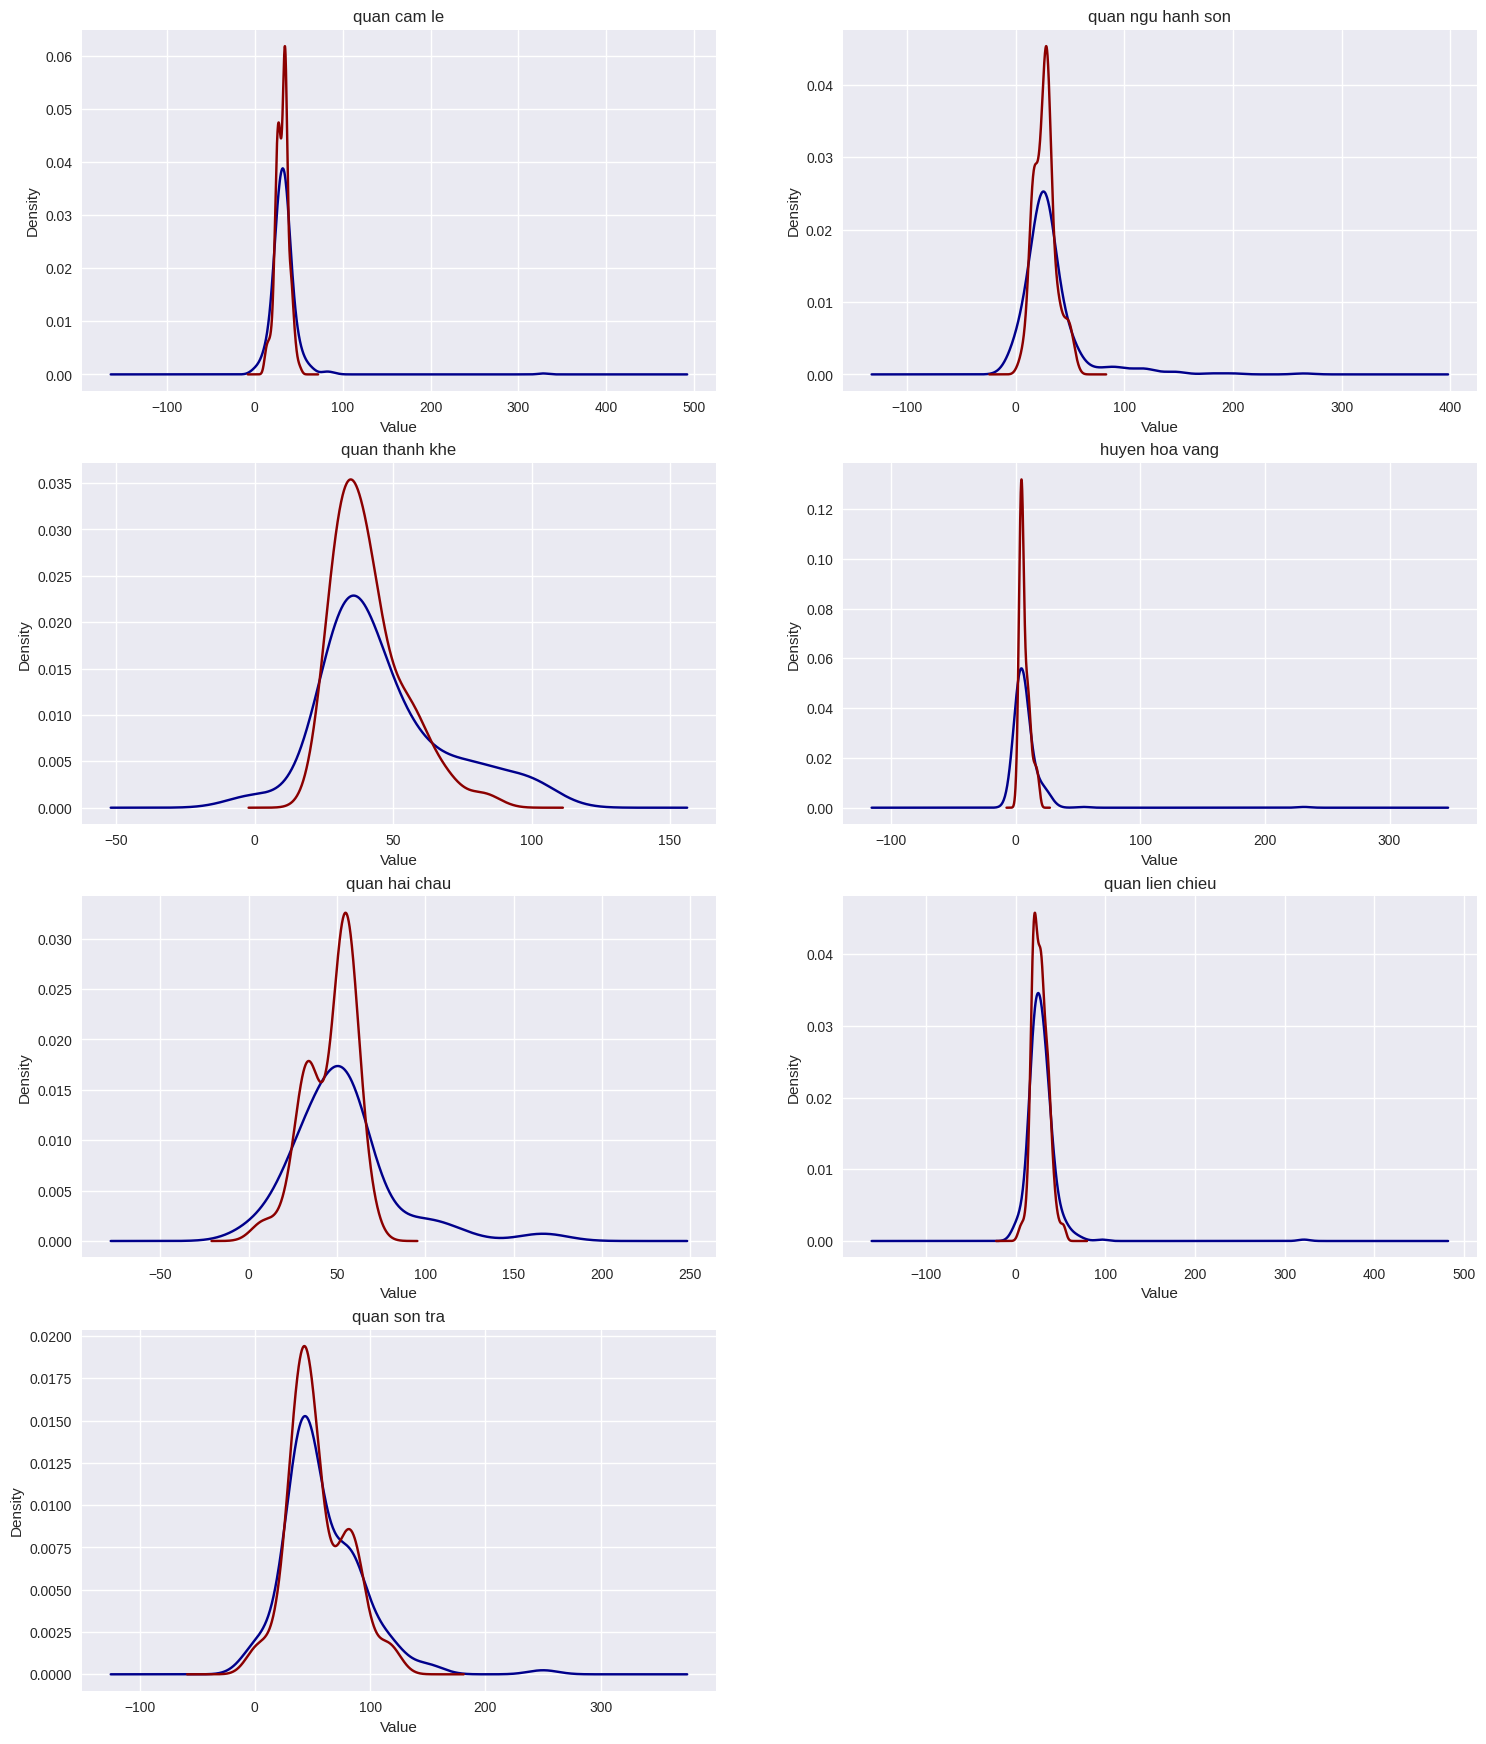

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  df_copy.loc[df_copy['Location'] ==gr_location[i]]['Price/m2'].plot(kind='kde',color='darkblue')
  df_after_drop.loc[df_after_drop['Location'] ==gr_location[i]]['Price/m2'].plot(kind='kde',color='darkred')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title(gr_location[i])
  sbplt+=1
plt.savefig(f"{images_dir}/pricem2_cleaned.png",bbox_inches = 'tight',pad_inches = 0)    

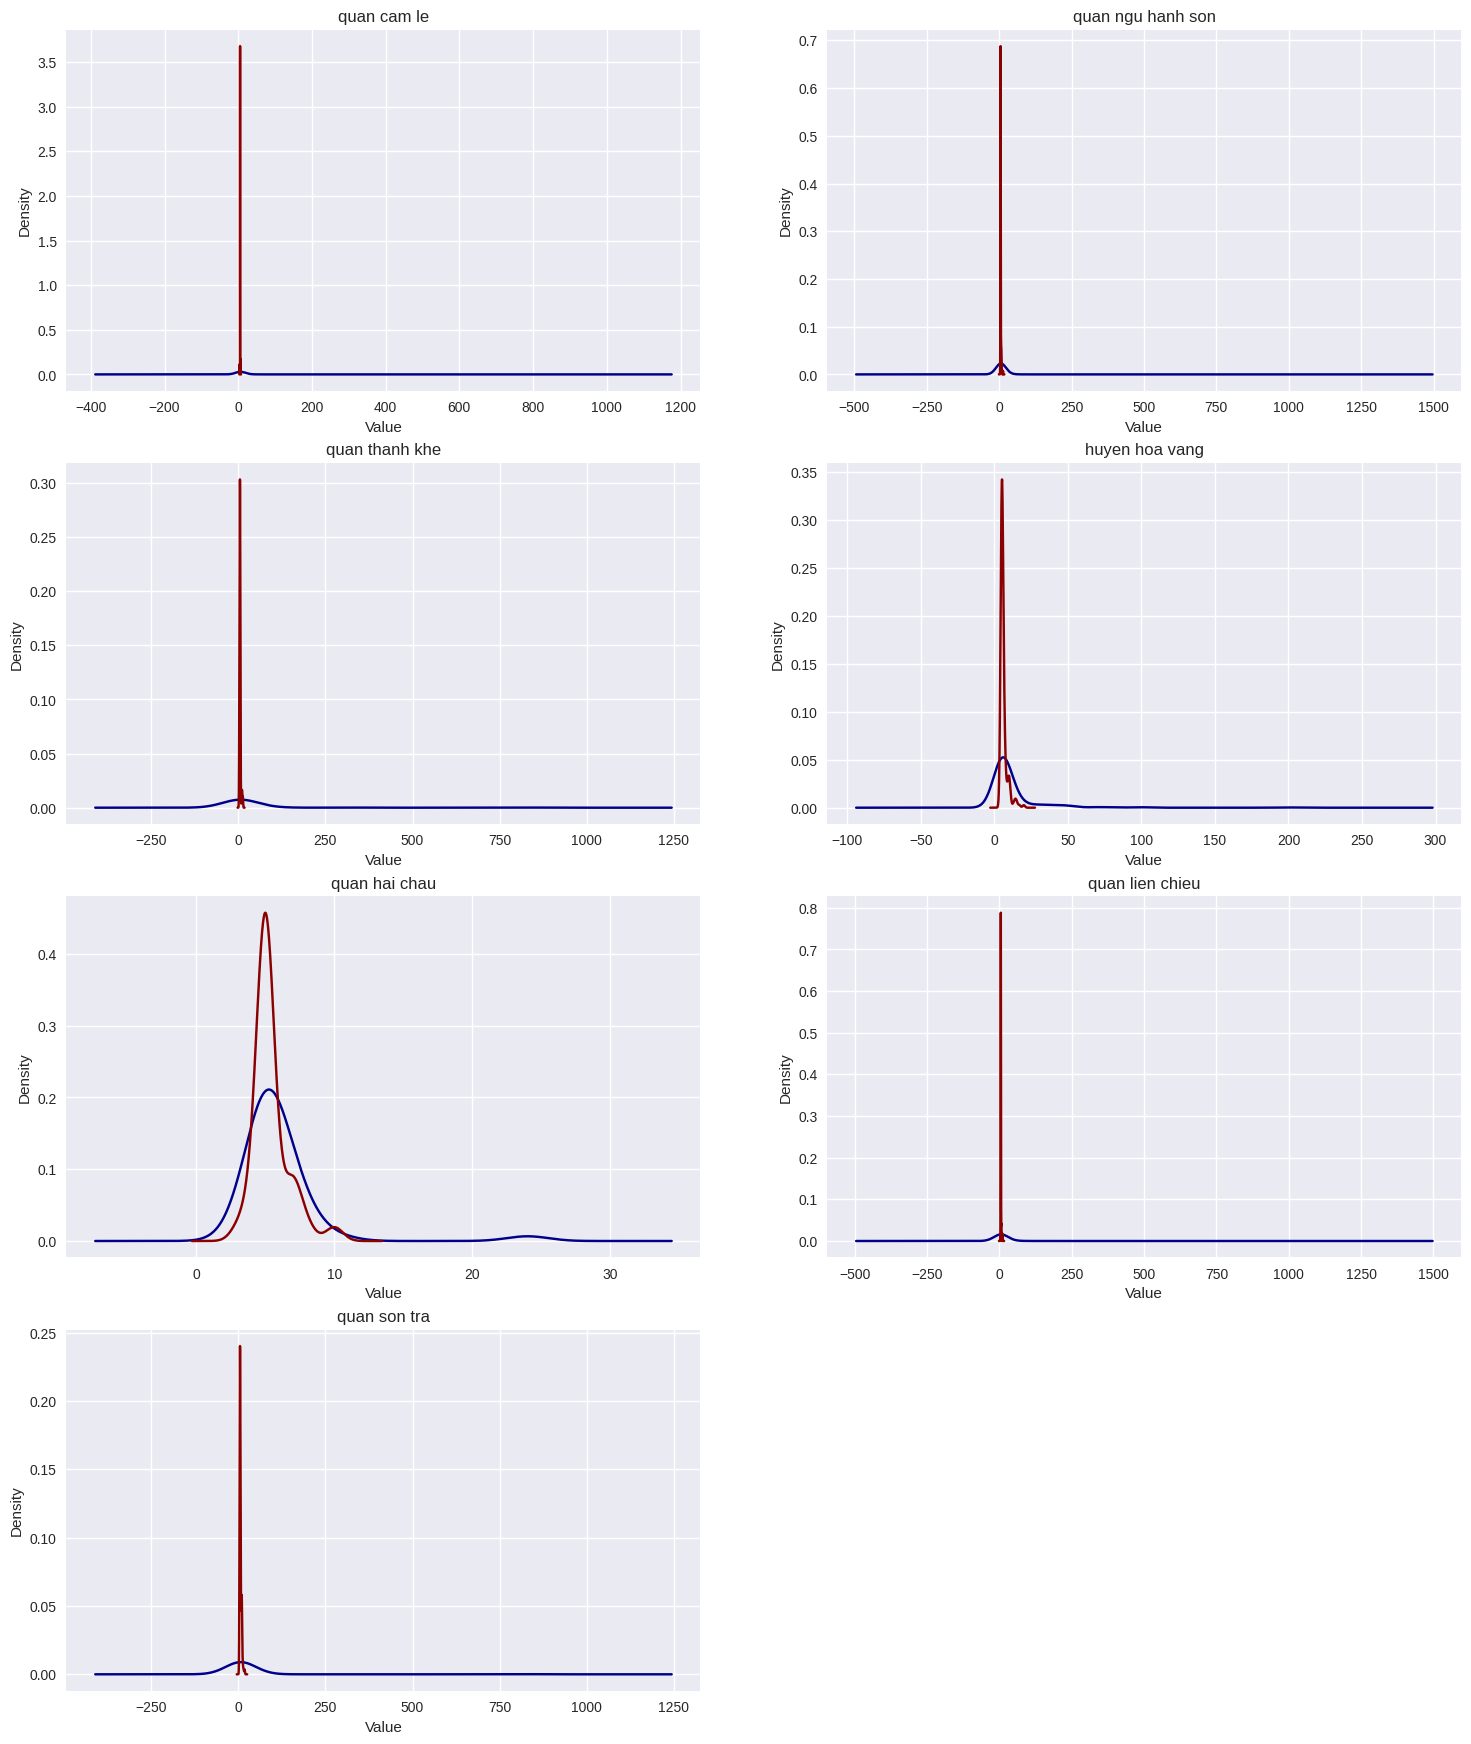

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  df_copy.loc[df_copy['Location'] ==gr_location[i]]['Width'].plot(kind='kde',color='darkblue')
  df_after_drop.loc[df_after_drop['Location'] ==gr_location[i]]['Width'].plot(kind='kde',color='darkred')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title(gr_location[i])
  sbplt+=1
plt.savefig(f"{images_dir}/width_cleaned.png",bbox_inches = 'tight',pad_inches = 0)  


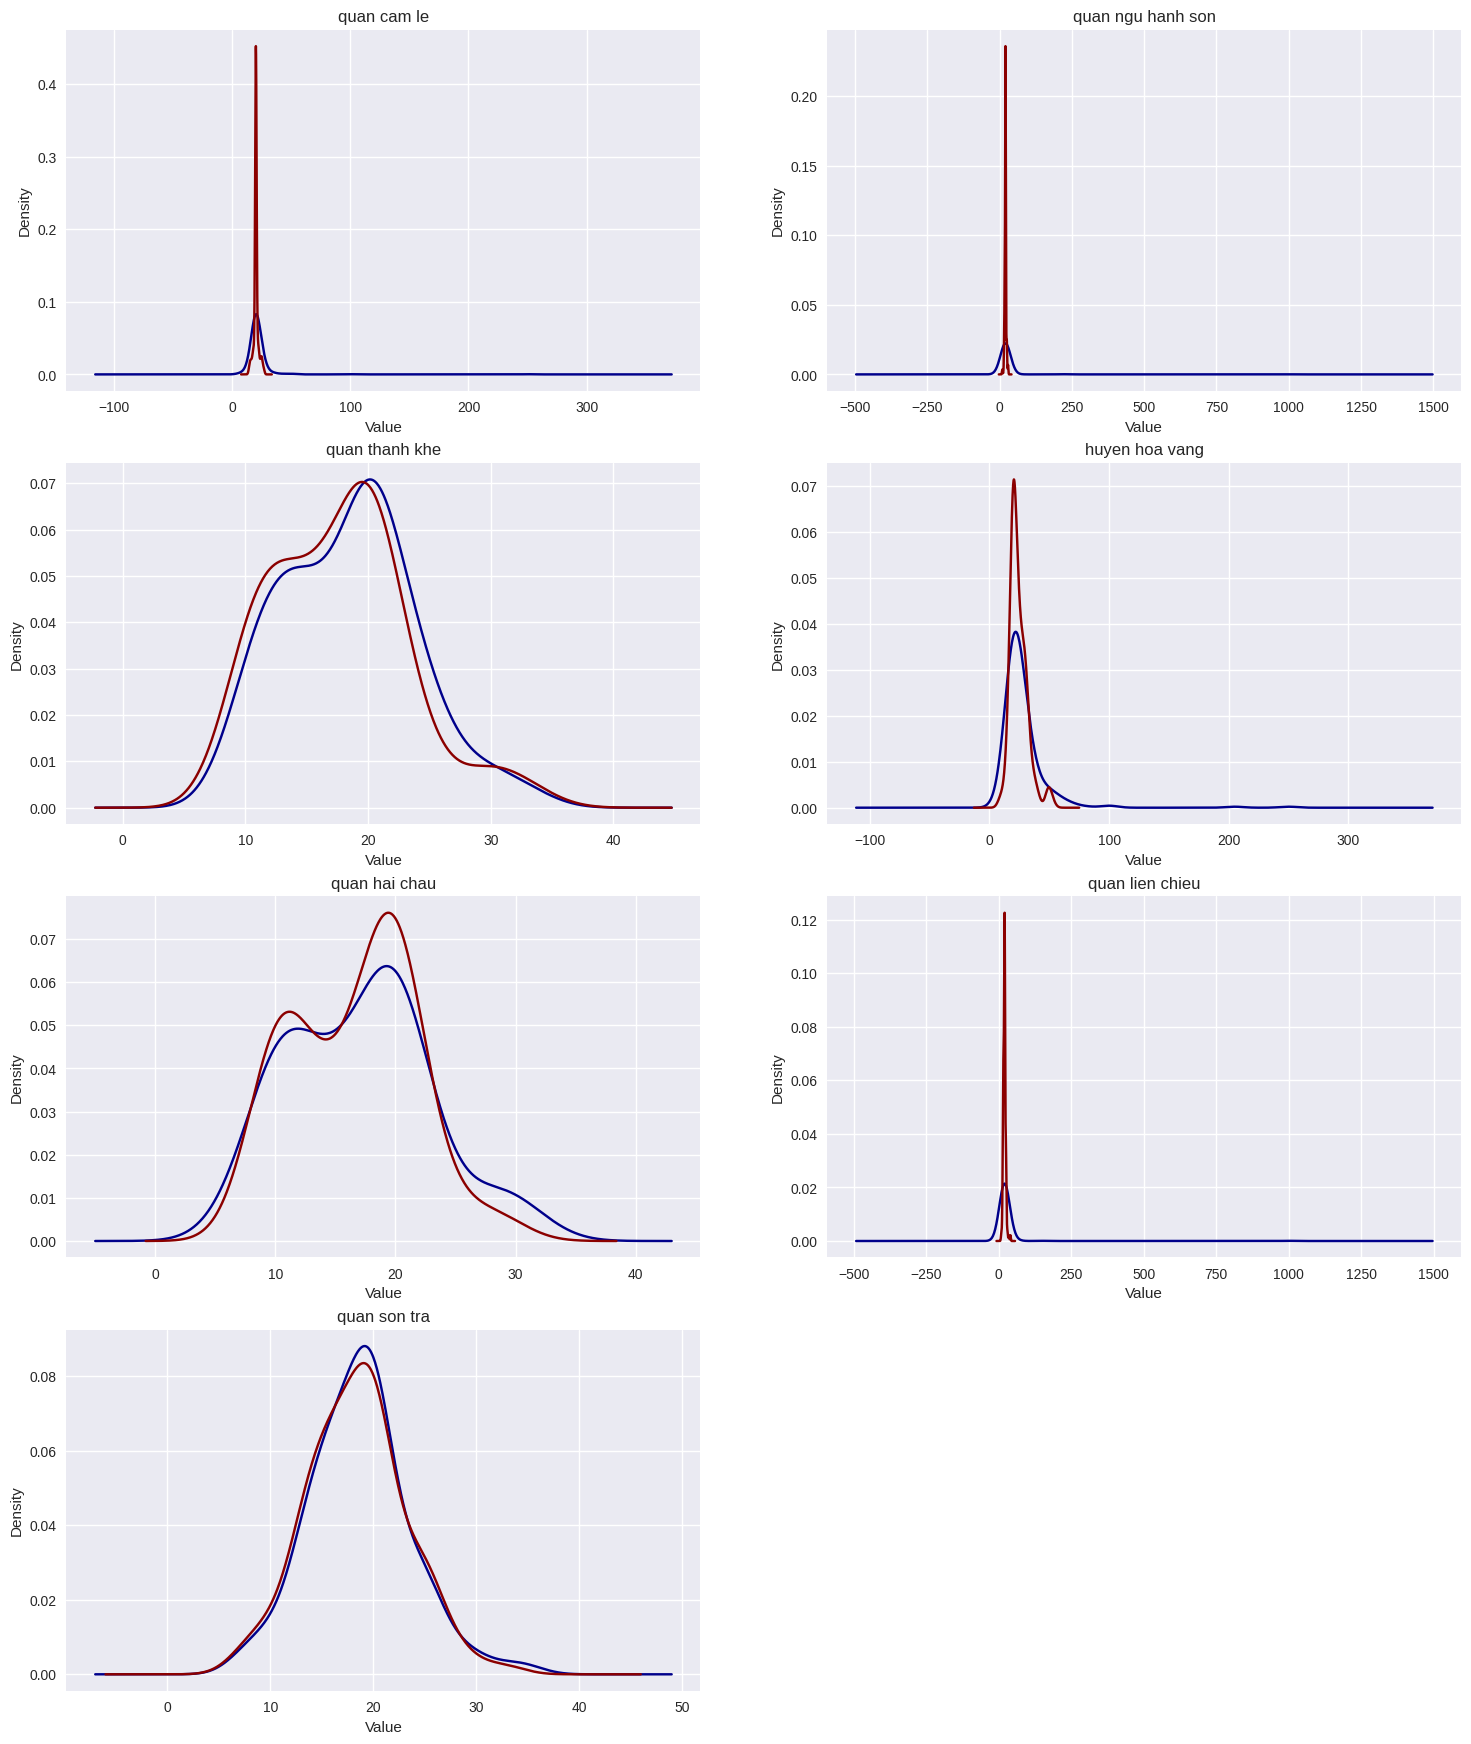

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  df_copy.loc[df_copy['Location'] ==gr_location[i]]['Length'].plot(kind='kde',color='darkblue')
  df_after_drop.loc[df_after_drop['Location'] ==gr_location[i]]['Length'].plot(kind='kde',color='darkred')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title(gr_location[i])
  sbplt+=1
plt.savefig(f"{images_dir}/length_cleaned.png",bbox_inches = 'tight',pad_inches = 0)  

### **Export csv**

In [ ]:
df_after_drop.reset_index(drop=True)
df_after_drop.to_csv("./data_clean.csv",index=False)

In [ ]:
df_nor=df_after_drop.drop(['Location'],axis=1)
pd.DataFrame(MinMaxScaler().fit_transform(df_nor),columns=df_nor.columns)


SalePrice      Area  Price/m2     Width    Length
0      0.200075  0.165289  0.273129  0.117647  0.282609
1      0.090162  0.165289  0.123104  0.117647  0.282609
2      0.158552  0.183747  0.203617  0.117647  0.282609
3      0.120693  0.110193  0.208535  0.058824  0.282609
4      0.105428  0.159780  0.147108  0.205882  0.176087
...         ...       ...       ...       ...       ...
1198   0.104817  0.165289  0.143107  0.117647  0.282609
1199   0.151225  0.096419  0.278713  0.117647  0.282609
1200   0.114587  0.289256  0.104684  0.294118  0.195652
1201   0.206182  0.192837  0.254959  0.117647  0.326087
1202   0.071843  0.179063  0.092932  0.117647  0.304348

[1203 rows x 5 columns]

# **3. Machine Learning**

In [ ]:
df = pd.read_csv('./data_clean.csv')
gr_location=df.Location.unique()
images_dir = '/content/drive/MyDrive/KHDL/Images/MachineLearning'
df.describe()

SalePrice         Area     Price/m2        Width       Length
count   1203.000000  1203.000000  1203.000000  1203.000000  1203.000000
mean    2833.224131   106.321779    28.651704     5.449094    20.240343
std     1843.711086    40.171257    16.650696     1.569333     4.752356
min      123.460000    40.000000     1.230000     3.000000     7.000000
25%     1725.000000    90.000000    18.430000     5.000000    18.000000
50%     2600.000000   100.000000    28.330000     5.000000    20.000000
75%     3450.000000   110.000000    35.285000     5.000000    21.000000
max    16500.000000   403.000000   121.210000    20.000000    53.000000

In [ ]:
for i in range(len(gr_location)):
  print(gr_location[i],'-',len(df.loc[df['Location']==gr_location[i]]))
  X_train, X_test, y_train, y_test = train_test_split(X[i], Y[i], test_size=0.2)
  print(len(y_train),'-',len(y_test))

quan cam le - 292
233 - 59
quan ngu hanh son - 268
214 - 54
quan thanh khe - 48
38 - 10
quan hai chau - 33
26 - 7
huyen hoa vang - 182
145 - 37
quan lien chieu - 268
214 - 54
quan son tra - 112
89 - 23


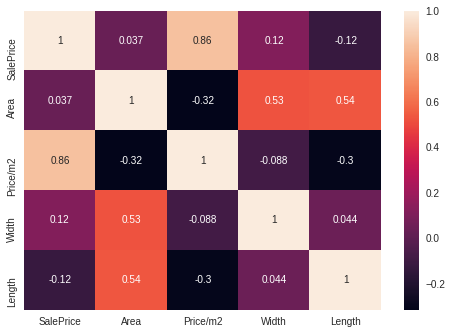

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#Split input, output
X=[]
Y=[]
for i in range(len(gr_location)):
  X.append(np.array(df.loc[df['Location']==gr_location[i]][['Area','Price/m2','Width','Length']]))
  Y.append(np.array(df.loc[df['Location']==gr_location[i]]['SalePrice']))

### **Linear Regression**

In [ ]:
class LinearRegression:
  def __init__(self):
    self.Theta=[]
    self.min_x=[]
    self.max_x=[]
    self.min_y=0
    self.max_y=0

  def normalize(data):
    try:
        columnCount = len(data[0])
        for column in range(columnCount):
            data[:, column] = (data[:, column] - np.min(data[:, column]))/(np.max(data[:, column]) - np.min(data[:, column]))
        return data
    except:
        data = (data - np.min(data))/(np.max(data) - np.min(data))
        return data
  def fit(self,X,y, alpha=0.1, epoch=2000):
    # print(X.shape[1])
    for i in range(X.shape[1]):
      self.min_x.append(np.min(X[:,i]))
      self.max_x.append(np.max(X[:,i]))
    self.min_y=np.min(y)
    self.max_y=np.max(y)
    try:
      X,y=MinMaxScaler().fit_transform(np.array(X)),MinMaxScaler(feature_range=(0, 1)).fit_transform(np.array(y).reshape(len(y),-1))    
      y=(y.reshape(-1,len(y)))[0]
    except:
      X,y=normalize(np.array(X)),normalize(np.array(y))
    m = X.shape[0]  # number of samples
    ones =np.ones((m,1))  
    X = np.concatenate((ones, X), axis=1)   # Nuw X with X0's =1
    n = X.shape[1]   # 
    # print(np.mean(X[:,1]))
    # Theta = np.ones(n)    # n= 5  parameter initialization
    # Theta=np.random.randn(5)
    try:
      Theta=[np.median(X) for x in range(n)]
    except:
      Theta = np.ones(n)    
    h = np.dot(X, Theta)   # Compute hypothesis
    # Gradient descent algorithm
    cost = np.ones(epoch)
    accuracy=[]
    for i in range (0, epoch):
      Theta[0] = Theta[0] - (alpha / X.shape[0]) * sum(h-y)
      for j in range(1, n):
        Theta[j]= Theta[j] - (alpha/ X.shape[0]) * sum((h-y) * X[:, j])
      h  = np.dot(X, Theta)
      cost[i] = 1/(2*m) * sum(np.square(h-y))  # Compute Cost
      score_r2=1-(np.sum(((y-h)**2))/np.sum((y-np.mean(y))**2))
      if score_r2 < 0:
        continue
      else:
        accuracy.append(1-(np.sum(((y-h)**2))/np.sum((y-np.mean(y))**2)))
      # accuracy[i]=r2_score(y,h)
    self.Theta=Theta
    return cost, Theta, accuracy

  def predict(self,X):
    y_predict_list=[]
    for x in X:
      a=[]
      for i in range(len(x)):
        if x[i]-self.min_x[i]==0:
          a.append(0)
        else:
          a.append((x[i]-self.min_x[i])/(self.max_x[i]-self.min_x[i]))
     
      X_predict = np.concatenate(([1], np.array(a)), axis = 0)
      y_predict=np.dot(self.Theta, X_predict)
      # print(a)
      y_predict_list.append(y_predict*(self.max_y-self.min_y)+self.min_y)
    return y_predict_list
  def score(self,y_pred,y):
    return 1-(np.sum(((y-y_pred)**2))/np.sum((y-np.mean(y))**2))

In [ ]:
Y_predict_linear=[]
cost_linear=[]
accuracy_linear=[]
Y_test_linear=[]
for i in range(len(gr_location)):
  X_train, X_test, y_train, y_test = train_test_split(X[i], Y[i], test_size=0.2)
  lm = LinearRegression() 
  c,theta,a=lm.fit(X_train,y_train)
  y_pred=lm.predict(X_test)
  cost_linear.append(c)
  accuracy_linear.append(a)
  Y_test_linear.append(y_test)
  Y_predict_linear.append(y_pred)
  print(gr_location[i])
  print(r2_score(y_test,y_pred))
  print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('---')

quan cam le
0.9706249809544788
Mean Absolute Percentage Error: 2.18915975279453
Root Mean Squared Error: 149.0969280718681
---
quan ngu hanh son
0.9561179685538448
Mean Absolute Percentage Error: 8.082722068893839
Root Mean Squared Error: 196.59006949281866
---
quan thanh khe
0.9484407052681304
Mean Absolute Percentage Error: 5.844146367161285
Root Mean Squared Error: 300.00566678564405
---
quan hai chau
0.9559758802206567
Mean Absolute Percentage Error: 10.207412198391943
Root Mean Squared Error: 313.26961080030225
---
huyen hoa vang
0.8717253556993548
Mean Absolute Percentage Error: 10.836023004868565
Root Mean Squared Error: 182.1487029396734
---
quan lien chieu
0.9734690502457224
Mean Absolute Percentage Error: 4.027115725798138
Root Mean Squared Error: 120.82164598213872
---
quan son tra
0.918904108047618
Mean Absolute Percentage Error: 11.60658247188389
Root Mean Squared Error: 949.5825080437189
---


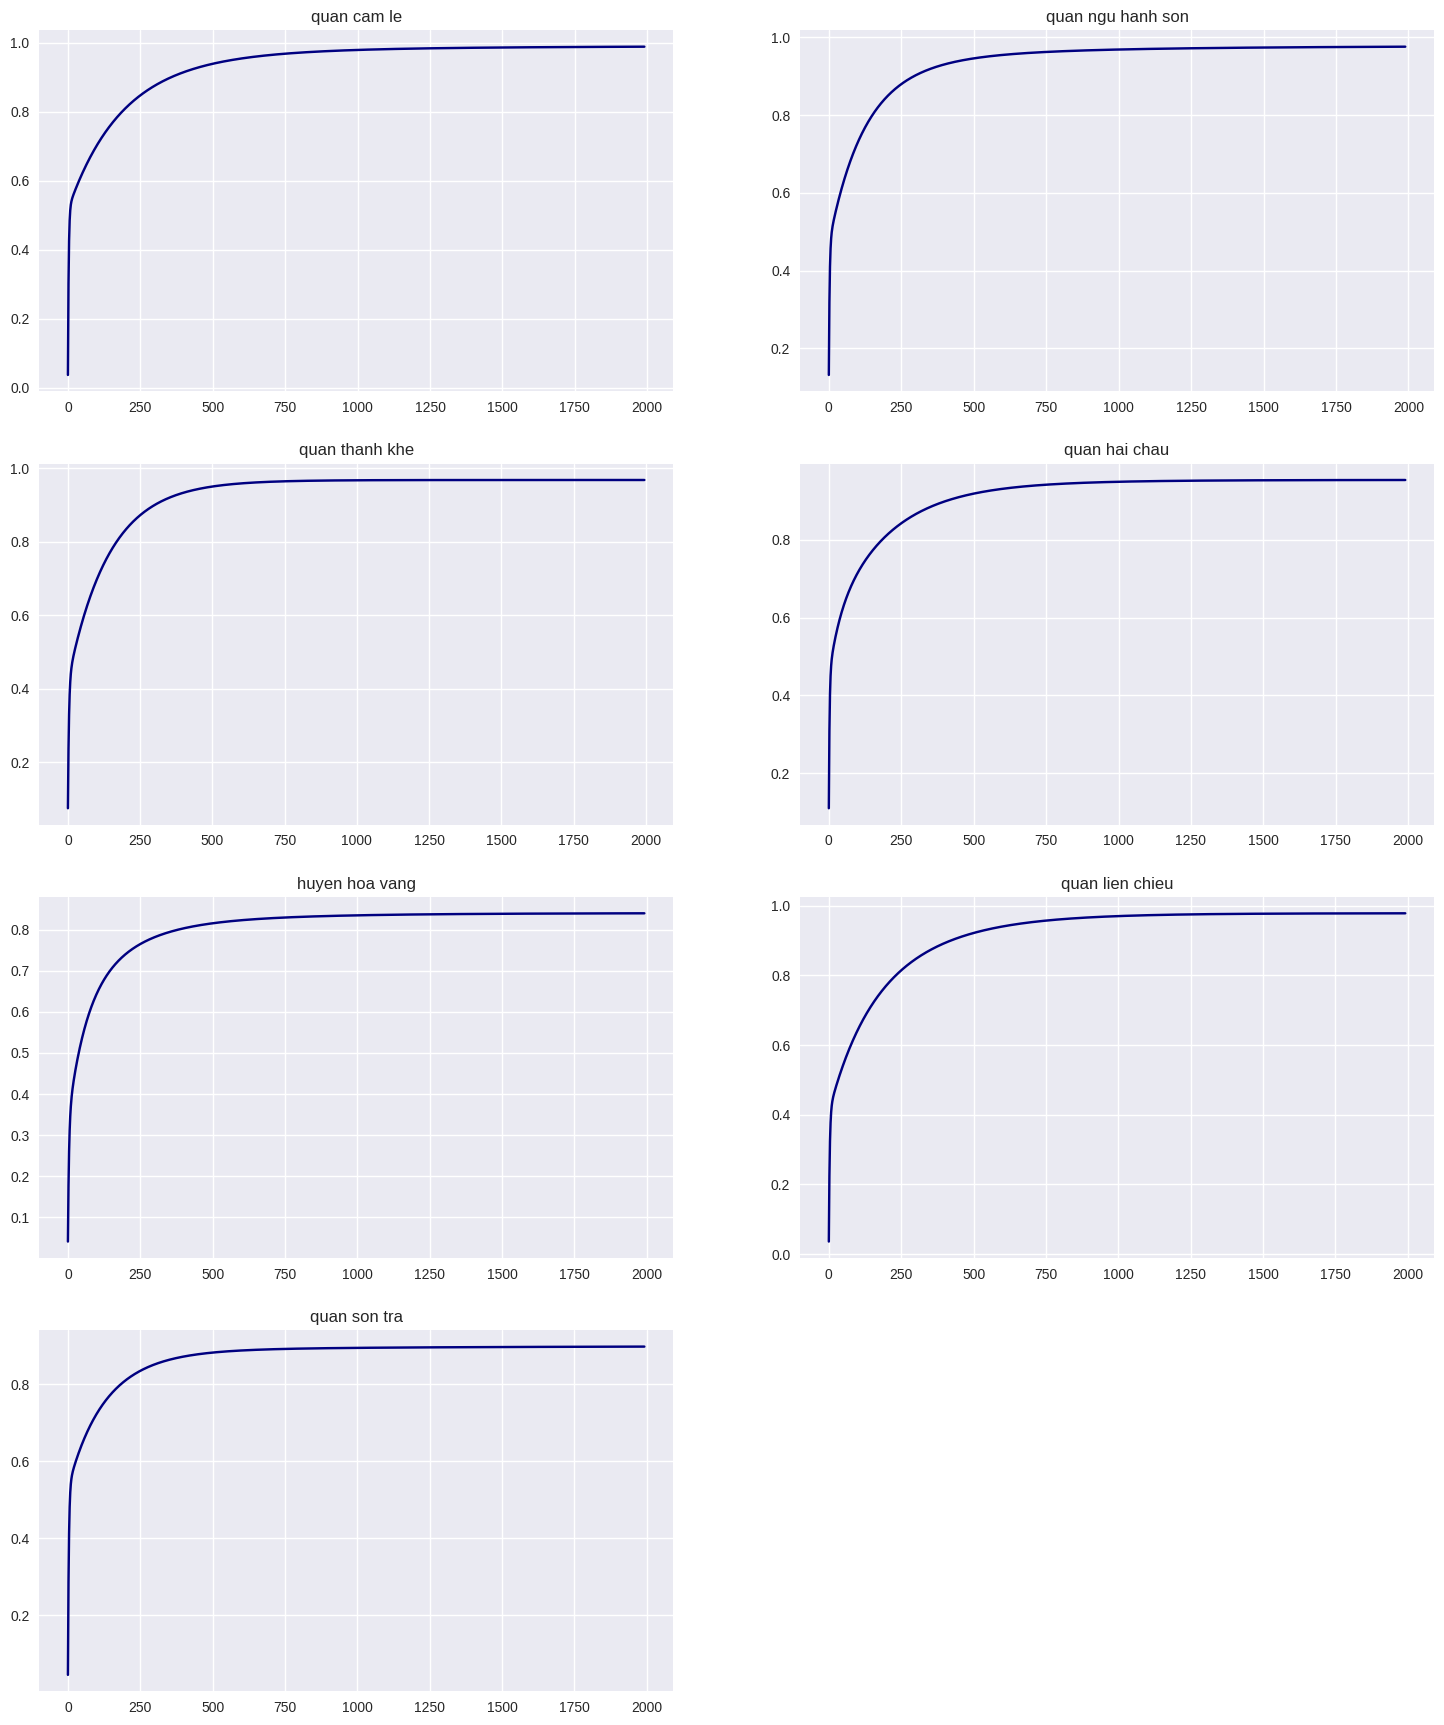

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  plt.plot(accuracy_linear[i],color='navy')
  plt.title(gr_location[i])
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/linear_accuracy.png",bbox_inches = 'tight',pad_inches = 0)  

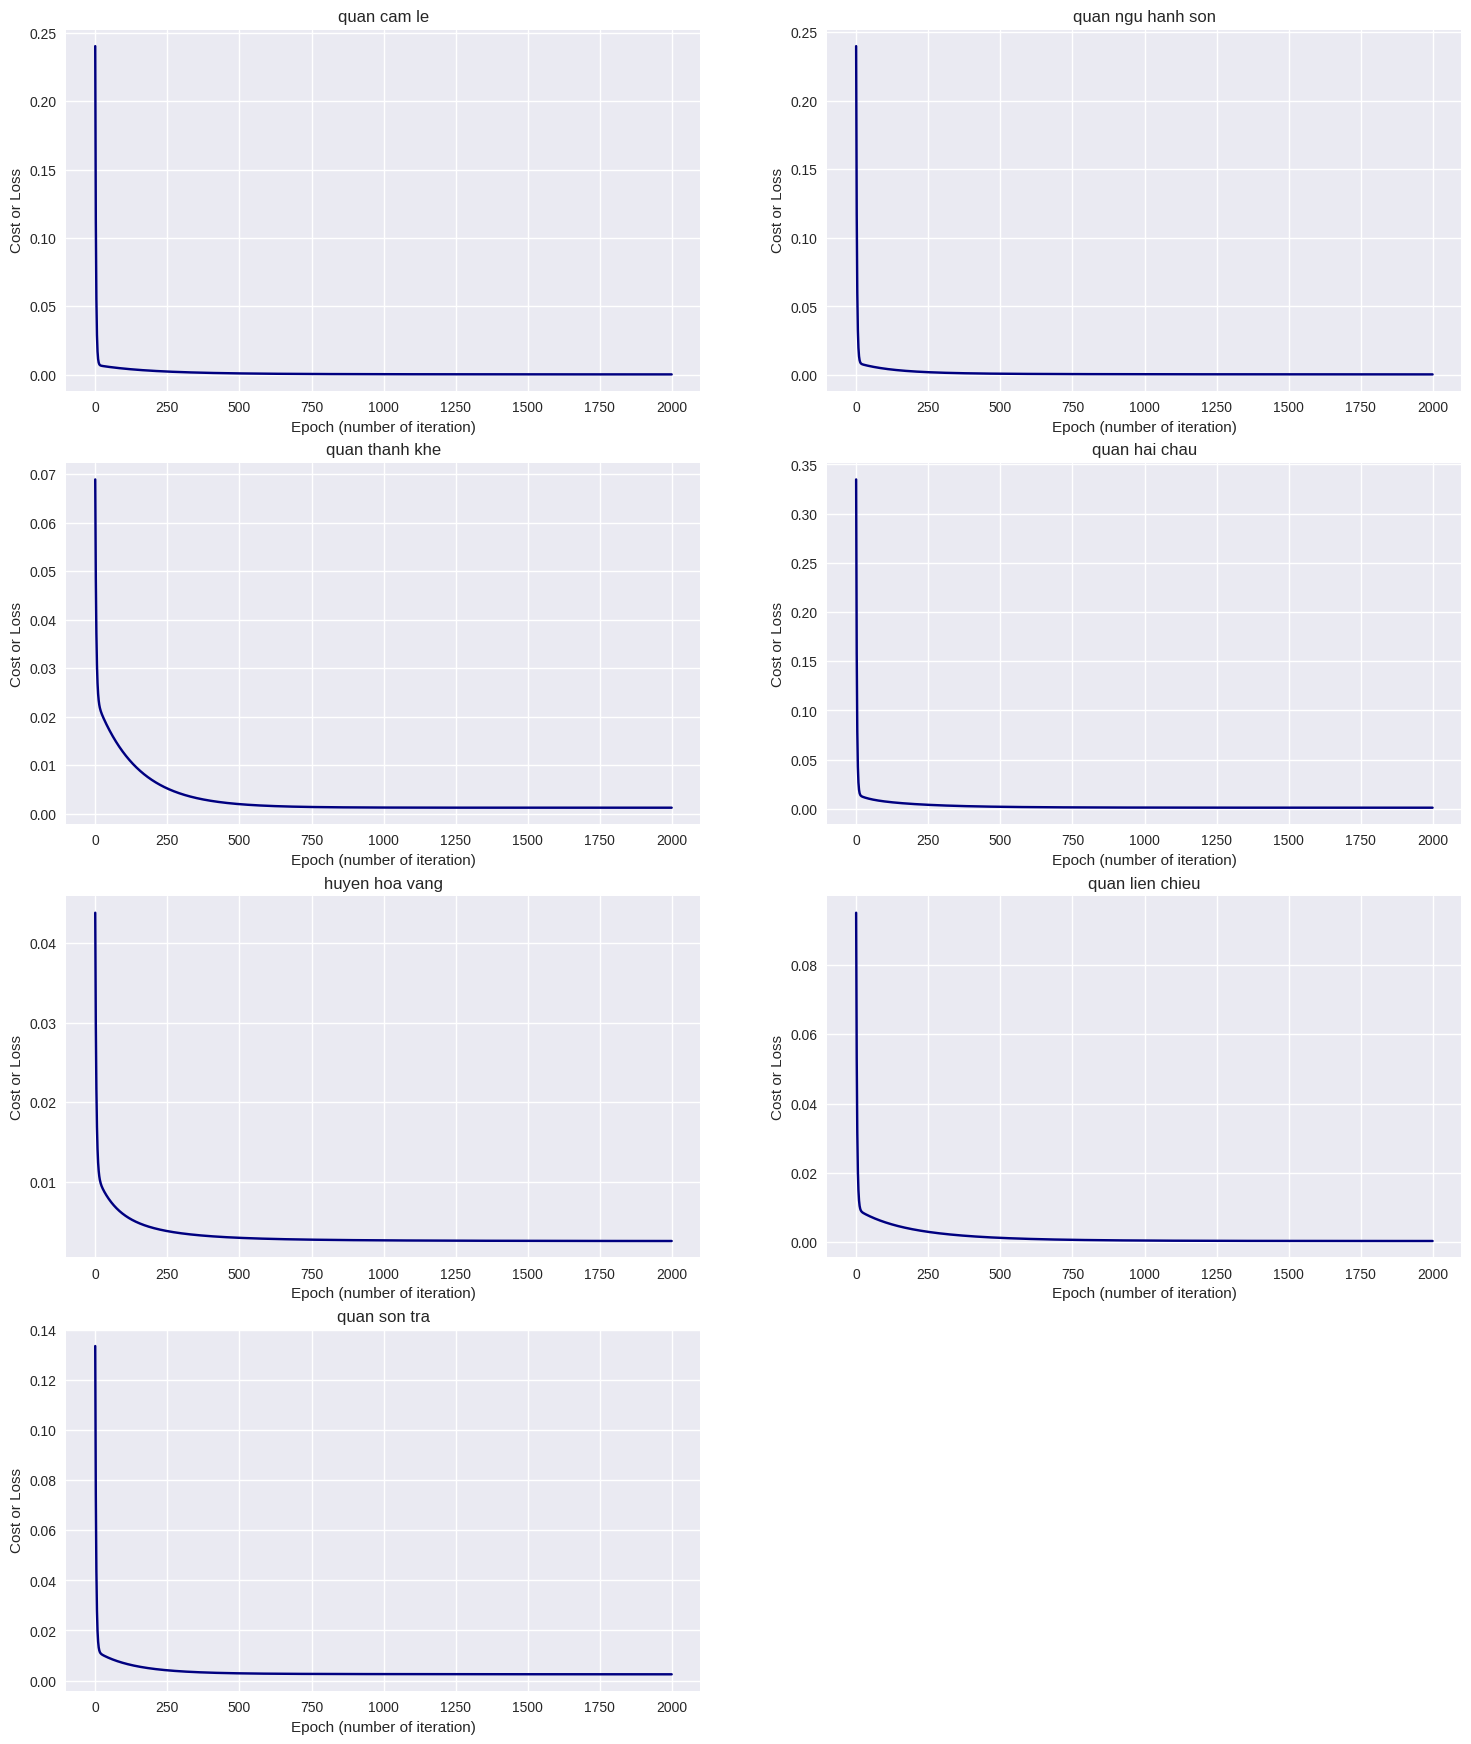

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421

for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  plt.plot(cost_linear[i],color='navy')
  plt.xlabel("Epoch (number of iteration)")
  plt.ylabel( "Cost or Loss")
  plt.style.use('seaborn')
  plt.title(gr_location[i])
  sbplt+=1
plt.savefig(f"{images_dir}/linear_loss.png",bbox_inches = 'tight',pad_inches = 0)  

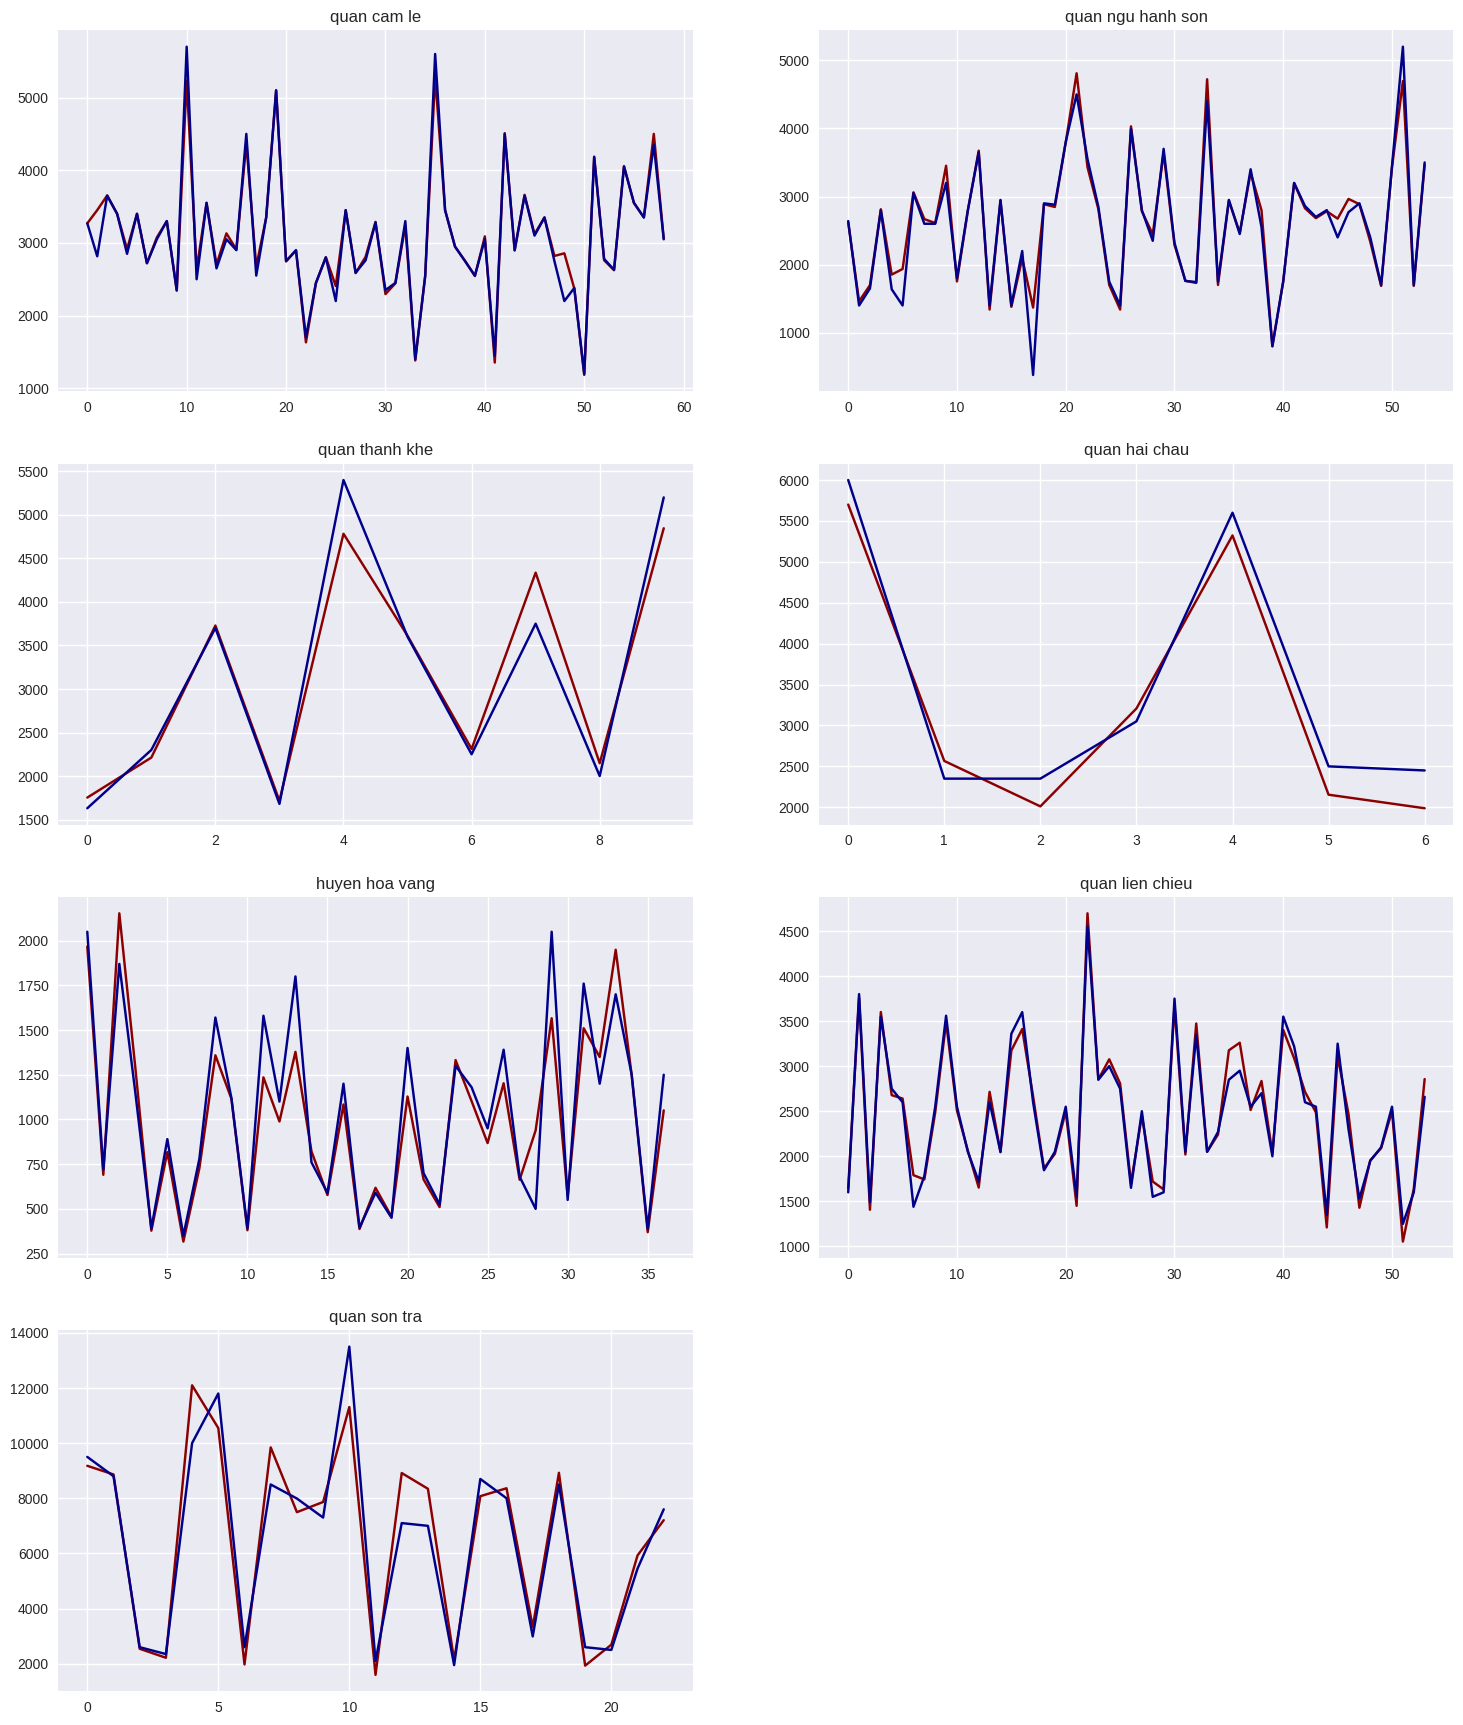

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
Y_Pred=[]
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  plt.plot(range(len(Y_predict_linear[i])),Y_predict_linear[i], color='darkred')
  plt.plot(range(len(Y_test_linear[i])),Y_test_linear[i], color='darkblue')
  plt.title(gr_location[i])
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/linear_pred.png",bbox_inches = 'tight',pad_inches = 0)  

### **Polynomial Regression**

In [ ]:
Y_predict_poly=[]
Y_test_poly=[]
cost_poly=[]
accuracy_poly=[]
# plt.figure(figsize=(18, 22),dpi=100)
# sbplt=421

for i in range(0,len(gr_location)):
  X_train, X_test, y_train, y_test = train_test_split(X[i], Y[i], test_size=0.2)
  polynomial_features= PolynomialFeatures(degree=2)
  x_poly = polynomial_features.fit_transform(X_train)
  model = LinearRegression()
  c,theta,a=model.fit(x_poly, y_train)
  cost_poly.append(c)
  accuracy_poly.append(a)
  y_poly_pred = model.predict(polynomial_features.fit_transform(X_test))
  Y_predict_poly.append(y_poly_pred)
  Y_test_poly.append(y_test)
  print(gr_location[i])
  print(r2_score(y_test,y_poly_pred))
  print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - y_poly_pred) / y_test)) * 100)
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))
  print('---')


quan cam le
0.9809711315379024
Mean Absolute Percentage Error: 1.3422507165926927
Root Mean Squared Error: 87.16188825267164
---
quan ngu hanh son
0.9789338007370683
Mean Absolute Percentage Error: 3.122670578813244
Root Mean Squared Error: 146.96249860665273
---
quan thanh khe
0.8271174814907536
Mean Absolute Percentage Error: 4.9334875380215495
Root Mean Squared Error: 385.28523214025716
---
quan hai chau
0.9961225395161624
Mean Absolute Percentage Error: 2.595373785164125
Root Mean Squared Error: 111.61064148717152
---
huyen hoa vang
0.9929193735686118
Mean Absolute Percentage Error: 2.5723238719092443
Root Mean Squared Error: 37.02754508345096
---
quan lien chieu
0.9780934168210662
Mean Absolute Percentage Error: 5.927908095828596
Root Mean Squared Error: 124.47728868303662
---
quan son tra
0.9930322270540549
Mean Absolute Percentage Error: 19.73451196349796
Root Mean Squared Error: 270.81258966539656
---


<Figure size 1800x2200 with 0 Axes>

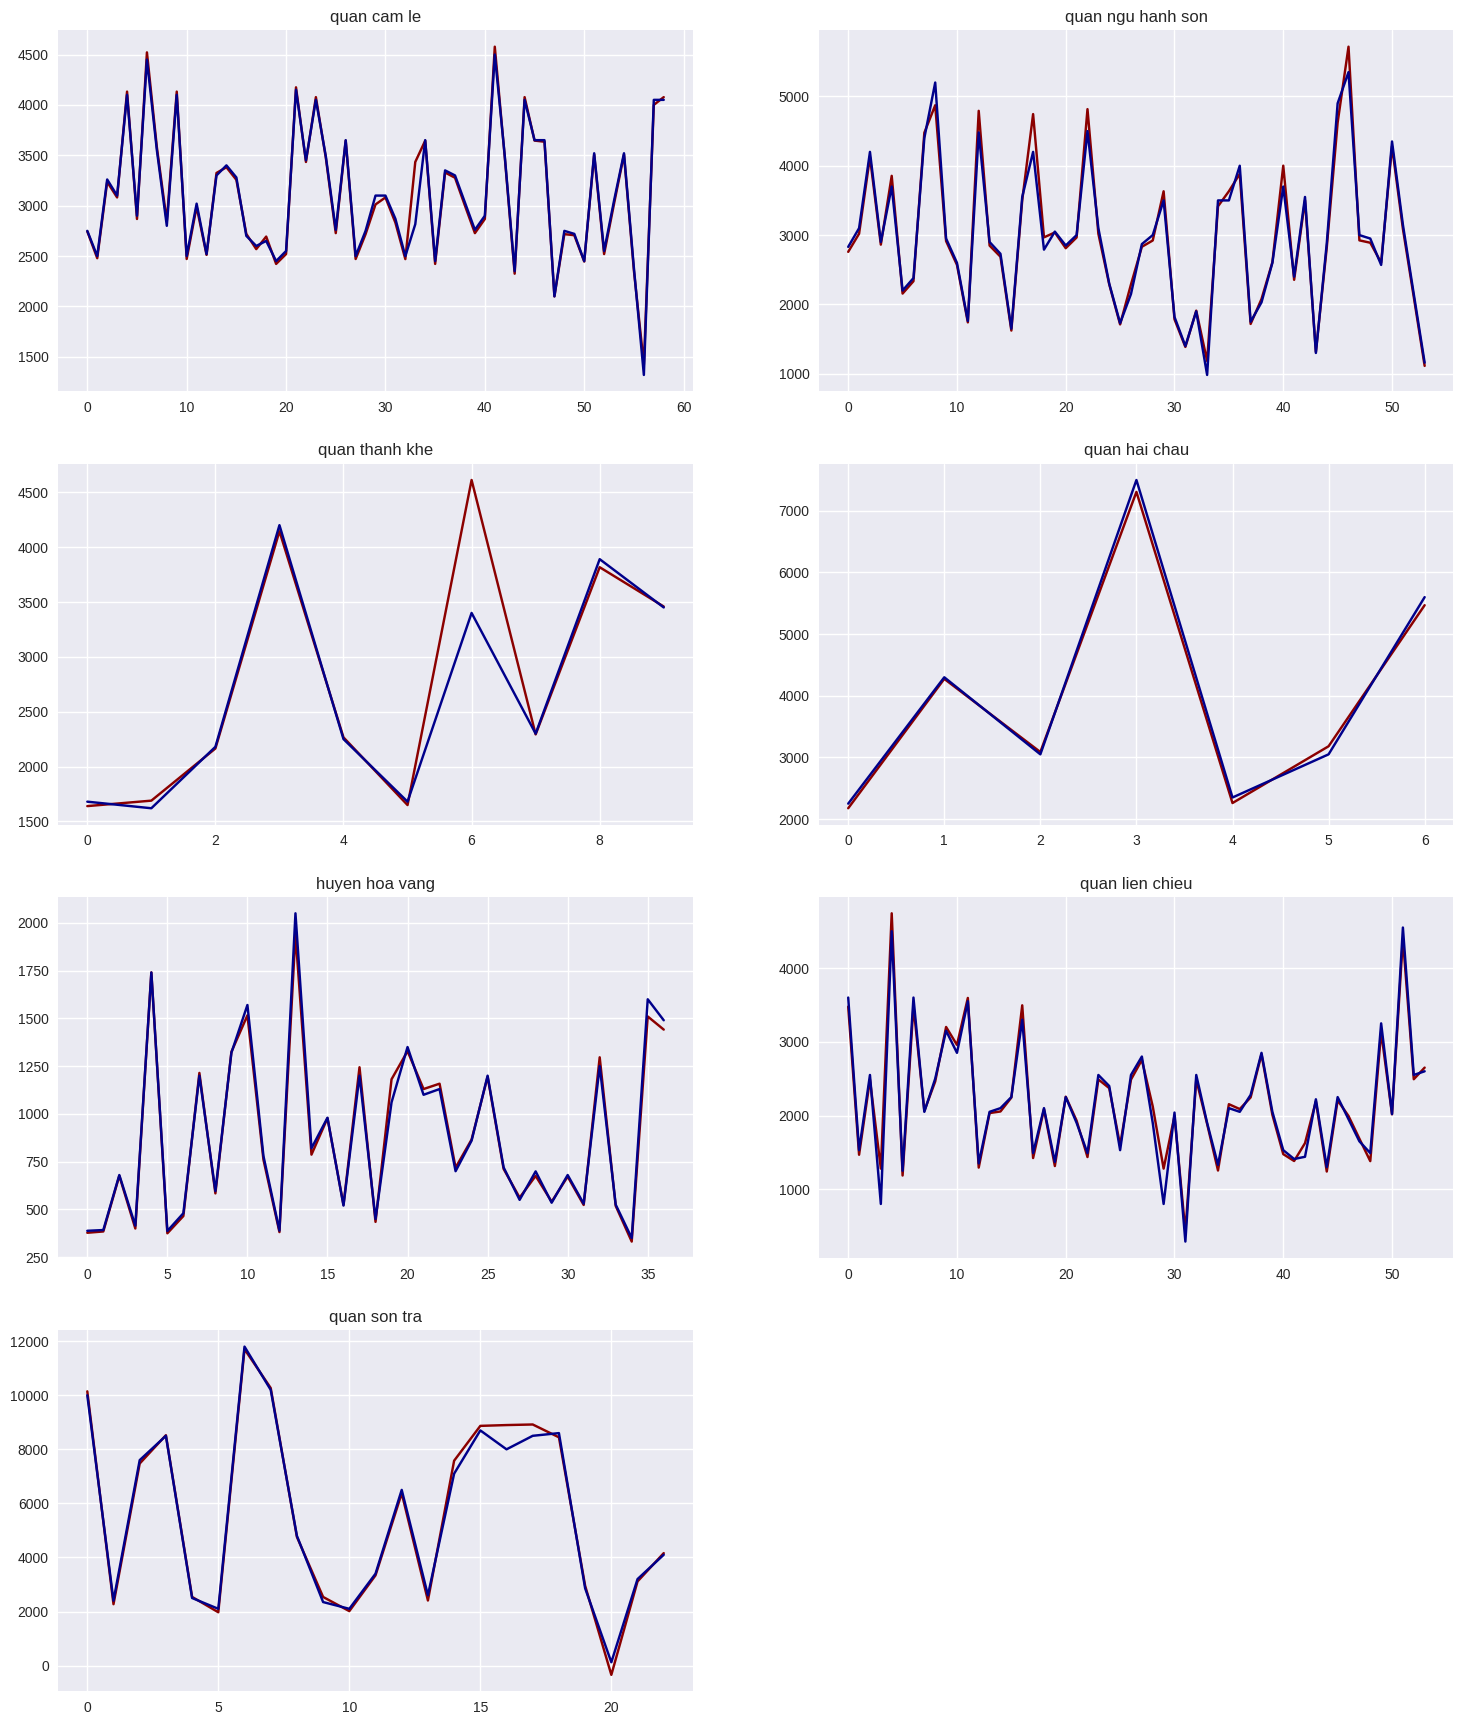

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  plt.plot(range(len(Y_predict_poly[i])),Y_predict_poly[i], color='darkred')
  plt.plot(range(len(Y_test_poly[i])),Y_test_poly[i], color='darkblue')
  plt.title(gr_location[i])
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/poly_pred.png",bbox_inches = 'tight',pad_inches = 0)  

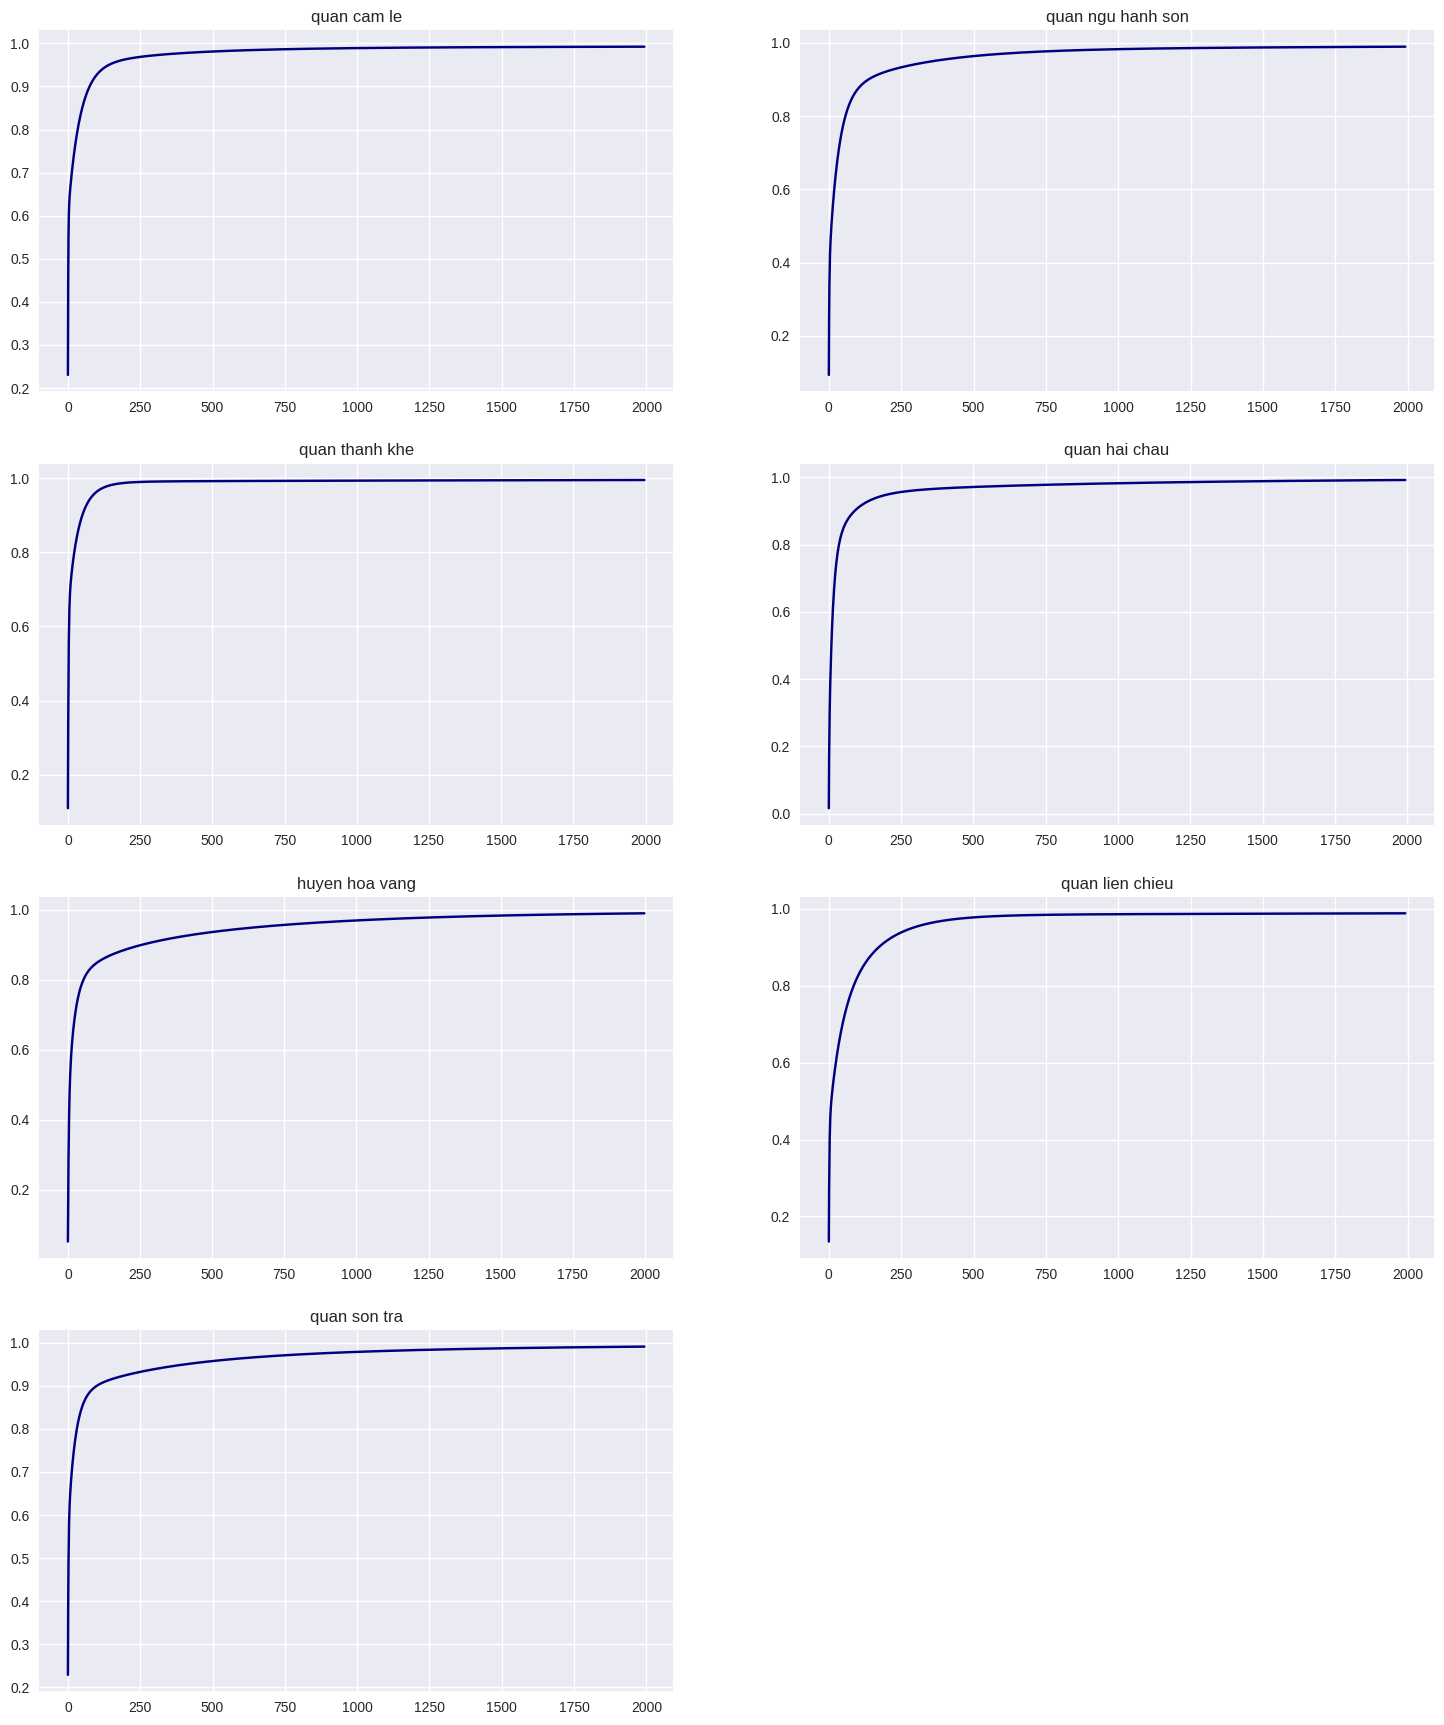

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  plt.plot(accuracy_poly[i],color='navy')
  plt.title(gr_location[i])
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/poly_accuracy.png",bbox_inches = 'tight',pad_inches = 0)  

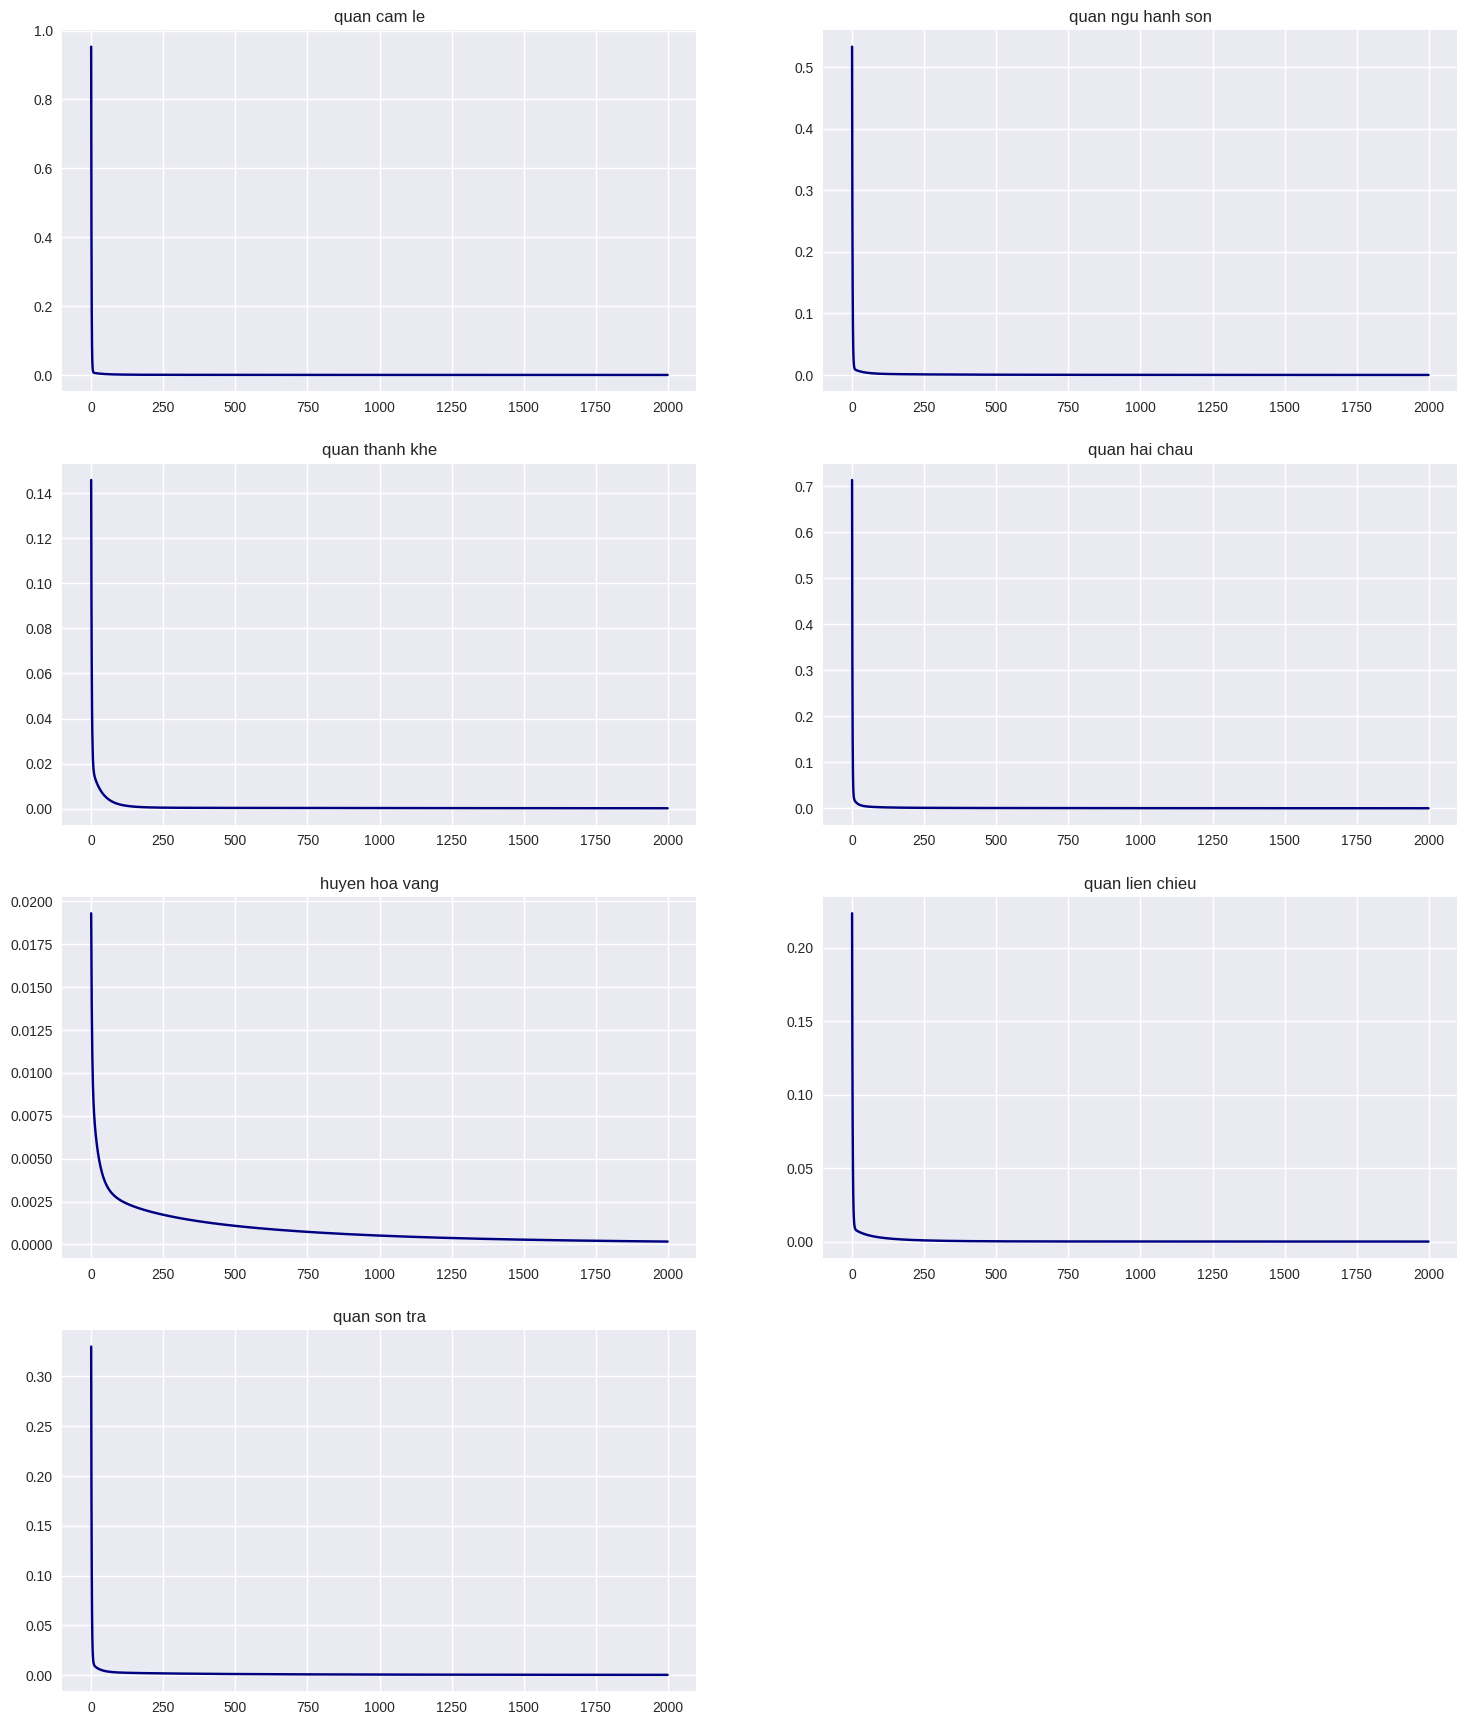

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  plt.plot(cost_poly[i],color='navy')
  plt.title(gr_location[i])
  sbplt+=1
plt.savefig(f"{images_dir}/poly_loss.png",bbox_inches = 'tight',pad_inches = 0)  

### **Random Forest**

In [ ]:
Y_predict_forest=[]
Y_test_forest=[]
# plt.figure(figsize=(18, 22),dpi=100)
# sbplt=421
for i in range(0,len(gr_location)):
  X_train, X_test, y_train, y_test = train_test_split(X[i], Y[i], test_size=0.2)
  regressor = RandomForestRegressor(n_estimators=100, random_state=101)
  regressor.fit(X_train, y_train)
  Y_predict = regressor.predict(X_test)
  Y_predict_forest.append(Y_predict)
  Y_test_forest.append(y_test)
  print(gr_location[i])
  print(r2_score(y_test,Y_predict))
  print('Mean Absolute Percentage Error:', np.mean(np.abs((y_test - Y_predict) / y_test)) * 100)
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_predict)))
  print('----')

quan cam le
0.9490437890184573
Mean Absolute Percentage Error: 2.843334863750451
Root Mean Squared Error: 187.90773108097494
----
quan ngu hanh son
0.9619205390466272
Mean Absolute Percentage Error: 3.284092886696816
Root Mean Squared Error: 219.59478771763366
----
quan thanh khe
0.9386074749013215
Mean Absolute Percentage Error: 7.917937323235488
Root Mean Squared Error: 239.24355581707943
----
quan hai chau
0.7738843081180812
Mean Absolute Percentage Error: 7.743256953798521
Root Mean Squared Error: 474.44755091730485
----
huyen hoa vang
0.8848662109583956
Mean Absolute Percentage Error: 6.609504441673248
Root Mean Squared Error: 165.35863640110375
----
quan lien chieu
0.9701737762167235
Mean Absolute Percentage Error: 4.960873919685889
Root Mean Squared Error: 132.7568533771603
----
quan son tra
0.9493040743824371
Mean Absolute Percentage Error: 92.95662455388607
Root Mean Squared Error: 708.8758485158489
----


<Figure size 1800x2200 with 0 Axes>

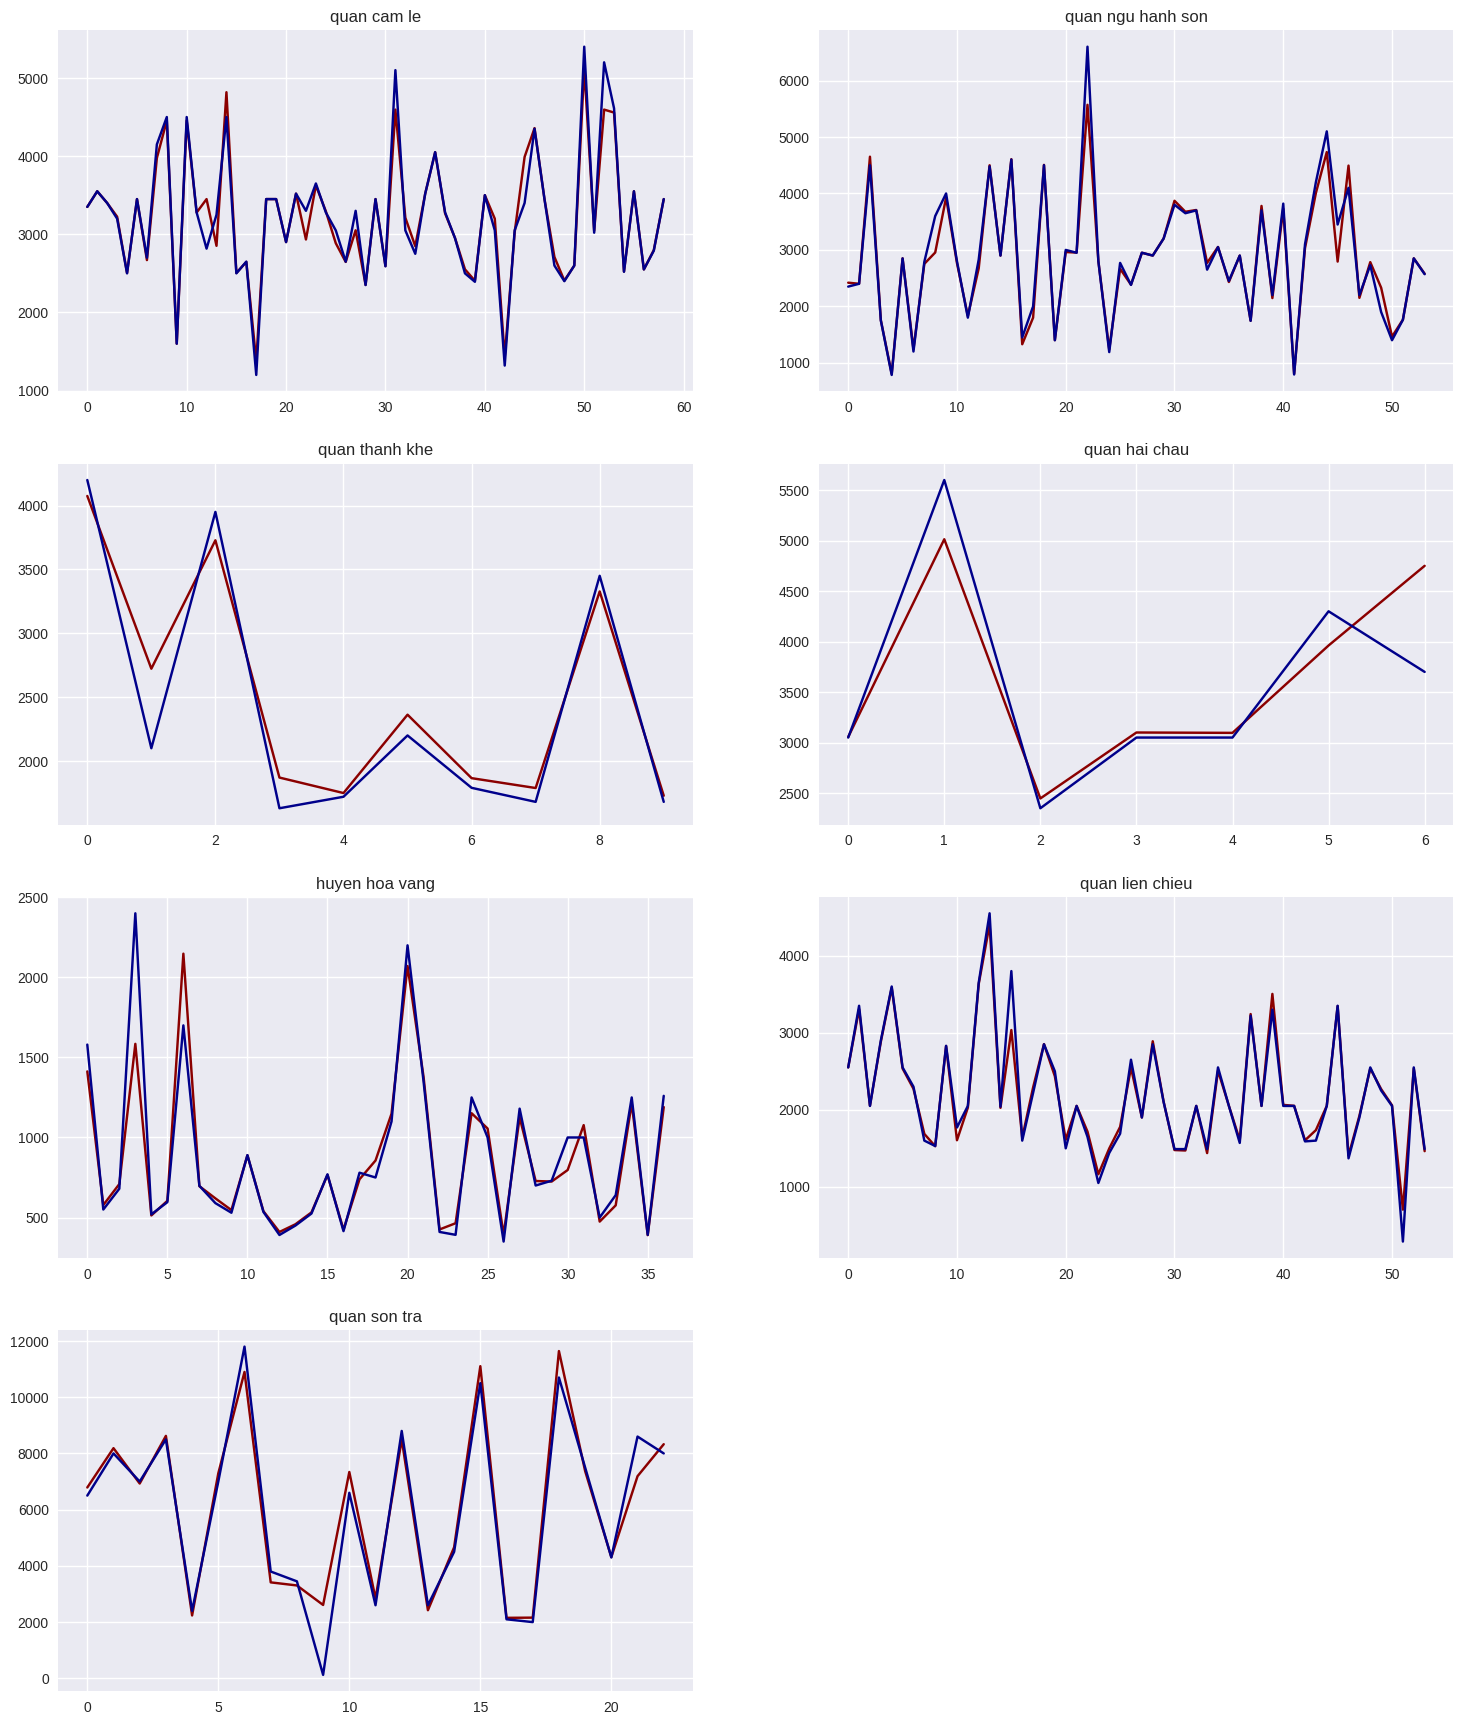

In [ ]:
plt.figure(figsize=(18, 22),dpi=100)
sbplt=421
for i in range(0,len(gr_location)):
  plt.subplot(sbplt)
  plt.plot(range(len(Y_predict_forest[i])),Y_predict_forest[i], color='darkred')
  plt.plot(range(len(Y_test_forest[i])),Y_test_forest[i], color='darkblue')
  plt.title(gr_location[i])
  plt.style.use('seaborn')
  sbplt+=1
plt.savefig(f"{images_dir}/forest_pred.png",bbox_inches = 'tight',pad_inches = 0)  